# New Zealand Traffic Crash Analysis (2000–Mar 2025)

**Crash Analysis System (CAS) — New Zealand**  
*Notebook generated: 2025-10-28 00:25:42*

This notebook explores vehicle crash data from New Zealand and demonstrates how to analyse key factors such as **holidays**, **weather**, **speed limits**, **regions**, and **vehicle types**.  
It aligns with these core questions:

1. **Do crashes increase during holidays or under certain weather/light conditions?**  
2. **What factors influence crash severity?**  
3. **Are certain regions (and TLAs) more prone to severe crashes?**  
4. **Are certain vehicle types more frequently involved in crashes over time?**

You can use this notebook to produce plots, significance tests (Chi-square), and export concise tables for a Power BI dashboard.

> Dataset fields come from NZTA's Crash Analysis System. The dataset was stated to include **72 columns** and span **January 2000 to March 2025**.  
> The specific columns referenced below include: `holiday, weatherA, weatherB, light, crashSeverity, speedLimit, region, crashYear, carStationWagon, vanOrUtility, truck, tlaId, areaUnitID`.


## Focused Data Dictionary (subset)

- **advisorySpeed**: Advisory speed at the crash site.  
- **areaUnitID**: Area unit identifier.  
- **carStationWagon**: Count of cars/station wagons involved.  
- **crashFinancialYear**: Financial year string, e.g., `2004/2005`.  
- **crashSeverity**: `Fatal Crash`, `Serious Crash`, `Minor Crash`, `Non-Injury Crash`.  
- **holiday**: Holiday period label (e.g., `Christmas New Year`, `Easter`, etc.).  
- **light**: `Bright Sun`, `Overcast`, `Twilight`, `Dark`, or `Unknown`.  
- **region**: Local Government region.  
- **speedLimit**: Posted speed limit (numeric).  
- **streetLight**: Street lighting condition at the time of crash.  
- **suv, vanOrUtility, taxi, truck**: Counts by vehicle class involved.  
- **tlaId, tlaName**: Territorial Local Authority identifiers/name.  
- **urban**: Urban/Open-road derived via speed limit.  
- **weatherA, weatherB**: Primary/secondary weather descriptors.  
- **unknownVehicleType**: Count of unknown vehicle types involved.


In [145]:
# --- Setup & Imports ---
import os
import warnings
from typing import Tuple

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

from IPython.display import display
from PIL import Image

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 120)

# Paths (Kaggle-style). Adjust if running locally.
IMG_PATH = "/kaggle/input/power-bi/Untitled.jpg"
CSV_PATH = "/Users/nelmierandikudagodage/Downloads/DataAnalytics/Crash_Analysis_System_(CAS)_data.csv"

# Display banner image if available
try:
    if os.path.exists(IMG_PATH):
        img = Image.open(IMG_PATH)
        display(img)
except Exception as e:
    print("[Note] Could not display image:", e)

In [146]:
# --- Load Data ---
assert os.path.exists(CSV_PATH), f"Dataset not found at {CSV_PATH}. Update CSV_PATH to your data location."
df = pd.read_csv(CSV_PATH, low_memory=False)
print("Shape:", df.shape)
display(df.head())

Shape: (869886, 72)


,X,Y,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,crashDirectionDescription,crashFinancialYear,crashLocation1,crashLocation2,crashRoadSideRoad,crashSeverity,crashSHDescription,crashYear,debris,directionRoleDescription,ditch,fatalCount,fence,flatHill,guardRail,holiday,houseOrBuilding,intersection,kerb,light,meshblockId,minorInjuryCount,moped,motorcycle,NumberOfLanes,objectThrownOrDropped,otherObject,otherVehicleType,overBank,parkedVehicle,pedestrian,phoneBoxEtc,postOrPole,region,roadCharacter,roadLane,roadSurface,roadworks,schoolBus,seriousInjuryCount,slipOrFlood,speedLimit,strayAnimal,streetLight,suv,taxi,temporarySpeedLimit,tlaId,tlaName,trafficControl,trafficIsland,trafficSign,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB
0,2037728.0,5709220.0,1,NaN,544500.0,1.0,NaN,0.0,1.0,NaN,South,2002/2003,CLIFFORD ST,SHEEHAN ST,NaN,Minor Crash,No,2002,NaN,South,NaN,0.0,NaN,Flat,NaN,NaN,NaN,NaN,NaN,Overcast,1380500.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Gisborne Region,Nil,2-way,Sealed,NaN,0.0,0.0,NaN,50.0,NaN,Null,0.0,0.0,NaN,28.0,Gisborne District,Nil,NaN,NaN,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Light rain,Null
1,1793829.0,5500169.0,2,NaN,564231.0,0.0,NaN,0.0,1.0,NaN,Null,2002/2003,BATH ST,PARKER AVENUE,NaN,Non-Injury Crash,No,2002,NaN,East,NaN,0.0,NaN,Flat,NaN,NaN,NaN,NaN,NaN,Bright sun,1869900.0,0.0,0.0,1.0,2.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Manawatū-Whanganui Region,Nil,2-way,Sealed,NaN,0.0,0.0,NaN,50.0,NaN,Null,0.0,0.0,NaN,42.0,Horowhenua District,Stop,NaN,NaN,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
2,1753976.0,5929363.0,3,NaN,508420.0,0.0,NaN,0.0,2.0,NaN,West,2001/2002,WAIRAU ROAD,ELLICE ROAD,NaN,Non-Injury Crash,No,2002,NaN,West,NaN,0.0,NaN,Hill Road,NaN,NaN,NaN,NaN,NaN,Bright sun,183100.0,0.0,0.0,0.0,4.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Auckland Region,Nil,2-way,Sealed,NaN,0.0,0.0,NaN,50.0,NaN,Off,0.0,0.0,NaN,76.0,Auckland,Give way,NaN,NaN,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
3,1771836.0,5914911.0,4,NaN,521602.0,0.0,0.0,0.0,2.0,0.0,North,2001/2002,WELLINGTON ST,HOWE ST,NaN,Non-Injury Crash,No,2002,0.0,North,0.0,0.0,0.0,Flat,0.0,NaN,0.0,NaN,0.0,Dark,649900.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,Auckland Region,Nil,2-way,Sealed,0.0,0.0,0.0,0.0,50.0,0.0,On,0.0,0.0,NaN,76.0,Auckland,Nil,0.0,0.0,0.0,0.0,0.0,0.0,Urban,0.0,0.0,0.0,Light rain,Null
4,1752438.0,5918349.0,5,NaN,515002.0,0.0,NaN,0.0,2.0,NaN,Null,2001/2002,HUIA ROAD,TUI ST,NaN,Non-Injury Crash,No,2002,NaN,North,NaN,0.0,NaN,Flat,NaN,NaN,NaN,NaN,NaN,Overcast,396300.0,0.0,0.0,0.0,2.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Auckland Region,Nil,2-way,Sealed,NaN,0.0,0.0,NaN,50.0,NaN,Off,0.0,0.0,NaN,76.0,Auckland,Stop,NaN,NaN,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null


In [147]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])
print("\nColumn names:")
for col in df.columns:
    print(" -", col)


Rows: 869886
Columns: 72

Column names:
 - X
 - Y
 - OBJECTID
 - advisorySpeed
 - areaUnitID
 - bicycle
 - bridge
 - bus
 - carStationWagon
 - cliffBank
 - crashDirectionDescription
 - crashFinancialYear
 - crashLocation1
 - crashLocation2
 - crashRoadSideRoad
 - crashSeverity
 - crashSHDescription
 - crashYear
 - debris
 - directionRoleDescription
 - ditch
 - fatalCount
 - fence
 - flatHill
 - guardRail
 - holiday
 - houseOrBuilding
 - intersection
 - kerb
 - light
 - meshblockId
 - minorInjuryCount
 - moped
 - motorcycle
 - NumberOfLanes
 - objectThrownOrDropped
 - otherObject
 - otherVehicleType
 - overBank
 - parkedVehicle
 - pedestrian
 - phoneBoxEtc
 - postOrPole
 - region
 - roadCharacter
 - roadLane
 - roadSurface
 - roadworks
 - schoolBus
 - seriousInjuryCount
 - slipOrFlood
 - speedLimit
 - strayAnimal
 - streetLight
 - suv
 - taxi
 - temporarySpeedLimit
 - tlaId
 - tlaName
 - trafficControl
 - trafficIsland
 - trafficSign
 - train
 - tree
 - truck
 - unknownVehicleType
 - ur

In [148]:
# --- BASIC SHAPE / SIZE ---
print(f"Dataset shape: {df.shape} (rows, columns)")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print()

# --- FULL SCHEMA / TYPES / MEMORY ---
df.info()
print()

# --- SUMMARY STATS FOR NUMERIC COLUMNS ---
# (count, mean, std, min, max, percentiles)
desc_numeric = df.describe().T
print(desc_numeric)
print()

# --- OPTIONAL: SUMMARY STATS FOR ALL COLUMNS INCLUDING OBJECT/CATEGORY ---
# This gives you top/freq etc. for categorical columns (like Region, Weather, etc.)
desc_all = df.describe(include='all').T
print(desc_all)


Dataset shape: (869886, 72) (rows, columns)
Number of rows: 869886
Number of columns: 72

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869886 entries, 0 to 869885
Data columns (total 72 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   X                          869886 non-null  float64
 1   Y                          869886 non-null  float64
 2   OBJECTID                   869886 non-null  int64  
 3   advisorySpeed              33897 non-null   float64
 4   areaUnitID                 869882 non-null  float64
 5   bicycle                    869881 non-null  float64
 6   bridge                     356494 non-null  float64
 7   bus                        869881 non-null  float64
 8   carStationWagon            869881 non-null  float64
 9   cliffBank                  356494 non-null  float64
 10  crashDirectionDescription  869886 non-null  object 
 11  crashFinancialYear         869886 non-null  object 
 

In [149]:
# --- Helpers & Cleaning ---

def _as_str(x):
    if pd.isna(x):
        return np.nan
    return str(x).strip()

def _norm_label(x):
    """Normalize common 'Null'/'Unknown' tokens and standardize casing."""
    x = _as_str(x)
    if x is None or (isinstance(x, float) and np.isnan(x)):
        return np.nan
    low = x.lower()
    if low in {"", "null", "none", "nan", "not recorded", "unknown"}:
        return np.nan
    # Keep original (title-case-ish) but avoid over-transforming multi-word categorical tokens
    return x

def chi_square_report(df: pd.DataFrame, row: str, col: str) -> Tuple[float, float, int, pd.DataFrame]:
    """Run chi-square test for independence on a contingency table (row x col)."""
    ct = pd.crosstab(df[row], df[col])
    chi2, p, dof, expected = chi2_contingency(ct)
    print(f"Contingency Table ({row} vs. {col}):\n")
    display(ct)
    print(f"\nChi-square: {chi2:.3f}, p-value: {p:.6f}, dof: {dof}")
    return chi2, p, dof, ct

# --- Normalize key categorical columns ---
for c in ["holiday", "weatherA", "weatherB", "light", "streetLight", "region", "crashSeverity"]:
    if c in df.columns:
        df[c] = df[c].map(_norm_label)

# Crash severity order
severity_order = ["Non-Injury Crash", "Minor Crash", "Serious Crash", "Fatal Crash"]

# Ensure crashSeverity is categorical with consistent order when available
if "crashSeverity" in df.columns:
    df["crashSeverity"] = pd.Categorical(df["crashSeverity"], categories=severity_order, ordered=True)

# Create a 'holiday_filled' to capture non-holiday rows too
if "holiday" in df.columns:
    df["holiday_filled"] = df["holiday"].fillna("Not Holiday")

# Speed limit coercion & binning
if "speedLimit" in df.columns:
    df["speedLimit_num"] = pd.to_numeric(df["speedLimit"], errors="coerce")
    bins = [-np.inf, 50, 60, 80, 100, 110, np.inf]
    labels = ["<=50", "60", "70–80", "100", "110", ">110"]
    df["speed_bin"] = pd.cut(df["speedLimit_num"], bins=bins, labels=labels)
else:
    print("[Warn] 'speedLimit' not found; speed-based analysis will be skipped.")

# Crash year: use existing, else try to infer from a datetime column if present
if "crashYear" not in df.columns:
    parsed_year = None
    for cand in ["crashDateTime", "crashDate", "date"]:
        if cand in df.columns:
            dt = pd.to_datetime(df[cand], errors="coerce")
            if dt.notna().any():
                df["crashYear"] = dt.dt.year
                parsed_year = cand
                break
    if parsed_year:
        print(f"[Info] 'crashYear' inferred from '{parsed_year}'.")
    else:
        print("[Warn] 'crashYear' missing and could not be inferred; time-series analysis will be limited.")

## Q1. Do crashes increase during holidays or under certain weather/light conditions?

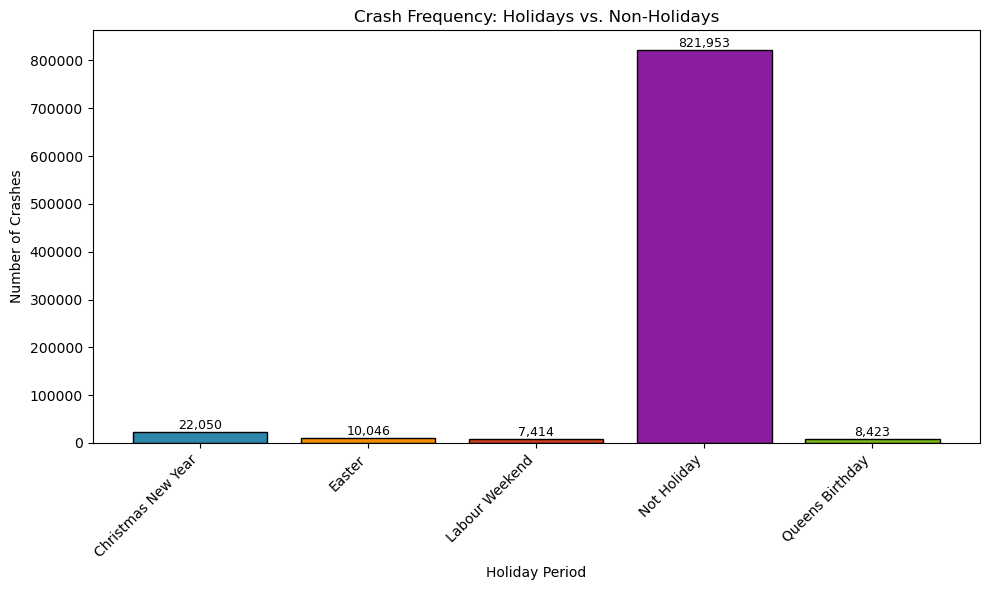

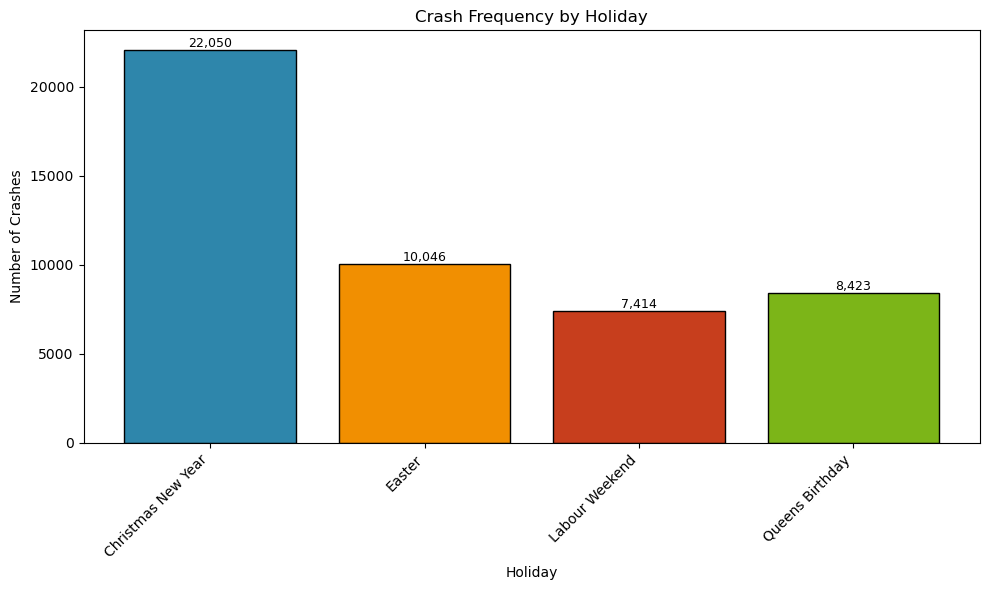

In [150]:
# --- Holiday vs. crashSeverity ---
if {"holiday_filled", "crashSeverity"}.issubset(df.columns):
    # Helper: nice bar labels
    def _add_bar_labels(bars):
        for b in bars:
            y = b.get_height()
            plt.text(b.get_x() + b.get_width()/2, y,
                     f"{int(y):,}", ha="center", va="bottom", fontsize=9)

    # Desired display order
    ordered_labels = ["Christmas New Year", "Easter", "Labour Weekend", "Not Holiday", "Queens Birthday"]

    # Count crashes per holiday bucket
    holiday_counts = (
        df["holiday_filled"]
        .value_counts(dropna=False)
        .reindex(ordered_labels)  # keep a consistent order
        .dropna()
    )

    # --- (1) Colorful Holiday vs Non-Holiday chart (unique color per column) ---
    # Pick distinct colors for each label (adjust if you prefer)
    palette = {
        "Christmas New Year": "#2E86AB",
        "Easter": "#F18F01",
        "Labour Weekend": "#C73E1D",
        "Not Holiday": "#891D9D",
        "Queens Birthday": "#7CB518",
    }
    bar_colors = [palette.get(lbl, "#999999") for lbl in holiday_counts.index]

    plt.figure(figsize=(10,6))
    bars = plt.bar(holiday_counts.index.astype(str), holiday_counts.values, color=bar_colors, edgecolor="black")
    plt.title("Crash Frequency: Holidays vs. Non-Holidays")
    plt.xlabel("Holiday Period")
    plt.ylabel("Number of Crashes")
    plt.xticks(rotation=45, ha='right')
    _add_bar_labels(bars)
    plt.tight_layout()
    plt.show()

    # --- (2) NEW: Crash frequency between different holidays (exclude 'Not Holiday') ---
    holidays_only = [lbl for lbl in ordered_labels if lbl != "Not Holiday"]
    holiday_only_counts = holiday_counts.reindex(holidays_only)

    plt.figure(figsize=(10,6))
    bars2 = plt.bar(
        holiday_only_counts.index.astype(str),
        holiday_only_counts.values,
        color=[palette.get(lbl, "#999999") for lbl in holiday_only_counts.index],
        edgecolor="black"
    )
    plt.title("Crash Frequency by Holiday")
    plt.xlabel("Holiday")
    plt.ylabel("Number of Crashes")
    plt.xticks(rotation=45, ha='right')
    _add_bar_labels(bars2)
    plt.tight_layout()
    plt.show()

else:
    print("[Skip] Holiday analysis not possible; required columns missing.")


In [151]:
# --- WeatherA vs. crashSeverity ---
if {"weatherA", "crashSeverity"}.issubset(df.columns):
    _ = chi_square_report(df, "weatherA", "crashSeverity")
else:
    print("[Skip] weatherA vs. crashSeverity: missing columns.")

Contingency Table (weatherA vs. crashSeverity):



crashSeverity,Non-Injury Crash,Minor Crash,Serious Crash,Fatal Crash
weatherA,,,,
Fine,464158,161813,41044,6410
Hail or Sleet,122,40,11,1
Heavy rain,24485,8143,1751,333
Light rain,94164,30265,6245,1077
Mist or Fog,8086,3079,803,179
Snow,1103,356,96,13



Chi-square: 646.779, p-value: 0.000000, dof: 15


[Chi-square] χ²=4881.94, dof=18, p=0
[Effect size] Cramér’s V=0.043


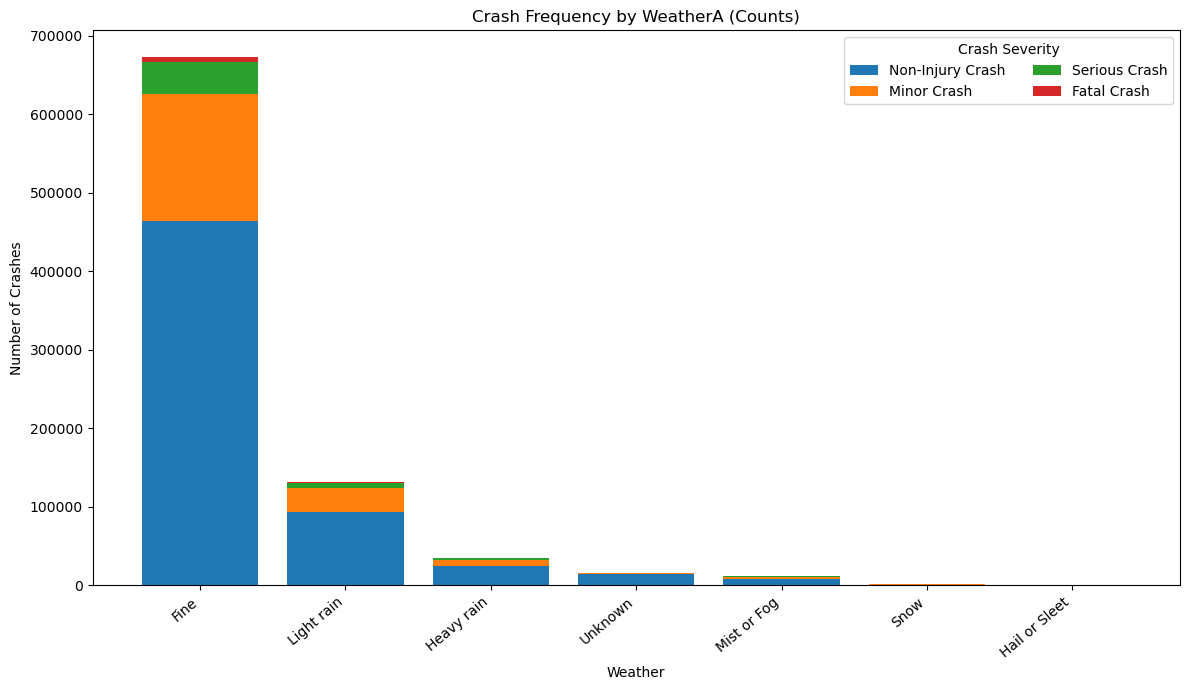

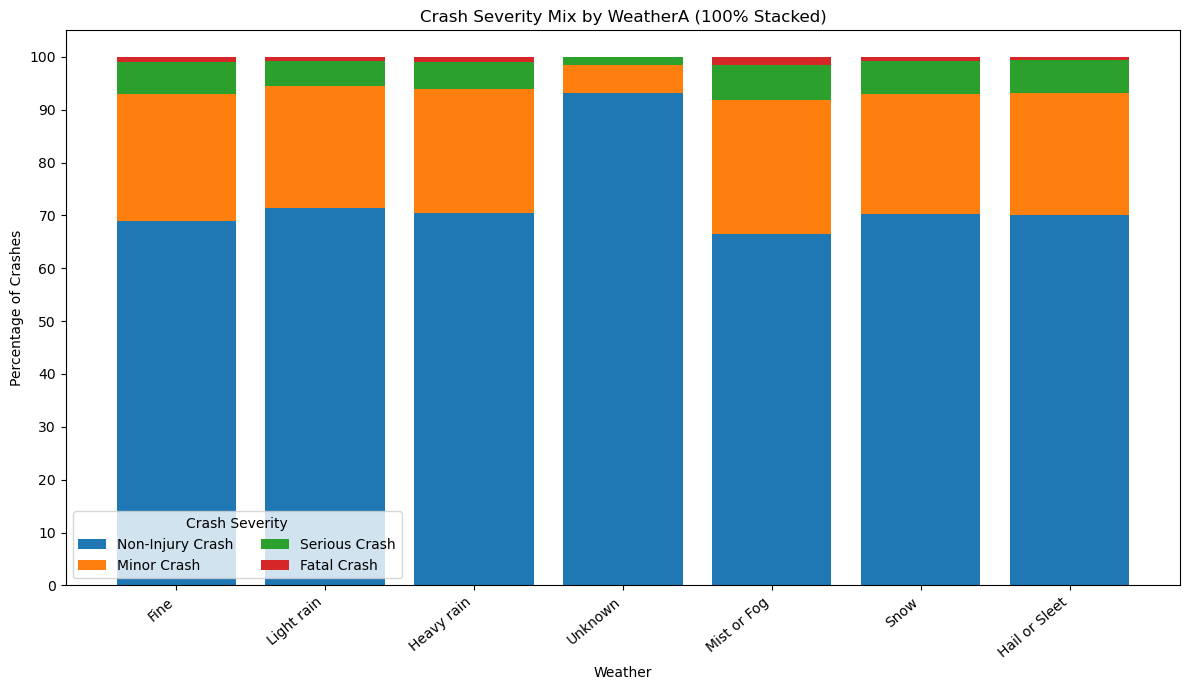

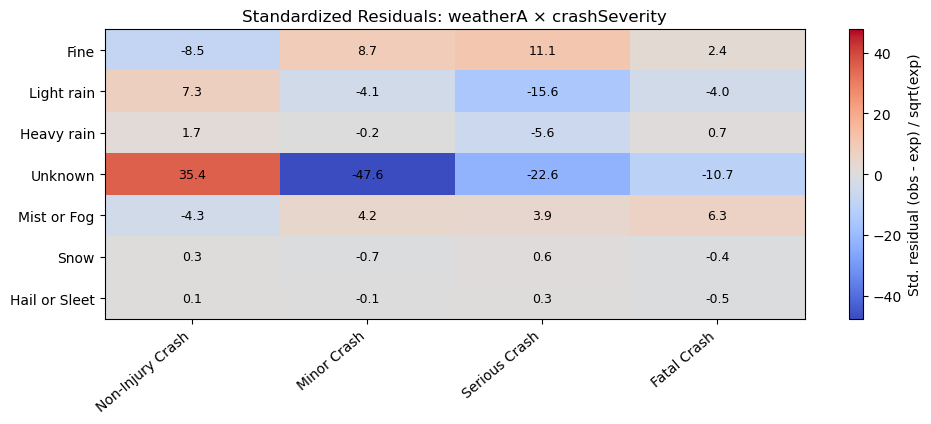

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Guard ---
if not {"weatherA", "crashSeverity"}.issubset(df.columns):
    raise ValueError("[Skip] weatherA vs. crashSeverity: missing columns.")

# Optional: clean up missing / 'Unknown' buckets if you want to hide them
weather_clean = (
    df["weatherA"]
    .replace({np.nan: "Unknown"})
    .astype(str)
)
severity_clean = df["crashSeverity"].astype(str)

# Contingency table
ct = pd.crosstab(weather_clean, severity_clean)

# Order severity columns in a sensible way if present
preferred_order = ["Non-Injury Crash", "Minor Crash", "Serious Crash", "Fatal Crash"]
severity_cols = [c for c in preferred_order if c in ct.columns] + [c for c in ct.columns if c not in preferred_order]
ct = ct[severity_cols]

# Order weather rows by total count (descending)
ct = ct.loc[ct.sum(axis=1).sort_values(ascending=False).index]

# ---------- Chi-square + Cramér’s V ----------
# Expected counts (no scipy needed)
obs = ct.values.astype(float)
row_sums = obs.sum(axis=1, keepdims=True)
col_sums = obs.sum(axis=0, keepdims=True)
total = obs.sum()
expected = row_sums @ col_sums / total

# Chi-square
with np.errstate(divide="ignore", invalid="ignore"):
    chi2 = np.nansum((obs - expected) ** 2 / expected)

dof = (ct.shape[0] - 1) * (ct.shape[1] - 1)
# p-value via survival function approximation (optional: requires scipy for exact)
try:
    from scipy.stats import chi2 as scipy_chi2
    p_val = scipy_chi2.sf(chi2, dof)
except Exception:
    p_val = float("nan")

# Cramér’s V
k = min(ct.shape)  # min(#rows, #cols)
cramers_v = np.sqrt(chi2 / (total * (k - 1))) if k > 1 else np.nan

print(f"[Chi-square] χ²={chi2:.2f}, dof={dof}, p={p_val:.4g}")
print(f"[Effect size] Cramér’s V={cramers_v:.3f}")

# ---------- Plot 1: Stacked bar (counts) ----------
plt.figure(figsize=(12, 7))
bottom = np.zeros(len(ct), dtype=float)
x = np.arange(len(ct.index))

for col in ct.columns:
    plt.bar(x, ct[col].values, bottom=bottom, label=col)
    bottom += ct[col].values

plt.title("Crash Frequency by WeatherA (Counts)")
plt.xlabel("Weather")
plt.ylabel("Number of Crashes")
plt.xticks(x, ct.index, rotation=40, ha="right")
plt.legend(title="Crash Severity", ncol=2)
plt.tight_layout()
plt.show()

# ---------- Plot 2: 100% stacked bar (proportions) ----------
ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100.0
plt.figure(figsize=(12, 7))
bottom = np.zeros(len(ct_pct), dtype=float)
x = np.arange(len(ct_pct.index))

for col in ct_pct.columns:
    plt.bar(x, ct_pct[col].values, bottom=bottom, label=col)
    bottom += ct_pct[col].values

plt.title("Crash Severity Mix by WeatherA (100% Stacked)")
plt.xlabel("Weather")
plt.ylabel("Percentage of Crashes")
plt.yticks(np.arange(0, 101, 10))
plt.xticks(x, ct_pct.index, rotation=40, ha="right")
plt.legend(title="Crash Severity", ncol=2)
plt.tight_layout()
plt.show()

# ---------- Plot 3: Heatmap of standardized residuals ----------
std_resid = (obs - expected) / np.sqrt(expected)
# Clip extremes for cleaner color scaling
clip = np.nanmax(np.abs(std_resid))
plt.figure(figsize=(10, 0.5 + 0.35 * ct.shape[0] + 0.35 * ct.shape[1]))
im = plt.imshow(std_resid, aspect="auto", cmap="coolwarm", vmin=-clip, vmax=clip)
plt.title("Standardized Residuals: weatherA × crashSeverity")
plt.xticks(np.arange(ct.shape[1]), ct.columns, rotation=40, ha="right")
plt.yticks(np.arange(ct.shape[0]), ct.index)

# Annotate residuals
for i in range(std_resid.shape[0]):
    for j in range(std_resid.shape[1]):
        val = std_resid[i, j]
        if np.isfinite(val):
            plt.text(j, i, f"{val:.1f}", ha="center", va="center", fontsize=9, color="black")

cbar = plt.colorbar(im)
cbar.set_label("Std. residual (obs - exp) / sqrt(exp)")
plt.tight_layout()
plt.show()


In [153]:
# --- WeatherB vs. crashSeverity ---
if {"weatherB", "crashSeverity"}.issubset(df.columns):
    _ = chi_square_report(df, "weatherB", "crashSeverity")
else:
    print("[Skip] weatherB vs. crashSeverity: missing columns.")

Contingency Table (weatherB vs. crashSeverity):



crashSeverity,Non-Injury Crash,Minor Crash,Serious Crash,Fatal Crash
weatherB,,,,
Frost,6510,2735,663,93
Strong wind,10447,4010,1161,213



Chi-square: 23.545, p-value: 0.000031, dof: 3


[Chi-square] χ²=266.67, dof=6, p=1.117e-54
[Effect size] Cramér’s V=0.012


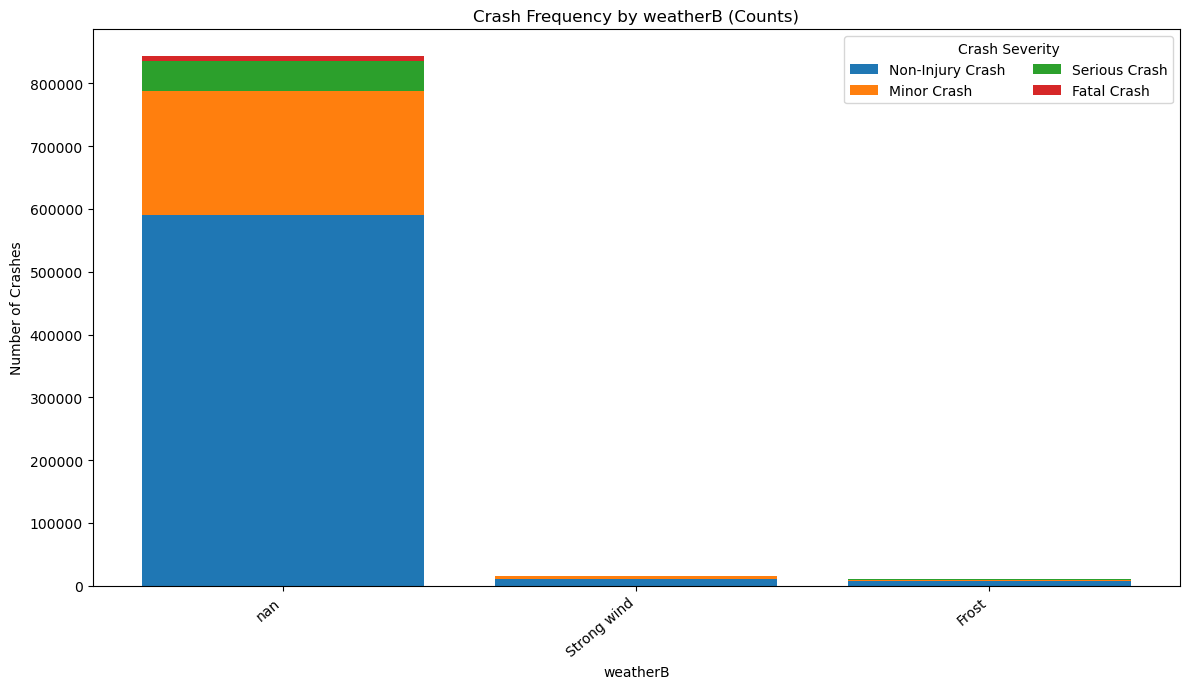

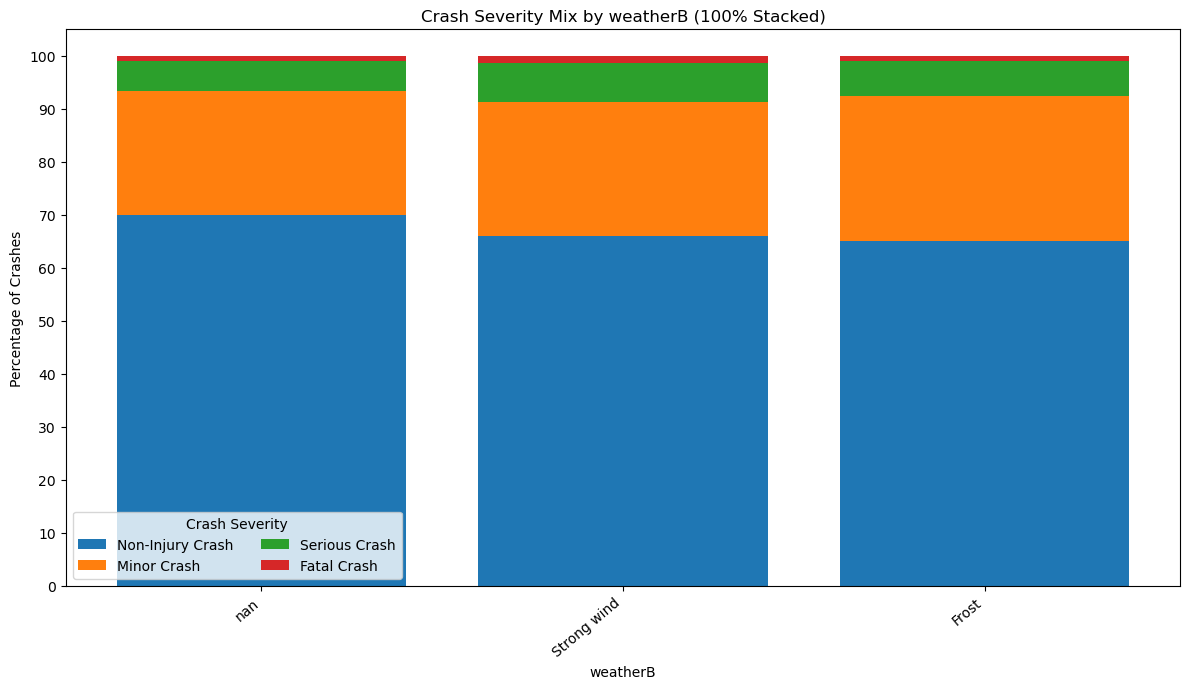

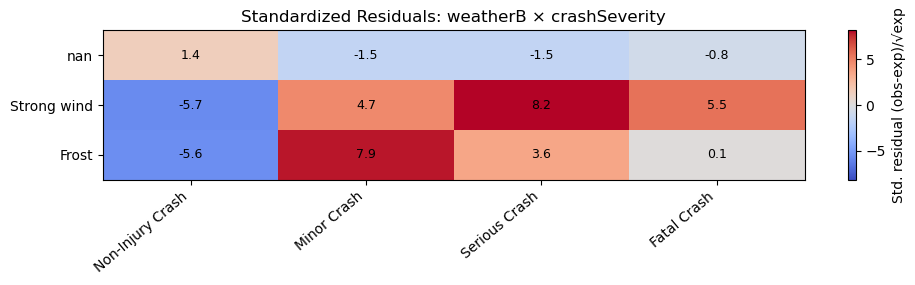

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---- Config ----
FEATURE = "weatherB"
TARGET  = "crashSeverity"
TOP_N   = 12          # keep top-N weather categories; rest -> "Other"
HIDE_UNKNOWN = False  # set True to drop "Unknown"/NaN bucket

# ---- Guard ----
if not {FEATURE, TARGET}.issubset(df.columns):
    raise ValueError(f"[Skip] {FEATURE} vs. {TARGET}: missing columns.")

# ---- Prep feature & target ----
feat = df[FEATURE].astype(str).fillna("Unknown")
y    = df[TARGET].astype(str)

if HIDE_UNKNOWN:
    feat = feat.replace({"Unknown": np.nan}).dropna()
    y = y.loc[feat.index]  # align

# Base crosstab
ct0 = pd.crosstab(feat, y)

# Keep a tidy severity order
preferred = ["Non-Injury Crash", "Minor Crash", "Serious Crash", "Fatal Crash"]
sev_cols = [c for c in preferred if c in ct0.columns] + [c for c in ct0.columns if c not in preferred]
ct0 = ct0[sev_cols]

# Reduce long tails: keep TOP_N most frequent weather; others aggregated
if TOP_N is not None and len(ct0) > TOP_N:
    top_rows = ct0.sum(axis=1).sort_values(ascending=False).index[:TOP_N]
    ct_top = ct0.loc[top_rows]
    ct_other = ct0.drop(top_rows).sum(axis=0).to_frame().T
    ct_other.index = [f"Other ({ct0.shape[0]-TOP_N} cats)"]
    ct = pd.concat([ct_top, ct_other], axis=0)
else:
    ct = ct0.copy()

# Order rows by total count (desc)
ct = ct.loc[ct.sum(axis=1).sort_values(ascending=False).index]

# ---------- Chi-square + Cramér’s V ----------
obs = ct.values.astype(float)
row_sums = obs.sum(axis=1, keepdims=True)
col_sums = obs.sum(axis=0, keepdims=True)
total = obs.sum()
expected = (row_sums @ col_sums) / total

with np.errstate(divide="ignore", invalid="ignore"):
    chi2 = np.nansum((obs - expected) ** 2 / expected)
dof = (ct.shape[0]-1)*(ct.shape[1]-1)

try:
    from scipy.stats import chi2 as scipy_chi2
    p_val = scipy_chi2.sf(chi2, dof)
except Exception:
    p_val = float("nan")

k = min(ct.shape)
cramers_v = np.sqrt(chi2 / (total * (k - 1))) if k > 1 else np.nan

print(f"[Chi-square] χ²={chi2:.2f}, dof={dof}, p={p_val:.4g}")
print(f"[Effect size] Cramér’s V={cramers_v:.3f}")

# Helper for labels
def _add_bar_labels(bars, fmt="{:,.0f}"):
    for b in bars:
        h = b.get_height()
        if np.isfinite(h) and h > 0:
            plt.text(b.get_x()+b.get_width()/2, h, fmt.format(h),
                     ha="center", va="bottom", fontsize=9)

# ---------- Plot 1: Stacked counts ----------
plt.figure(figsize=(12, 7))
x = np.arange(len(ct.index))
bottom = np.zeros(len(ct), dtype=float)
for col in ct.columns:
    bars = plt.bar(x, ct[col].values, bottom=bottom, label=col)
    bottom += ct[col].values
plt.title(f"Crash Frequency by {FEATURE} (Counts)")
plt.xlabel(FEATURE)
plt.ylabel("Number of Crashes")
plt.xticks(x, ct.index, rotation=40, ha="right")
plt.legend(title="Crash Severity", ncol=2)
plt.tight_layout()
plt.show()

# ---------- Plot 2: 100% stacked proportions ----------
ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100
plt.figure(figsize=(12, 7))
x = np.arange(len(ct_pct.index))
bottom = np.zeros(len(ct_pct), dtype=float)
for col in ct_pct.columns:
    plt.bar(x, ct_pct[col].values, bottom=bottom, label=col)
    bottom += ct_pct[col].values
plt.title(f"Crash Severity Mix by {FEATURE} (100% Stacked)")
plt.xlabel(FEATURE)
plt.ylabel("Percentage of Crashes")
plt.yticks(np.arange(0, 101, 10))
plt.xticks(x, ct_pct.index, rotation=40, ha="right")
plt.legend(title="Crash Severity", ncol=2)
plt.tight_layout()
plt.show()

# ---------- Plot 3: Standardized residuals heatmap ----------
std_resid = (obs - expected) / np.sqrt(expected)
lim = np.nanmax(np.abs(std_resid))
plt.figure(figsize=(10, 0.5 + 0.35*ct.shape[0] + 0.35*ct.shape[1]))
im = plt.imshow(std_resid, aspect="auto", cmap="coolwarm", vmin=-lim, vmax=lim)
plt.title(f"Standardized Residuals: {FEATURE} × {TARGET}")
plt.xticks(np.arange(ct.shape[1]), ct.columns, rotation=40, ha="right")
plt.yticks(np.arange(ct.shape[0]), ct.index)

for i in range(std_resid.shape[0]):
    for j in range(std_resid.shape[1]):
        val = std_resid[i, j]
        if np.isfinite(val):
            plt.text(j, i, f"{val:.1f}", ha="center", va="center", fontsize=9)

cbar = plt.colorbar(im)
cbar.set_label("Std. residual (obs-exp)/√exp")
plt.tight_layout()
plt.show()


### Weather Conditions vs. Crash Severity (weatherA)
- The chi-square statistic is very high and the p-value is less than 0.001, indicating a statistically significant association between weather conditions (weatherA) and crash severity. The vast majority of crashes occur under "Fine" weather, which is expected because it is the most common condition. However, even though other weather conditions (like Heavy rain, Light rain, or Mist or Fog) have lower frequencies, the differences in distribution of crash severity across these conditions are statistically significant. This implies that weather conditions affect the severity profile of crashes. For instance, conditions like Heavy rain and Light rain have proportionally higher counts of “Serious Crash” relative to their overall crash counts compared to "Fine" weather.

### Weather Conditions vs. Crash Severity (weatherB)
- Similarly, the chi-square test for weatherB shows a statistically significant association (p < 0.001) between weather conditions and crash severity. Here, the "Null" category dominates, which may represent cases where weatherB data was not recorded or the weather was considered normal. Nevertheless, the differences observed for "Frost" and "Strong wind" compared to the Null category suggest that these conditions also influence the severity of crashes. Although the chi-square statistic for weatherB is lower than for weatherA, the result is still highly significant, indicating that both weatherA and weatherB have meaningful impacts on crash severity.

In [155]:
# --- Light vs. crashSeverity (optional) ---
if {"light", "crashSeverity"}.issubset(df.columns):
    _ = chi_square_report(df, "light", "crashSeverity")
else:
    print("[Skip] light vs. crashSeverity: missing columns.")

Contingency Table (light vs. crashSeverity):



crashSeverity,Non-Injury Crash,Minor Crash,Serious Crash,Fatal Crash
light,,,,
Bright sun,217842,78826,19501,2677
Dark,169650,53115,14983,3013
Overcast,183184,62647,13276,1963
Twilight,28185,9866,2402,370



Chi-square: 1281.450, p-value: 0.000000, dof: 9


[Chi-square] χ²=4582.03, dof=12, p=0
[Effect size] Cramér’s V=0.042


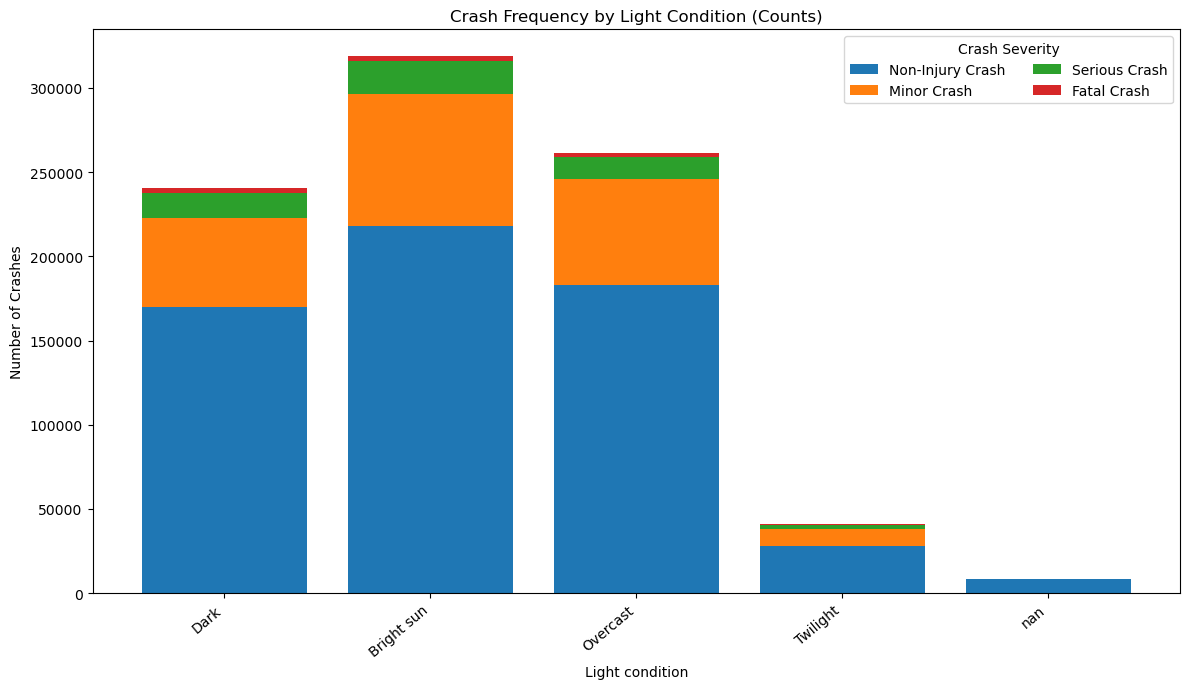

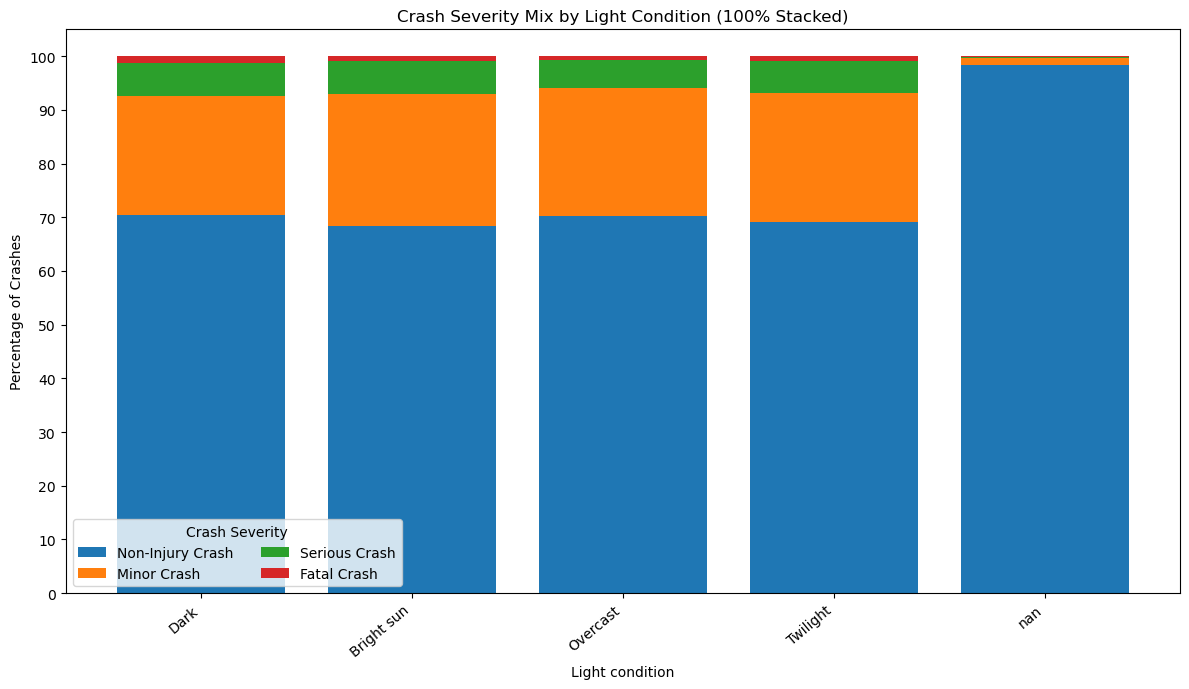

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---- Config ----
FEATURE = "light"
TARGET  = "crashSeverity"
HIDE_UNKNOWN = False  # set True to drop "Unknown"/NaN bucket from plots

# ---- Guard ----
if not {FEATURE, TARGET}.issubset(df.columns):
    raise ValueError(f"[Skip] {FEATURE} vs. {TARGET}: missing columns.")

# ---- Prep feature & target ----
x_feat = df[FEATURE].astype(str).fillna("Unknown")
y_lab  = df[TARGET].astype(str)

if HIDE_UNKNOWN:
    mask = x_feat != "Unknown"
    x_feat = x_feat[mask]
    y_lab  = y_lab[mask]

# Base crosstab
ct = pd.crosstab(x_feat, y_lab)

# Order severity columns in a sensible way
preferred_sev = ["Non-Injury Crash", "Minor Crash", "Serious Crash", "Fatal Crash"]
sev_cols = [c for c in preferred_sev if c in ct.columns] + [c for c in ct.columns if c not in preferred_sev]
ct = ct[sev_cols]

# Order LIGHT rows by common-sense order if present, else by count
preferred_light = [
    "Daylight",
    "Dawn",
    "Dusk",
    "Dark - street lights on",
    "Dark - street lights off",
    "Dark",
    "Dark - unknown lighting",
    "Unknown"
]
row_order = [r for r in preferred_light if r in ct.index] + [r for r in ct.index if r not in preferred_light]
ct = ct.loc[row_order] if len(row_order) else ct.loc[ct.sum(axis=1).sort_values(ascending=False).index]

# ---------- Chi-square + Cramér’s V ----------
obs = ct.values.astype(float)
row_sums = obs.sum(axis=1, keepdims=True)
col_sums = obs.sum(axis=0, keepdims=True)
total = obs.sum()
expected = (row_sums @ col_sums) / total

with np.errstate(divide="ignore", invalid="ignore"):
    chi2 = np.nansum((obs - expected) ** 2 / expected)
dof = (ct.shape[0]-1)*(ct.shape[1]-1)

try:
    from scipy.stats import chi2 as scipy_chi2
    p_val = scipy_chi2.sf(chi2, dof)
except Exception:
    p_val = float("nan")

k = min(ct.shape)
cramers_v = np.sqrt(chi2 / (total * (k - 1))) if k > 1 else np.nan

print(f"[Chi-square] χ²={chi2:.2f}, dof={dof}, p={p_val:.4g}")
print(f"[Effect size] Cramér’s V={cramers_v:.3f}")

# Helper: bar labels
def _add_bar_labels(bars, fmt="{:,.0f}"):
    for b in bars:
        h = b.get_height()
        if np.isfinite(h) and h > 0:
            plt.text(b.get_x()+b.get_width()/2, h, fmt.format(h),
                     ha="center", va="bottom", fontsize=9)

# ---------- Plot 1: Stacked counts ----------
plt.figure(figsize=(12, 7))
x = np.arange(len(ct.index))
bottom = np.zeros(len(ct), dtype=float)
for col in ct.columns:
    bars = plt.bar(x, ct[col].values, bottom=bottom, label=col)
    bottom += ct[col].values
plt.title("Crash Frequency by Light Condition (Counts)")
plt.xlabel("Light condition")
plt.ylabel("Number of Crashes")
plt.xticks(x, ct.index, rotation=40, ha="right")
plt.legend(title="Crash Severity", ncol=2)
plt.tight_layout()
plt.show()

# ---------- Plot 2: 100% stacked proportions ----------
ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100
plt.figure(figsize=(12, 7))
x = np.arange(len(ct_pct.index))
bottom = np.zeros(len(ct_pct), dtype=float)
for col in ct_pct.columns:
    plt.bar(x, ct_pct[col].values, bottom=bottom, label=col)
    bottom += ct_pct[col].values
plt.title("Crash Severity Mix by Light Condition (100% Stacked)")
plt.xlabel("Light condition")
plt.ylabel("Percentage of Crashes")
plt.yticks(np.arange(0, 101, 10))
plt.xticks(x, ct_pct.index, rotation=40, ha="right")
plt.legend(title="Crash Severity", ncol=2)
plt.tight_layout()
plt.show()

# ---------- Plot 3: Standardized residuals heatmap


feature_key   Feature  Levels(feature)  Levels(severity)      N Chi-square  df  p-value Cramér’s V
   weatherA Weather A                7                 4 869886    4881.94  18 0.00e+00      0.043
      light     Light                5                 4 869886    4582.03  12 0.00e+00      0.042
   weatherB Weather B                3                 4 869886     266.67   6 1.12e-54      0.012


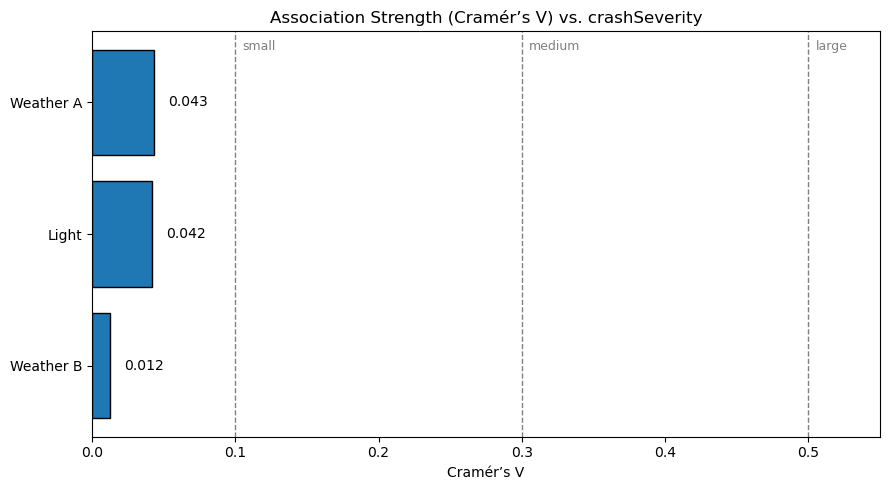

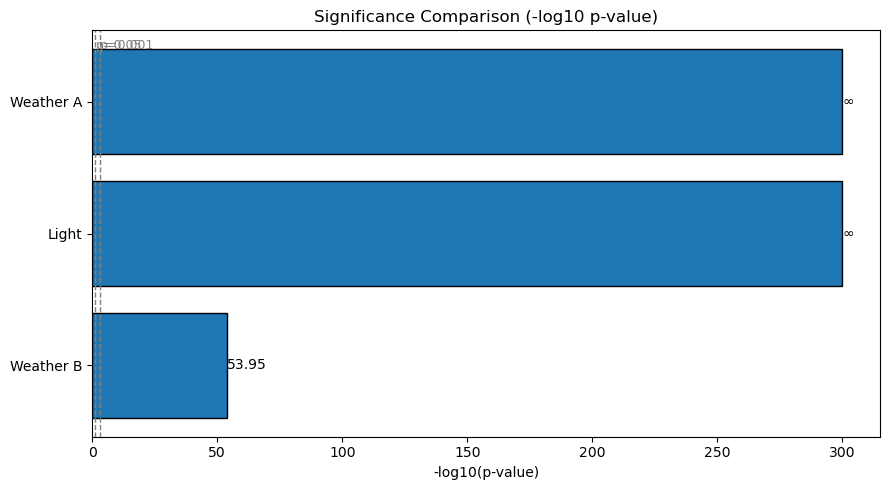

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

TARGET = "crashSeverity"
FEATURE_LABELS = {
    "weatherA": "Weather A",
    "weatherB": "Weather B",
    "WetherB": "Weather B",  # handle typo/variant
    "light": "Light"
}

# Prefer 'weatherB' if both spellings exist
feat_candidates = ["weatherA"] + (["weatherB"] if "weatherB" in df.columns else ["WetherB"]) + ["light"]
features = [f for f in feat_candidates if f in df.columns]

if TARGET not in df.columns or not features:
    raise ValueError("Required columns missing. Need crashSeverity and at least one of weatherA/weatherB(WetherB)/light.")

def _chi2_summary(feature, target=TARGET, drop_unknown=False):
    x = df[feature].astype(str).fillna("Unknown")
    y = df[target].astype(str)

    if drop_unknown:
        mask = x != "Unknown"
        x = x[mask]
        y = y[mask]

    ct = pd.crosstab(x, y)

    # order severity columns nicely if those exact labels exist
    pref = ["Non-Injury Crash", "Minor Crash", "Serious Crash", "Fatal Crash"]
    sev_cols = [c for c in pref if c in ct.columns] + [c for c in ct.columns if c not in pref]
    ct = ct[sev_cols]

    obs = ct.values.astype(float)
    n = obs.sum()
    row_sums = obs.sum(axis=1, keepdims=True)
    col_sums = obs.sum(axis=0, keepdims=True)
    expected = (row_sums @ col_sums) / n

    with np.errstate(divide="ignore", invalid="ignore"):
        chi2 = np.nansum((obs - expected) ** 2 / expected)

    dof = (ct.shape[0] - 1) * (ct.shape[1] - 1)
    k = min(ct.shape)
    cramers_v = np.sqrt(chi2 / (n * (k - 1))) if k > 1 else np.nan

    # p-value if SciPy available
    try:
        from scipy.stats import chi2 as scipy_chi2
        p_val = scipy_chi2.sf(chi2, dof)
    except Exception:
        p_val = np.nan

    return {
        "feature_key": feature,
        "Feature": FEATURE_LABELS.get(feature, feature),
        "Levels(feature)": ct.shape[0],
        "Levels(severity)": ct.shape[1],
        "N": int(n),
        "Chi-square": chi2,
        "df": dof,
        "p-value": p_val,
        "Cramér’s V": cramers_v
    }

# ---- Compute summaries ----
rows = [_chi2_summary(f, drop_unknown=False) for f in features]
summary_df = pd.DataFrame(rows).sort_values("Cramér’s V", ascending=False).reset_index(drop=True)

# Display numeric table
with pd.option_context("display.max_columns", None):
    print(summary_df.to_string(index=False, formatters={
        "Chi-square": "{:.2f}".format,
        "p-value":    lambda x: f"{x:.2e}" if np.isfinite(x) else "nan",
        "Cramér’s V": "{:.3f}".format
    }))

# ---- Visualizations ----
labels = summary_df["Feature"].tolist()
v_vals = summary_df["Cramér’s V"].values
p_vals = summary_df["p-value"].values
neglog_p = -np.log10(np.clip(p_vals, 1e-300, 1))  # avoid log(0); clip tiny p's

# 1) Cramér’s V (effect size)
plt.figure(figsize=(9, 5))
ypos = np.arange(len(labels))
plt.barh(ypos, v_vals, edgecolor="black")
for i, val in enumerate(v_vals):
    plt.text(val + 0.01, i, f"{val:.3f}", va="center", fontsize=10)
plt.gca().invert_yaxis()
plt.title("Association Strength (Cramér’s V) vs. crashSeverity")
plt.xlabel("Cramér’s V")
plt.yticks(ypos, labels)
# reference lines (Cohen-style heuristics)
for thr, name in [(0.10, "small"), (0.30, "medium"), (0.50, "large")]:
    plt.axvline(thr, linestyle="--", linewidth=1, color="gray")
    plt.text(thr+0.005, -0.4, name, fontsize=9, color="gray")
plt.xlim(0, max(0.55, (v_vals.max() if len(v_vals) else 0) + 0.1))
plt.tight_layout()
plt.show()

# 2) -log10(p) (significance)
plt.figure(figsize=(9, 5))
ypos = np.arange(len(labels))
plt.barh(ypos, neglog_p, edgecolor="black")
for i, val in enumerate(neglog_p):
    label = "∞" if not np.isfinite(p_vals[i]) or p_vals[i] == 0 else f"{val:.2f}"
    plt.text(val + 0.05, i, label, va="center", fontsize=10)
plt.gca().invert_yaxis()
plt.title("Significance Comparison (-log10 p-value)")
plt.xlabel("-log10(p-value)")
plt.yticks(ypos, labels)
# reference lines: p=0.05 and p=0.001
for thr, txt in [(1.3010, "p=0.05"), (3.0000, "p=0.001")]:
    plt.axvline(thr, linestyle="--", linewidth=1, color="gray")
    plt.text(thr+0.05, -0.4, txt, fontsize=9, color="gray")
plt.tight_layout()
plt.show()


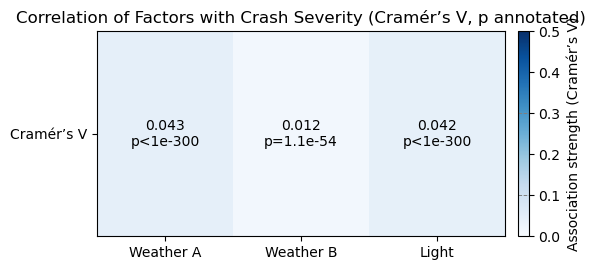

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

TARGET = "crashSeverity"
FEATURE_LABELS = {
    "weatherA": "Weather A",
    "weatherB": "Weather B",
    "WetherB": "Weather B",  # handle variant spelling
    "light": "Light"
}

# Prefer 'weatherB' if both spellings exist
feat_candidates = ["weatherA"] + (["weatherB"] if "weatherB" in df.columns else ["WetherB"]) + ["light"]
features = [f for f in feat_candidates if f in df.columns]

if TARGET not in df.columns or not features:
    raise ValueError("Need 'crashSeverity' and at least one of: weatherA, weatherB/WetherB, light.")

def _chi2_summary(feature, target=TARGET, drop_unknown=False):
    x = df[feature].astype(str).fillna("Unknown")
    y = df[target].astype(str)
    if drop_unknown:
        m = x != "Unknown"
        x, y = x[m], y[m]

    ct = pd.crosstab(x, y)

    # Order severity nicely if labels match your data
    pref = ["Non-Injury Crash", "Minor Crash", "Serious Crash", "Fatal Crash"]
    sev_cols = [c for c in pref if c in ct.columns] + [c for c in ct.columns if c not in pref]
    ct = ct[sev_cols]

    obs = ct.values.astype(float)
    n = obs.sum()
    row_sums = obs.sum(axis=1, keepdims=True)
    col_sums = obs.sum(axis=0, keepdims=True)
    expected = (row_sums @ col_sums) / n

    with np.errstate(divide="ignore", invalid="ignore"):
        chi2 = np.nansum((obs - expected) ** 2 / expected)
    dof = (ct.shape[0]-1)*(ct.shape[1]-1)
    k = min(ct.shape)
    v = np.sqrt(chi2 / (n * (k - 1))) if k > 1 else np.nan

    try:
        from scipy.stats import chi2 as scipy_chi2
        p_val = scipy_chi2.sf(chi2, dof)
    except Exception:
        p_val = np.nan

    return FEATURE_LABELS.get(feature, feature), v, p_val

# Compute metrics
labels, v_vals, p_vals = [], [], []
for f in features:
    lab, v, p = _chi2_summary(f)
    labels.append(lab)
    v_vals.append(v)
    p_vals.append(p)

v_vals = np.array(v_vals, dtype=float)
p_vals = np.array(p_vals, dtype=float)

# ---- Single heatmap chart ----
fig, ax = plt.subplots(figsize=(max(6, 1.8*len(labels)), 2.8))

# put Cramér’s V in a 1xN matrix for imshow
mat = v_vals.reshape(1, -1)
vmax = max(0.5, float(np.nanmax(v_vals)) + 0.05)  # stable color scale up to at least 0.5
im = ax.imshow(mat, aspect="auto", cmap="Blues", vmin=0, vmax=vmax)

# Axes formatting
ax.set_yticks([0])
ax.set_yticklabels(["Cramér’s V"])
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=0, ha="center")

# Annotate each cell with V and p
for j in range(len(labels)):
    vtxt = "nan" if not np.isfinite(v_vals[j]) else f"{v_vals[j]:.3f}"
    if np.isfinite(p_vals[j]):
        ptxt = f"p={p_vals[j]:.1e}" if p_vals[j] > 0 else "p<1e-300"
    else:
        ptxt = "p=nan"
    ax.text(j, 0, f"{vtxt}\n{ptxt}", ha="center", va="center", fontsize=10, color="black")

cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.03)
cbar.set_label("Association strength (Cramér’s V)")

# Reference bands (small/medium/large heuristics)
for thr, name in [(0.10, "small"), (0.30, "medium"), (0.50, "large")]:
    # draw faint tick lines on colorbar to aid reading
    if 0 <= thr <= vmax:
        cbar.ax.hlines((thr/vmax)*cbar.ax.get_ylim()[1], *cbar.ax.get_xlim(),
                       colors="gray", linestyles="--", linewidth=0.7)
plt.title("Correlation of Factors with Crash Severity (Cramér’s V, p annotated)")
plt.tight_layout()
plt.show()


## Q2. Does speed limit impact crash severity?

Contingency Table (speed_bin vs. crashSeverity):



crashSeverity,Non-Injury Crash,Minor Crash,Serious Crash,Fatal Crash
speed_bin,,,,
<=50,393000,114532,22687,1730
60,17754,6054,1364,184
70–80,48000,17790,4471,766
100,147653,65608,21402,5329
110,315,84,16,5



Chi-square: 18877.555, p-value: 0.000000, dof: 12


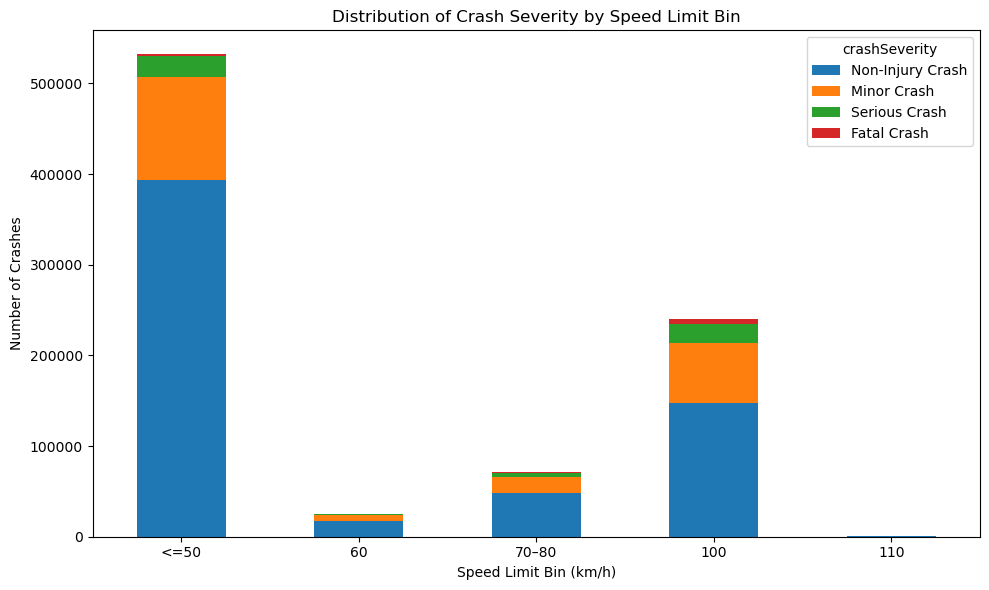

In [159]:
# --- Speed bin vs. crashSeverity ---
if {"speed_bin", "crashSeverity"}.issubset(df.columns):
    chi2, p, dof, ct = chi_square_report(df, "speed_bin", "crashSeverity")
    # Stacked bar: distribution of severity per speed bin
    if not ct.empty:
        (ct.reindex(index=ct.index.astype(str))
           .plot(kind='bar', stacked=True, figsize=(10,6)))
        plt.title("Distribution of Crash Severity by Speed Limit Bin")
        plt.xlabel("Speed Limit Bin (km/h)")
        plt.ylabel("Number of Crashes")
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()
else:
    print("[Skip] Speed analysis not possible; required columns missing.")

- Since the Chi-square test resulted in a very low p-value (0.0), it indicates a statistically significant relationship between speed limits and crash severity. This means that different speed limits are associated with different levels of crash severity.

### How to Interpret This for Insurance Pricing Analysis:¶
- Higher speed limits may lead to more severe crashes: Insurers could charge higher premiums for policies covering drivers in high-speed zones.

- Lower speed limits may be associated with lower severity crashes: Policies in lower speed areas could have lower premiums.

- Speed regulations matter: This insight could support policy decisions or safety recommendations to reduce severe crashes.

## Q3. Are certain regions (or TLAs) more prone to severe crashes?

Contingency Table (region vs. crashSeverity):



crashSeverity,Non-Injury Crash,Minor Crash,Serious Crash,Fatal Crash
region,,,,
Auckland Region,223856,63514,11437,1299
Bay of Plenty Region,35537,10977,3124,683
Canterbury Region,55932,23882,6568,953
Gisborne Region,7334,2337,640,110
Hawke's Bay Region,23620,8048,2211,397
Manawatū-Whanganui Region,33481,11942,3480,712
Marlborough Region,6028,2061,533,119
Nelson Region,5942,2022,464,41
Northland Region,23527,8782,2696,638



Chi-square: 11201.422, p-value: 0.000000, dof: 45


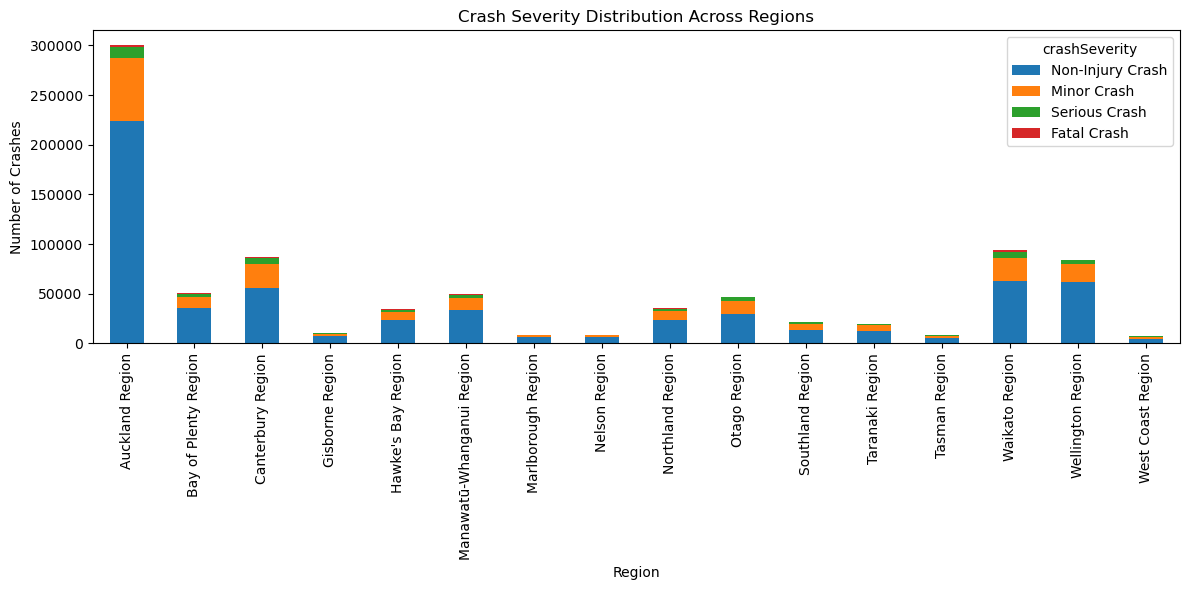

Top 10 regions by severe crash rate:


,SevereCrashRate
region,
West Coast Region,0.113598
Tasman Region,0.102580
Southland Region,0.096284
Northland Region,0.093539
Otago Region,0.089118
Canterbury Region,0.086117
Taranaki Region,0.085609
Manawatū-Whanganui Region,0.084491
Waikato Region,0.083247


In [160]:
# --- Region vs. crashSeverity ---
if {"region", "crashSeverity"}.issubset(df.columns):
    chi2, p, dof, ct = chi_square_report(df, "region", "crashSeverity")
    if not ct.empty:
        (ct.reindex(index=sorted(ct.index.dropna().astype(str).tolist()))
           .plot(kind='bar', stacked=True, figsize=(12,6)))
        plt.title("Crash Severity Distribution Across Regions")
        plt.xlabel("Region")
        plt.ylabel("Number of Crashes")
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

    # Compute severe crash rate per region = (Serious + Fatal) / Total
    if "Serious Crash" in ct.columns and "Fatal Crash" in ct.columns:
        severe = ct.get("Serious Crash", 0) + ct.get("Fatal Crash", 0)
        total = ct.sum(axis=1)
        severe_rate = (severe / total).sort_values(ascending=False)
        top10 = severe_rate.head(10).to_frame("SevereCrashRate")
        print("Top 10 regions by severe crash rate:")
        display(top10)
else:
    print("[Skip] Region analysis not possible; required columns missing.")

Contingency Table (region vs. crashSeverity):



crashSeverity,Non-Injury Crash,Minor Crash,Serious Crash,Fatal Crash
region,,,,
Auckland Region,223856,63514,11437,1299
Bay of Plenty Region,35537,10977,3124,683
Canterbury Region,55932,23882,6568,953
Gisborne Region,7334,2337,640,110
Hawke's Bay Region,23620,8048,2211,397
Manawatū-Whanganui Region,33481,11942,3480,712
Marlborough Region,6028,2061,533,119
Nelson Region,5942,2022,464,41
Northland Region,23527,8782,2696,638



Chi-square: 11201.422, p-value: 0.000000, dof: 45


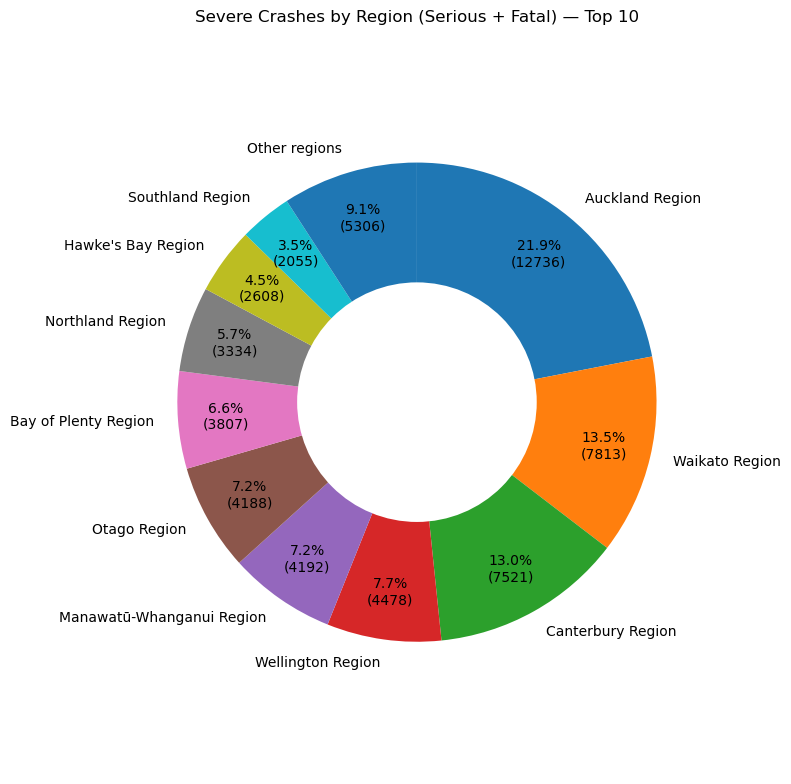

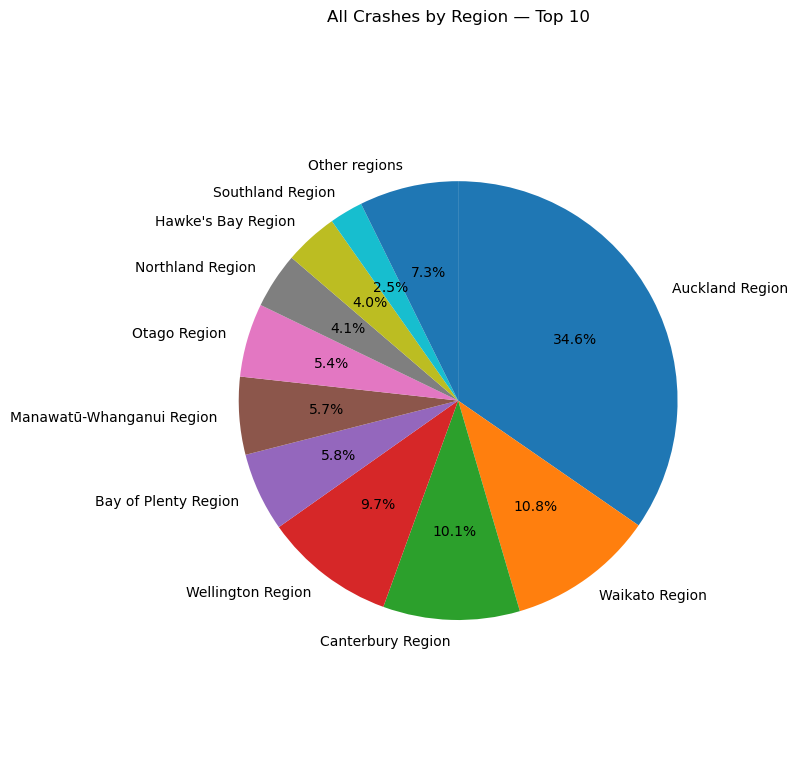

In [161]:
# --- Region vs. crashSeverity — PIE CHARTS (pandas>=2 compatible) ---
TOP_N = 10  # regions to show before grouping the rest into "Other regions"

if {"region", "crashSeverity"}.issubset(df.columns):
    chi2, p, dof, ct = chi_square_report(df, "region", "crashSeverity")

    if not ct.empty:
        ct = ct.copy()
        ct.index = ct.index.astype(str)

        # ---------- PIE 1: Severe crashes (Serious + Fatal) by region ----------
        severe_counts = ct.get("Serious Crash", 0).add(ct.get("Fatal Crash", 0), fill_value=0)
        severe_counts = severe_counts.sort_values(ascending=False)

        if severe_counts.sum() > 0:
            top = severe_counts.head(TOP_N)
            other = severe_counts.iloc[TOP_N:].sum()
            sizes = pd.concat([top, pd.Series({"Other regions": other})]) if other > 0 else top
            labels = sizes.index.tolist()
            total = float(sizes.sum())

            fig, ax = plt.subplots(figsize=(8, 8))
            wedges, texts, autotexts = ax.pie(
                sizes.values,
                labels=labels,
                autopct=lambda pct: f"{pct:.1f}%\n({int(round(pct*total/100.0))})",
                startangle=90,
                counterclock=False,
                pctdistance=0.80
            )
            # donut style
            centre = plt.Circle((0, 0), 0.50, fc="white")
            ax.add_artist(centre)

            ax.set_title(f"Severe Crashes by Region (Serious + Fatal) — Top {min(TOP_N, len(sizes))}")
            ax.axis("equal")
            plt.tight_layout()
            plt.show()
        else:
            print("No 'Serious Crash' or 'Fatal Crash' counts available to plot a severe-crash pie.")

        # ---------- PIE 2: All crashes by region (optional) ----------
        total_counts = ct.sum(axis=1).sort_values(ascending=False)
        if total_counts.sum() > 0:
            top_t = total_counts.head(TOP_N)
            other_t = total_counts.iloc[TOP_N:].sum()
            sizes2 = pd.concat([top_t, pd.Series({"Other regions": other_t})]) if other_t > 0 else top_t

            fig, ax = plt.subplots(figsize=(8, 8))
            ax.pie(
                sizes2.values,
                labels=sizes2.index.tolist(),
                autopct=lambda pct: f"{pct:.1f}%",
                startangle=90,
                counterclock=False
            )
            ax.set_title(f"All Crashes by Region — Top {min(TOP_N, len(sizes2))}")
            ax.axis("equal")
            plt.tight_layout()
            plt.show()
    else:
        print("[Skip] Contingency table is empty; nothing to plot.")
else:
    print("[Skip] Region analysis not possible; required columns missing.")


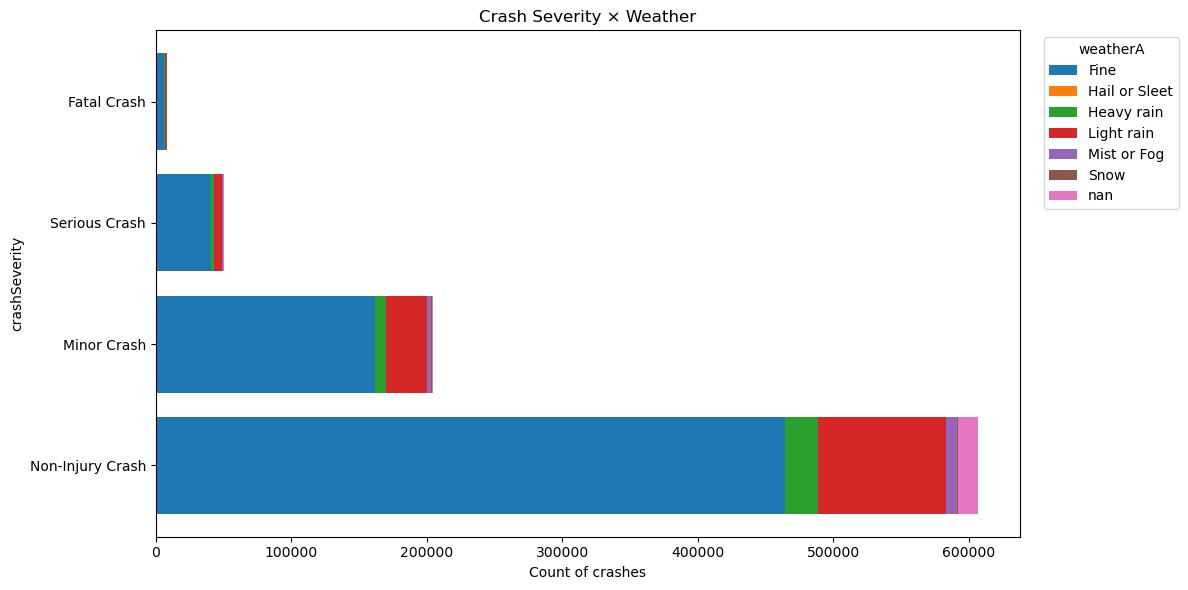

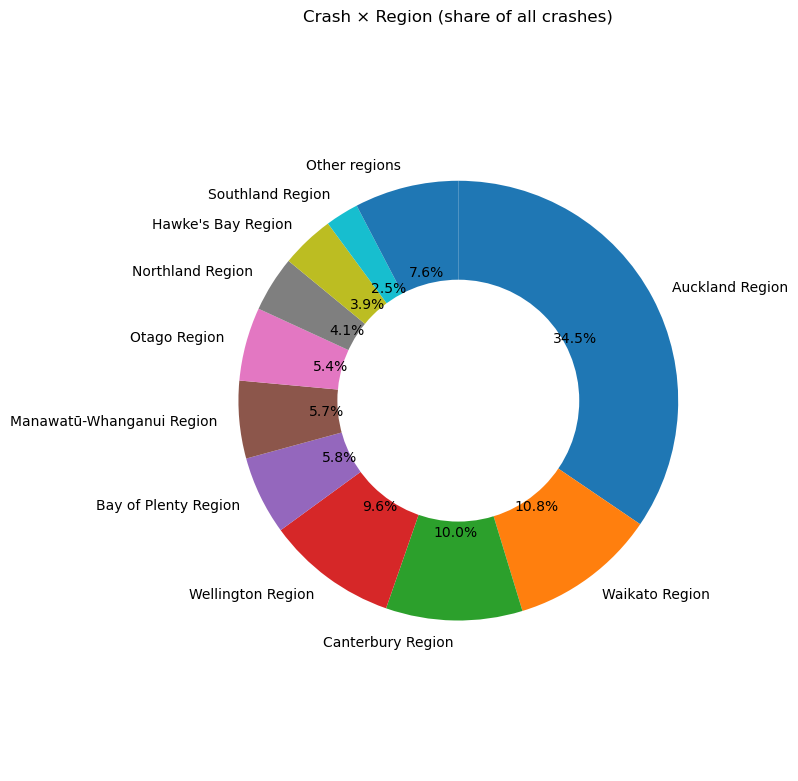

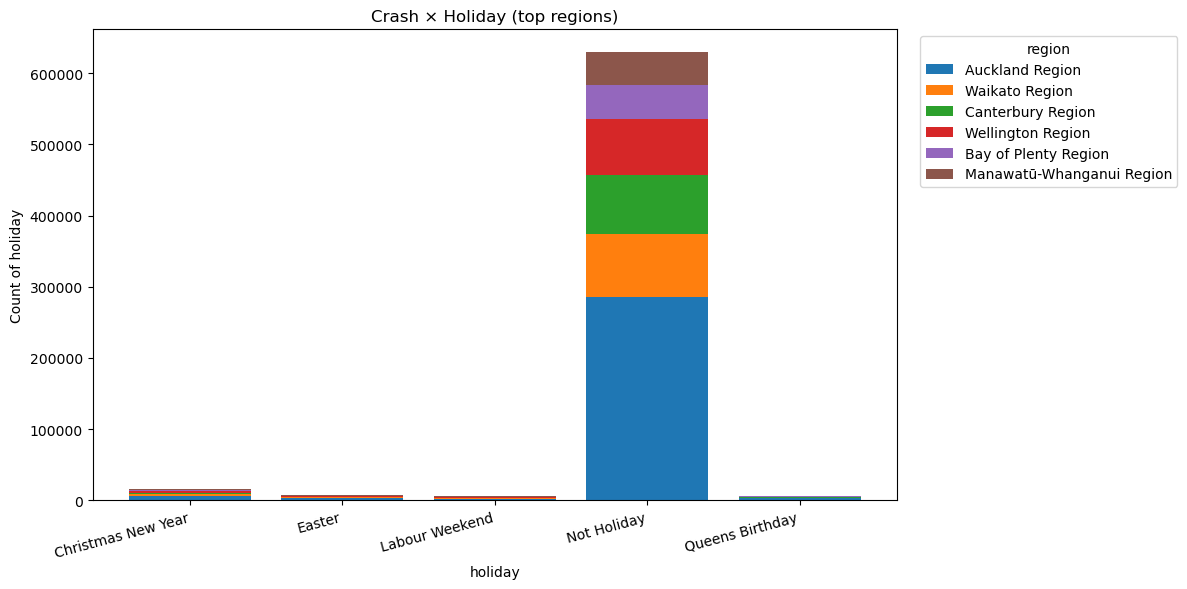

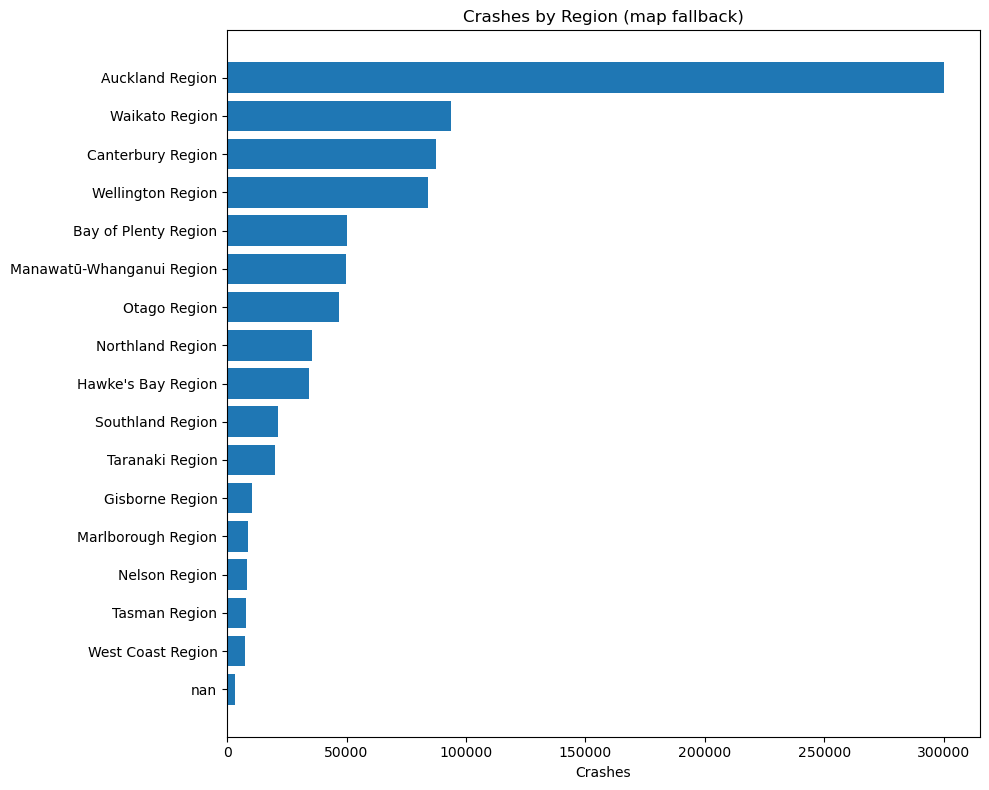

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------
# SETTINGS YOU CAN TWEAK
# --------------------------
TOP_REGIONS_PIE = 10          # slices to show in region pie (rest grouped as "Other regions")
TOP_REGIONS_HOLIDAY = 6       # how many regions to plot in the stacked holiday chart
HOLIDAY_COL = "holiday_filled" if "holiday_filled" in df.columns else ("holiday" if "holiday" in df.columns else None)

# If you have a NZ regions shapefile/GeoJSON, set its path here to draw the map,
# e.g., "data/nz_regions.geojson" or "path/to/NZL_adm1.shp"
NZ_REGIONS_PATH = None  # <- set to a valid file path to enable the map

# ========= 1) Crash Severity × Weather (stacked horizontal bar) =========
if {"crashSeverity", "weatherA"}.issubset(df.columns):
    ct_sw = pd.crosstab(df["crashSeverity"].astype(str), df["weatherA"].astype(str)).fillna(0)

    # Arrange severity order if present
    sev_order = ["Non-Injury Crash", "Minor Crash", "Serious Crash", "Fatal Crash"]
    existing_order = [s for s in sev_order if s in ct_sw.index]
    other_sev = [s for s in ct_sw.index if s not in existing_order]
    ct_sw = ct_sw.reindex(existing_order + other_sev).fillna(0)
    ct_sw = ct_sw.reindex(sorted(ct_sw.columns), axis=1)

    fig, ax = plt.subplots(figsize=(12, 6))
    left = np.zeros(len(ct_sw.index))
    for col in ct_sw.columns:
        ax.barh(ct_sw.index, ct_sw[col].values, left=left, label=col)
        left += ct_sw[col].values

    ax.set_title("Crash Severity × Weather")
    ax.set_xlabel("Count of crashes")
    ax.set_ylabel("crashSeverity")
    ax.legend(title="weatherA", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.show()
else:
    print("[Skip] Need columns 'crashSeverity' and 'weatherA' for the first chart.")

# ========= 2) Crash × Region (donut pie; Top N + Other) =========
if "region" in df.columns:
    region_counts = df["region"].astype(str).value_counts()
    top = region_counts.head(TOP_REGIONS_PIE)
    other = region_counts.iloc[TOP_REGIONS_PIE:].sum()
    sizes = pd.concat([top, pd.Series({"Other regions": other})]) if other > 0 else top

    fig, ax = plt.subplots(figsize=(8, 8))
    wedges, texts, autotexts = ax.pie(
        sizes.values,
        labels=sizes.index.tolist(),
        autopct=lambda pct: f"{pct:.1f}%",
        startangle=90,
        counterclock=False
    )
    # Donut hole
    centre = plt.Circle((0, 0), 0.55, fc="white")
    ax.add_artist(centre)
    ax.set_title("Crash × Region (share of all crashes)")
    ax.axis("equal")
    plt.tight_layout()
    plt.show()
else:
    print("[Skip] Need column 'region' for region pie.")

# ========= 3) Crash × Holiday (stacked bars by Region) =========
if HOLIDAY_COL and "region" in df.columns:
    # Crosstab: index = holiday, columns = region
    ct_h = pd.crosstab(df[HOLIDAY_COL].astype(str), df["region"].astype(str)).fillna(0)

    # Keep top-N regions by total volume so the stack is readable
    top_regions = ct_h.sum(axis=0).sort_values(ascending=False).head(TOP_REGIONS_HOLIDAY).index.tolist()
    ct_h_small = ct_h[top_regions]

    fig, ax = plt.subplots(figsize=(12, 6))
    bottom = np.zeros(len(ct_h_small.index))
    for col in ct_h_small.columns:
        ax.bar(ct_h_small.index, ct_h_small[col].values, bottom=bottom, label=col)
        bottom += ct_h_small[col].values

    ax.set_title("Crash × Holiday (top regions)")
    ax.set_xlabel("holiday")
    ax.set_ylabel("Count of holiday")
    plt.xticks(rotation=15, ha="right")
    ax.legend(title="region", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.show()
else:
    print("[Skip] Need a holiday column ('holiday_filled' or 'holiday') and 'region' for the holiday chart.")

# ========= 4) NZ Map (optional) — requires a regions boundary file =========
# If you set NZ_REGIONS_PATH to a valid shapefile/geojson, this will shade regions by crash counts.
try:
    if NZ_REGIONS_PATH is not None:
        import geopandas as gpd

        # Read boundaries and normalize region names to match your df["region"] strings
        gdf = gpd.read_file(NZ_REGIONS_PATH)
        # Try a couple of common name columns; adjust as needed for your data source
        name_col = next((c for c in ["name", "NAME", "region", "REGION", "region_name", "RegionName"] if c in gdf.columns), None)
        if name_col is None:
            raise ValueError("Could not find a name column in the shapefile. Add a mapping from shapefile names to df['region'].")

        # Prepare counts
        reg_counts = df["region"].astype(str).value_counts().rename("crashes").reset_index()
        reg_counts.columns = [name_col, "crashes"]

        # Merge and plot
        gdf2 = gdf.merge(reg_counts, on=name_col, how="left")
        gdf2["crashes"] = gdf2["crashes"].fillna(0)

        fig, ax = plt.subplots(figsize=(10, 8))
        gdf2.plot(column="crashes", ax=ax, legend=True, legend_kwds={"label": "Crashes"},
                  edgecolor="black", linewidth=0.5)
        ax.set_title("Crashes by Region — New Zealand")
        ax.set_axis_off()
        plt.tight_layout()
        plt.show()
    else:
        # Fallback: ranked bar if shapefile not provided
        if "region" in df.columns:
            counts = df["region"].astype(str).value_counts().sort_values(ascending=True)
            fig, ax = plt.subplots(figsize=(10, 8))
            ax.barh(counts.index, counts.values)
            ax.set_title("Crashes by Region (map fallback)")
            ax.set_xlabel("Crashes")
            plt.tight_layout()
            plt.show()
        else:
            print("[Skip] Map fallback also needs 'region'.")
except Exception as e:
    print(f"[Map skipped] {e}\nProvide NZ_REGIONS_PATH to a valid NZ regions boundary file (shapefile/geojson) to enable the map.")


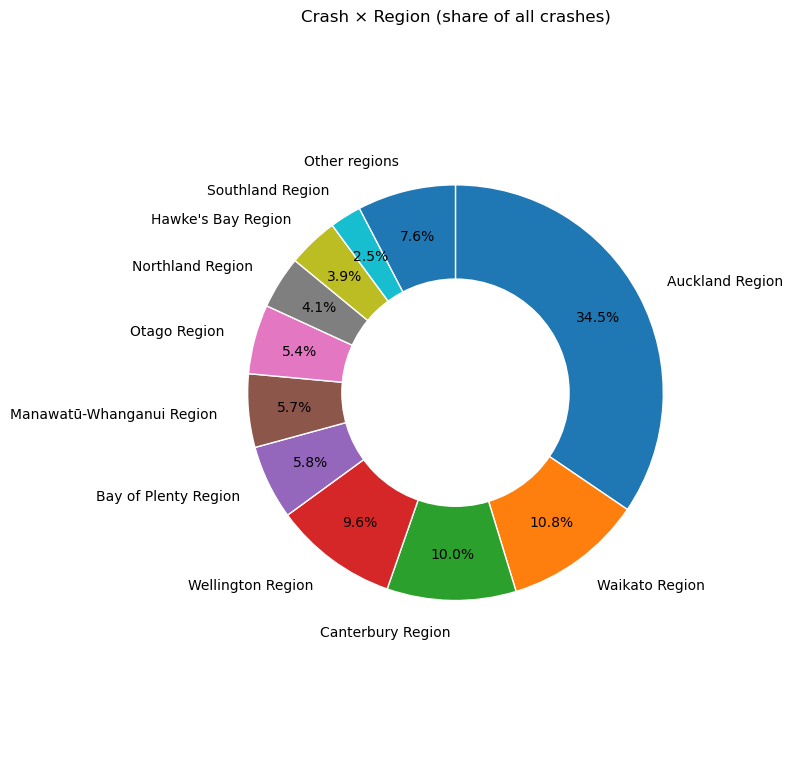

In [163]:
# --- Crash × Region (donut pie) with fixed % positions ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

TOP_REGIONS_PIE = 10
INNER_RADIUS = 0.55  # donut hole radius (matches the white circle we draw)

region_counts = df["region"].astype(str).value_counts()
top = region_counts.head(TOP_REGIONS_PIE)
other = region_counts.iloc[TOP_REGIONS_PIE:].sum()
sizes = pd.concat([top, pd.Series({"Other regions": other})]) if other > 0 else top
labels = sizes.index.tolist()
vals = sizes.values
total = float(vals.sum())

def autopct_fmt(pct):
    # hide labels for very small slices (<1%)
    return "" if pct < 1 else f"{pct:.1f}%"

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    vals,
    labels=labels,
    autopct=autopct_fmt,
    startangle=90,
    counterclock=False,
    labeldistance=1.15,                       # push labels a bit outside
    pctdistance=0.8,                          # initial placement (we’ll override next)
    textprops={"fontsize":10},
    wedgeprops={"linewidth":1, "edgecolor":"white"}
)

# Donut hole
centre = plt.Circle((0, 0), INNER_RADIUS, fc="white")
ax.add_artist(centre)

# Reposition % texts at the mid of the ring (between inner and outer radius)
r_pct = (1.0 + INNER_RADIUS) / 2.0
for w, t in zip(wedges, autotexts):
    if not t.get_text():  # was hidden by autopct_fmt
        continue
    ang = np.deg2rad((w.theta2 + w.theta1) / 2.0)
    x, y = r_pct * np.cos(ang), r_pct * np.sin(ang)
    t.set_position((x, y))
    t.set_ha("center"); t.set_va("center")

ax.set_title("Crash × Region (share of all crashes)")
ax.axis("equal")
plt.tight_layout()
plt.show()


- Since the Chi-square test resulted in a very low p-value (0.0), this confirms that crash severity significantly varies across different regions

### What This Means for Insurance Pricing:

 - Certain regions are riskier than others: Insurance companies can adjust premiums based on location risk.
 - Some areas may have more severe crashes: This could be due to higher speed limits, road conditions, or traffic density.
 - Local policies and interventions: Governments or transportation authorities can use this insight to enhance road safety in high-risk regions.


### Key Observations from the Chart

Auckland Region Dominates Crash Counts The Auckland Region has the highest number of crashes, significantly exceeding all other regions. It has a high proportion of non-injury crashes (light blue), but still records serious and fatal crashes. Possible reasons: High population density, traffic congestion, and major highways.

- Waikato and Wellington Also Show High Crash Rates

Waikato Region has notable serious and fatal crashes (red & orange segments), making it a high-risk area. Wellington Region also exhibits a significant number of crashes, though less than Waikato.

- Some Regions Have Fewer Crashes but Higher Severity

Bay of Plenty, Canterbury, and Hawke’s Bay regions show lower crash volumes but a higher proportion of serious and fatal crashes. This suggests rural roads and high-speed limits might be factors leading to more severe crashes.

- Regions with Lower Crash Counts

Nelson, Marlborough, West Coast, and Taranaki Regions have lower crash counts overall. However, if serious/fatal crashes are present even in these low-count regions, further investigation is needed.

In [164]:
# --- TLA vs. crashSeverity (optional deep dive) ---
if {"tlaId", "crashSeverity"}.issubset(df.columns):
    chi2, p, dof, ct_tla = chi_square_report(df, "tlaId", "crashSeverity")
    # Show only rates table (no huge plot)
    if "Serious Crash" in ct_tla.columns and "Fatal Crash" in ct_tla.columns:
        severe_tla = ct_tla.get("Serious Crash", 0) + ct_tla.get("Fatal Crash", 0)
        total_tla = ct_tla.sum(axis=1)
        severe_rate_tla = (severe_tla / total_tla).sort_values(ascending=False)
        print("Top 15 TLAs by severe crash rate:")
        display(severe_rate_tla.head(15).to_frame("SevereCrashRate"))
else:
    print("[Note] TLA deep-dive skipped: columns missing.")

Contingency Table (tlaId vs. crashSeverity):



crashSeverity,Non-Injury Crash,Minor Crash,Serious Crash,Fatal Crash
tlaId,,,,
1.0,8342,3681,1217,274
2.0,12742,3874,1029,265
3.0,2533,1273,480,104
11.0,3269,1463,432,77
12.0,3054,1330,425,120
...,...,...,...,...
72.0,2590,1657,528,63
73.0,4119,2324,963,144
74.0,1727,692,177,32



Chi-square: 20012.834, p-value: 0.000000, dof: 198
Top 15 TLAs by severe crash rate:


,SevereCrashRate
tlaId,
27.0,0.179852
73.0,0.146623
58.0,0.142065
66.0,0.136082
69.0,0.135070
29.0,0.133142
3.0,0.133030
67.0,0.131980
62.0,0.131688


## Q4. Are certain vehicle types more frequently involved in crashes over time?

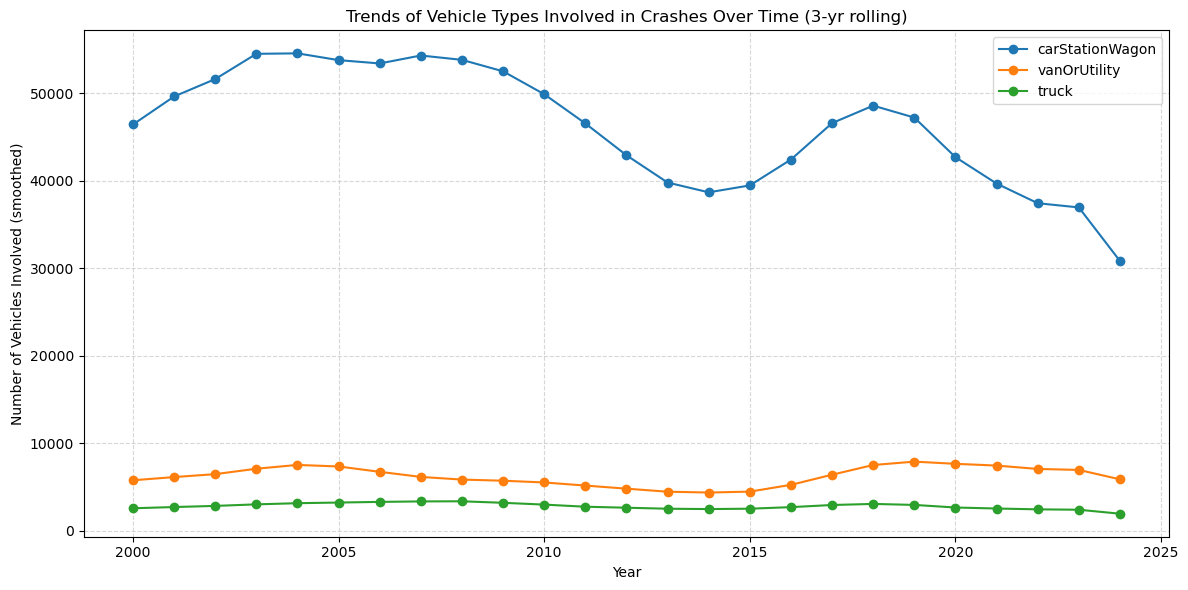

,carStationWagon,vanOrUtility,truck
crashYear,,,
2015,41495.0,4658.0,2607.0
2016,47416.0,6762.0,2996.0
2017,50916.0,7831.0,3261.0
2018,47487.0,7989.0,2979.0
2019,43317.0,7914.0,2652.0
2020,37350.0,7087.0,2373.0
2021,38427.0,7382.0,2635.0
2022,36578.0,6762.0,2368.0
2023,35906.0,6749.0,2239.0


In [165]:
veh_cols = [c for c in ["carStationWagon", "vanOrUtility", "truck"] if c in df.columns]
if "crashYear" in df.columns and veh_cols:
    # Exclude 2025 to avoid partial-year effects
    df_ts = df.copy()
    df_ts = df_ts[pd.to_numeric(df_ts["crashYear"], errors='coerce').notna()]
    df_ts["crashYear"] = df_ts["crashYear"].astype(int)
    df_ts = df_ts[df_ts["crashYear"] < 2025]

    # Ensure numeric
    for v in veh_cols:
        df_ts[v] = pd.to_numeric(df_ts[v], errors='coerce').fillna(0)

    yearly = df_ts.groupby("crashYear")[veh_cols].sum().sort_index()

    # 3-year rolling mean to smooth fluctuations
    yearly_roll = yearly.rolling(window=3, min_periods=1).mean()

    plt.figure(figsize=(12,6))
    for v in veh_cols:
        plt.plot(yearly_roll.index, yearly_roll[v], marker='o', label=v)
    plt.title("Trends of Vehicle Types Involved in Crashes Over Time (3-yr rolling)")
    plt.xlabel("Year")
    plt.ylabel("Number of Vehicles Involved (smoothed)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    display(yearly.tail(10))
else:
    print("[Skip] Vehicle time-series requires 'crashYear' and vehicle columns.")

### Insurance Pricing Insights Based on Crash Trends 🚗📊¶

1. Car Station Wagons: Higher Premiums 🚗

 - Observation: Highest crash involvement, peaking around 2005-2010, with a recent decline.
 - Pricing Impact: Higher premiums due to risk, but potential rate reductions if ADAS technology proves effective.

Action: ✔ Increase base premiums. ✔ Offer discounts for ADAS-equipped models.

2. Vans & Utility Vehicles: Increasing Risk 📦🚐

 - Observation: Steady rise in crashes, peaking around 2015-2018, possibly linked to e-commerce growth.
 - Pricing Impact: More crashes mean higher claims, leading to increased premiums.

Action: ✔ Raise commercial van premiums. ✔ Use telematics for safe driving discounts. ✔ Adjust fleet insurance rates.

3. Trucks: Stable Pricing 🚛

 - Observation: Lowest crash involvement, stable trend.
 - Pricing Impact: Premiums remain steady, but high liability costs due to accident severity.
 
Action: ✔ Maintain rates. ✔ Provide fleet tracking discounts.

### Recent Crash Decline: Data Issue or Safer Vehicles? 📉

 - Observation: Unusual sharp decline (2023-2024).
 - Possible Causes: Missing data, ADAS improvements, or reduced road usage.

Action: ✔ Validate data before adjusting rates. ✔ Offer lower premiums for ADAS-equipped cars.

### Final Takeaways 🏦

- Car station wagons = Higher premiums, ADAS discounts.
- Vans = Increased premiums, fleet monitoring incentives.
- Trucks = Stable rates, liability-focused pricing.
- Crash decline = Verify data before lowering rates.

## Exports for Power BI 

Generate compact CSVs you can load into **Power BI** for dashboards.

In [166]:
EXPORT_DIR = "./exports"
os.makedirs(EXPORT_DIR, exist_ok=True)

exports = {}

# Region x Severity table
if {"region", "crashSeverity"}.issubset(df.columns):
    reg_ct = pd.crosstab(df["region"], df["crashSeverity"]).reset_index()
    path = os.path.join(EXPORT_DIR, "region_by_severity.csv")
    reg_ct.to_csv(path, index=False)
    exports["region_by_severity"] = path

# Speed bin x Severity
if {"speed_bin", "crashSeverity"}.issubset(df.columns):
    sp_ct = pd.crosstab(df["speed_bin"], df["crashSeverity"]).reset_index()
    path = os.path.join(EXPORT_DIR, "speedbin_by_severity.csv")
    sp_ct.to_csv(path, index=False)
    exports["speedbin_by_severity"] = path

# Holiday x Severity
if {"holiday_filled", "crashSeverity"}.issubset(df.columns):
    hol_ct = pd.crosstab(df["holiday_filled"], df["crashSeverity"]).reset_index()
    path = os.path.join(EXPORT_DIR, "holiday_by_severity.csv")
    hol_ct.to_csv(path, index=False)
    exports["holiday_by_severity"] = path

# Vehicle trends by year
veh_cols = [c for c in ["carStationWagon", "vanOrUtility", "truck"] if c in df.columns]
if "crashYear" in df.columns and veh_cols:
    veh_year = (df[df["crashYear"].notna() & (pd.to_numeric(df["crashYear"], errors='coerce').notna())]
                  .assign(crashYear=lambda d: d["crashYear"].astype(int))
                  .groupby("crashYear")[veh_cols].sum()
                  .reset_index())
    path = os.path.join(EXPORT_DIR, "vehicle_trends_by_year.csv")
    veh_year.to_csv(path, index=False)
    exports["vehicle_trends_by_year"] = path

print("Exported files:")
for k, v in exports.items():
    print(f" - {k}: {v}")

Exported files:
 - region_by_severity: ./exports/region_by_severity.csv
 - speedbin_by_severity: ./exports/speedbin_by_severity.csv
 - holiday_by_severity: ./exports/holiday_by_severity.csv
 - vehicle_trends_by_year: ./exports/vehicle_trends_by_year.csv


## Conclusion: Key Insights from New Zealand's Crash Analysis

This study provides valuable insights into vehicle crashes in New Zealand, revealing critical factors that impact road safety and insurance risk assessments.

### Holidays & Weather Conditions:
Crashes increase during holiday periods, with Christmas & New Year having the highest crash counts. Severe weather (heavy rain, fog, frost, strong winds) significantly correlates with higher crash severity.

### Speed Limits & Crash Severity:
Higher speed limits are associated with more severe crashes, reinforcing the importance of speed regulation in accident prevention. Lower-speed areas experience fewer fatal crashes, suggesting speed control policies can help reduce severe accidents.

### Regional Crash Trends:
Auckland has the highest crash counts, likely due to high traffic volume. Waikato & Wellington show high crash severity, emphasizing regional risk variations. Rural areas have fewer crashes but a higher proportion of severe accidents, possibly due to high-speed open roads.

### Vehicle Type & Crash Trends:
Car station wagons dominate crash involvement but show a recent decline, possibly due to safer vehicle technology. Vans & utility vehicles show a steady rise in crashes, likely influenced by increased commercial use (e-commerce, deliveries). Truck crashes remain stable, but due to their high damage potential, liability costs remain significant.

### Recent Crash Decline: Data Issue or Safer Roads?
The sharp drop in crashes (2023-2024) may indicate missing data or a genuine impact of improved vehicle safety features (ADAS, auto-braking). More data validation is needed before insurers lower risk-based pricing. Implications for Insurance & Road Safety

  - Insurers can refine premiums based on risk trends, with higher rates for high-risk regions, vehicle types, and commercial fleets.
  - Road safety policies should focus on high-speed areas, severe weather conditions, and regional crash hotspots to reduce accidents.
  - Encouraging ADAS-equipped vehicles and telematics-based insurance could help lower claims and improve road safety.

  
This analysis serves as a foundation for predictive modeling, proactive risk management, and policy improvements to enhance road safety and insurance efficiency in New Zealand.

## Findings

- **Holidays:** Expect elevated counts during major holiday periods (e.g., *Christmas & New Year*). Use the contingency table and Chi-square results above to verify significance.  
- **Weather:** `weatherA`/`weatherB` typically show statistically significant associations with `crashSeverity` (e.g., heavy rain, frost, strong wind).  
- **Speed Limits:** Higher `speed_bin` categories often align with more severe crashes—again tested via Chi-square.  
- **Regions:** There are significant differences in severity distributions across regions; inspect the *severe crash rate* table to identify hotspots.  
- **Vehicle Types:** Time-series trends reveal shifts across `carStationWagon`, `vanOrUtility`, and `truck`. Smooth series (3-yr rolling) help see the direction of change.

## Next Steps

- Build predictive models (e.g., severity classification) using features such as weather, speed bins, region, and vehicle mix.  
- Validate the 2023–2024 decline (if observed) for potential **missing data** vs. genuine improvements (e.g., **ADAS**).  
- Combine with exposure metrics (traffic volume, VKT) for rate-normalized comparisons.  
- Move to **Power BI**: load the CSV exports and create interactive visuals for stakeholders.


# Three-step, hierarchical ARIMA/SARIMA workflow that:

1. forecasts total yearly crashes,

2. forecasts yearly crashes by severity and reconciles them to the total, and

3. forecasts yearly crashes by region and reconciles them to the total.

### Assumptions (tweak in the CONFIG block):

- Year column: crashYear (numeric). If missing, code will try crashFinancialYear like “2002/2003” (uses the start year, i.e., 2002).

- Severity column: crashSeverity (e.g., “Non-Injury Crash”, “Minor Crash”, “Serious Crash”, “Fatal Crash”)

- Optional holiday label: holiday_filled (or set HOLIDAY_COL=None)

- Region column is auto-detected from common names (region, Region, territorialAuthority, TA, PoliceDistrict, etc.)

# STEP 0 — Setup & Helpers (Yearly)

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

# -------- CONFIG (YEARLY) --------
YEAR_COL     = "crashYear"           # falls back to crashFinancialYear if missing
SEVERITY_COL = "crashSeverity"
HOLIDAY_COL  = "holiday_filled"      # set to None if not available
HORIZON_H    = 5                     # forecast horizon in years
TEST_START   = None                  # e.g., "2019-01-01"; if None, last H years are test
TOP_K_REGIONS = 12                   # model top-K regions; rest grouped as "Other"

# Try to detect a region column
CAND_REGION_COLS = ["region","Region","REGION","territorialAuthority","TA","ta","district","District","PoliceDistrict","tlaName","tlaId","area","Area"]
REGION_COL = next((c for c in CAND_REGION_COLS if c in df.columns), None)
print(f"[Info] Using REGION_COL={REGION_COL}")

# -------- YEARLY KEY HELPERS --------
def _year_from_finyear(s_fy: pd.Series) -> pd.Series:
    """
    Parse '2002/2003' -> use the START year (2002). 
    If you'd rather use the END year, replace group(1) with group(2).
    """
    x = s_fy.astype(str).str.extract(r"^\s*(\d{4})\s*/\s*(\d{4})\s*$", expand=True)
    start_year = pd.to_numeric(x[0], errors="coerce")
    return start_year

def ensure_year_index(df_in: pd.DataFrame) -> pd.Series:
    """Return a Timestamp (Jan 1) per row, built from YEAR_COL or crashFinancialYear or any datetime-like column."""
    # 1) Primary: crashYear
    if YEAR_COL in df_in.columns:
        y = pd.to_numeric(df_in[YEAR_COL], errors="coerce")
        return pd.to_datetime({"year": y, "month": 1, "day": 1}, errors="coerce")
    # 2) Fallback: crashFinancialYear (use start year)
    if "crashFinancialYear" in df_in.columns:
        y = _year_from_finyear(df_in["crashFinancialYear"])
        return pd.to_datetime({"year": y, "month": 1, "day": 1}, errors="coerce")
    # 3) Any actual datetime column -> take its year
    for c in df_in.columns:
        if np.issubdtype(df_in[c].dtype, np.datetime64):
            dt = pd.to_datetime(df_in[c], errors="coerce")
            return pd.to_datetime({"year": dt.dt.year, "month": 1, "day": 1}, errors="coerce")
    raise KeyError("No yearly key found. Provide 'crashYear' or 'crashFinancialYear'.")

def yearly_total_counts(df_in: pd.DataFrame) -> pd.DataFrame:
    ykey = ensure_year_index(df_in)
    g = (df_in.assign(__y=ykey)
               .dropna(subset=["__y"])
               .groupby("__y")
               .size()
               .rename("y")
               .to_frame())
    g.index.name = "date"
    # ensure continuous annual index
    full_idx = pd.date_range(g.index.min(), g.index.max(), freq="YS")  # Year Start
    return g.reindex(full_idx, fill_value=0)

def yearly_group_counts(df_in: pd.DataFrame, group_col: str) -> pd.DataFrame:
    ykey = ensure_year_index(df_in)
    g = (df_in.assign(__y=ykey)
               .dropna(subset=["__y"])
               .groupby(["__y", df_in[group_col]])
               .size()
               .unstack(fill_value=0)
               .sort_index())
    g.index.name = "date"
    full_idx = pd.date_range(g.index.min(), g.index.max(), freq="YS")
    return g.reindex(full_idx, fill_value=0)

def build_holiday_intensity_yearly(df_in: pd.DataFrame, holiday_col: str | None = HOLIDAY_COL) -> pd.DataFrame | None:
    """
    Fraction of crashes labelled as 'holiday' each year.
    Works if you have a column like 'holiday_filled' with categories (e.g., 'Not Holiday', 'Easter', ...).
    """
    if holiday_col is None or holiday_col not in df_in.columns:
        return None
    ykey = ensure_year_index(df_in)
    tmp = (df_in.assign(__y=ykey)
               .dropna(subset=["__y"])
               .groupby(["__y", df_in[holiday_col]])
               .size()
               .unstack(fill_value=0))
    hol = tmp.drop(columns=["Not Holiday"], errors="ignore").sum(axis=1).to_frame("holiday_count")
    tot = tmp.sum(axis=1)
    intensity = (hol["holiday_count"] / tot.replace(0, np.nan)).fillna(0.0)
    out = intensity.rename("holiday_intensity").to_frame()
    full_idx = pd.date_range(out.index.min(), out.index.max(), freq="YS")
    return out.reindex(full_idx, fill_value=0.0)

# -------- ARIMA HELPERS (no seasonality for yearly) --------
def train_test_split_yearly(mdf: pd.DataFrame, horizon=HORIZON_H, test_start=TEST_START):
    if test_start is None:
        test = mdf.iloc[-horizon:].copy()
        train = mdf.iloc[:-horizon].copy()
    else:
        ts = pd.to_datetime(test_start).to_period("Y").to_timestamp()
        train = mdf.loc[:ts - pd.offsets.YearBegin(0)].copy()
        test  = mdf.loc[ts:].copy()
    return train, test

def grid_search_arima(y, exog=None, p=(0,1,2,3), d=(0,1,2), q=(0,1,2,3)):
    """Small ARIMA grid-search by AIC (no seasonal terms for yearly cadence)."""
    best_res, best_cfg, best_aic = None, None, np.inf
    for (pi,di,qi) in itertools.product(p, d, q):
        try:
            mod = SARIMAX(y, order=(pi,di,qi), seasonal_order=(0,0,0,0),
                          exog=exog, enforce_stationarity=False, enforce_invertibility=False)
            res = mod.fit(disp=False)
            if np.isfinite(res.aic) and res.aic < best_aic:
                best_aic, best_cfg, best_res = res.aic, (pi,di,qi), res
        except Exception:
            continue
    return best_res, best_cfg, best_aic

def forecast_with_ci(res, steps, exog_future=None, alpha=0.05):
    pred = res.get_forecast(steps=steps, exog=exog_future)
    mean = pred.predicted_mean
    ci   = pred.conf_int(alpha=alpha)
    ci.columns = ["lo","hi"]
    return mean, ci

def plot_total(train_y, test_y, fc_mean, fc_ci, title):
    plt.figure(figsize=(11,5))
    plt.plot(train_y.index, train_y.values, label="Train", linewidth=2)
    if len(test_y):
        plt.plot(test_y.index, test_y.values, label="Test", linewidth=2)
    plt.plot(fc_mean.index, fc_mean.values, label="Forecast", linewidth=2)
    plt.fill_between(fc_ci.index, fc_ci["lo"].values, fc_ci["hi"].values, alpha=0.2, label="95% CI")
    plt.title(title)
    plt.xlabel("Year"); plt.ylabel("Crashes")
    plt.legend(); plt.grid(True, linestyle="--", alpha=0.4); plt.tight_layout()
    plt.show()

def proportional_reconcile(child_fc_df: pd.DataFrame, total_fc: pd.Series) -> pd.DataFrame:
    """Row-wise scale child forecasts so they sum to the total forecast each year."""
    sums = child_fc_df.sum(axis=1).replace(0, np.nan)
    scale = (total_fc / sums).fillna(0.0)
    return (child_fc_df.T * scale).T


[Info] Using REGION_COL=region


# STEP 1 — Forecast Total Crashes per year (SARIMA)

[Total-Yearly] Best ARIMA order=(1, 2, 3), AIC=253.28


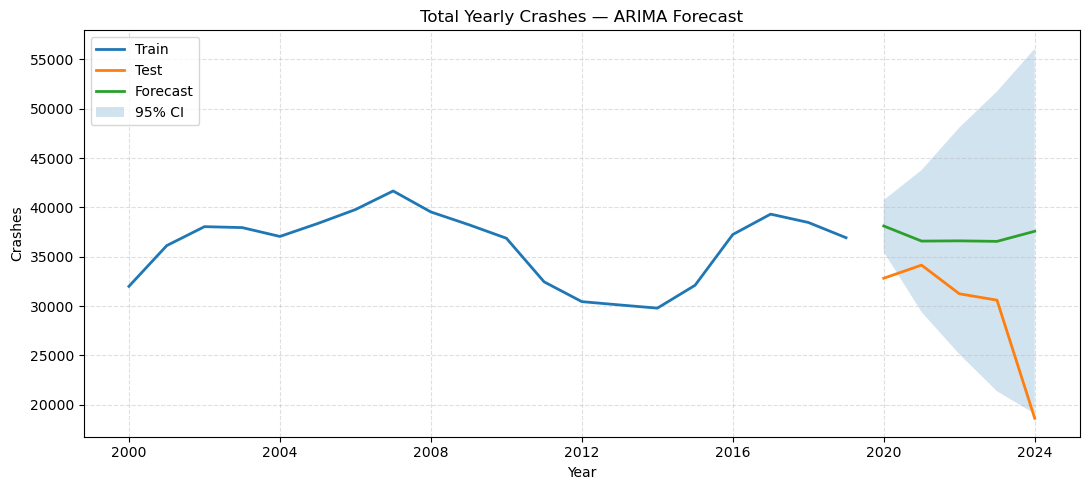

                forecast            lo            hi
2020-01-01  44637.911265  42012.636658  47263.185871
2021-01-01  44995.217610  37801.051762  52189.383458
2022-01-01  45030.751432  33553.621061  56507.881803
2023-01-01  44957.919642  29763.398641  60152.440642
2024-01-01  44848.592796  26351.043745  63346.141848


In [168]:
# ============================
# STEP 1 — TOTAL YEARLY FORECAST
# ============================
# 1) Aggregate totals per year
y_tot = yearly_total_counts(df)

# 2) Optional yearly regressors (holiday intensity)
hol = build_holiday_intensity_yearly(df, HOLIDAY_COL)
yX  = y_tot.join(hol, how="left").fillna(0.0)

# 3) Train / Test split
train, test = train_test_split_yearly(yX, horizon=HORIZON_H, test_start=TEST_START)
y_tr, y_te = train["y"], test["y"]
X_tr = train[["holiday_intensity"]] if "holiday_intensity" in train.columns else None
X_te = test[["holiday_intensity"]]  if X_tr is not None and len(test) else None

# 4) Fit ARIMA (no seasonality for yearly)
res_total, cfg_total, aic_total = grid_search_arima(y_tr, exog=X_tr)
print(f"[Total-Yearly] Best ARIMA order={cfg_total}, AIC={aic_total:.2f}")

# 5) Forecast the test window (or horizon if no test set)
steps_eval = len(y_te) if len(y_te) else HORIZON_H
fc_te_mean, fc_te_ci = forecast_with_ci(res_total, steps=steps_eval, exog_future=X_te)

# Plot
plot_total(y_tr, y_te, fc_te_mean, fc_te_ci, "Total Yearly Crashes — ARIMA Forecast")

# 6) OUT-OF-SAMPLE future forecast (next H years)
future_years = pd.date_range(y_tot.index.max() + pd.offsets.YearBegin(1), periods=HORIZON_H, freq="YS")
X_future = pd.DataFrame({"holiday_intensity": 0.0}, index=future_years) if X_tr is not None else None
fc_future_mean, fc_future_ci = forecast_with_ci(res_total, steps=HORIZON_H, exog_future=X_future)
print(fc_future_mean.to_frame("forecast").join(fc_future_ci).head())


# STEP 2 — Forecast By Severity (Yearly) and Reconcile to Total

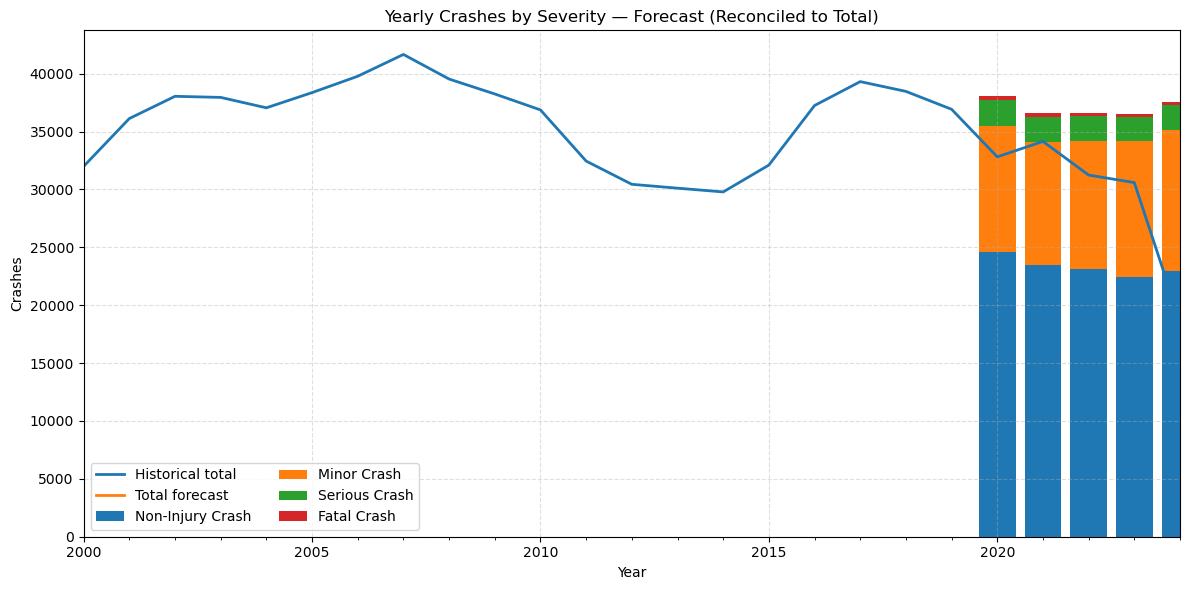

[Severity-Yearly] Future reconciled forecast (head):
            Non-Injury Crash  Minor Crash  Serious Crash  Fatal Crash
2020-01-01               NaN          NaN            NaN          NaN
2021-01-01               NaN          NaN            NaN          NaN
2022-01-01               NaN          NaN            NaN          NaN
2023-01-01               NaN          NaN            NaN          NaN
2024-01-01               NaN          NaN            NaN          NaN


In [169]:
# ============================
# STEP 2 — SEVERITY-LEVEL YEARLY FORECAST (RECONCILED)
# ============================
# 1) Yearly counts by severity (columns = severities)
y_sev = yearly_group_counts(df, SEVERITY_COL)

# Optional: a nice column order if present
sev_order = ["Non-Injury Crash","Minor Crash","Serious Crash","Fatal Crash"]
y_sev = y_sev[[c for c in sev_order if c in y_sev.columns] + [c for c in y_sev.columns if c not in sev_order]]

# Align with total index
y_sev = y_sev.reindex(y_tot.index, fill_value=0)

# 2) Split same as Step 1
train_sev, test_sev = train_test_split_yearly(y_sev, horizon=len(test) if len(test) else HORIZON_H, test_start=TEST_START)

# 3) Fit ARIMA per severity and forecast to test horizon
def fit_forecast_each_column_yearly(mdf_train, mdf_test):
    out = []
    for c in mdf_train.columns:
        ytr = mdf_train[c].astype(float)
        # Guard: if too short or flat, fallback to random-walk with drift (ARIMA(0,1,0) + constant)
        try:
            res, cfg, _ = grid_search_arima(ytr, exog=None)
        except Exception:
            res = SARIMAX(ytr, order=(0,1,0), seasonal_order=(0,0,0,0), trend="t").fit(disp=False)
        yhat, _ = forecast_with_ci(res, steps=len(mdf_test), exog_future=None)
        yhat.name = c
        out.append(yhat)
    return pd.concat(out, axis=1)

sev_fc_test = fit_forecast_each_column_yearly(train_sev, test_sev)

# 4) Reconcile to total test forecast from Step 1
if len(test):
    total_fc_test = fc_te_mean.copy()
    sev_fc_test_rec = proportional_reconcile(sev_fc_test, total_fc_test)
else:
    sev_fc_test_rec = sev_fc_test.copy()

# 5) Plot stacked bars vs total line
plt.figure(figsize=(12,6))
# Historical total
y_sev.sum(axis=1).plot(label="Historical total", linewidth=2)
# Stacked forecast (reconciled)
bottom = np.zeros(len(sev_fc_test_rec))
for c in sev_fc_test_rec.columns:
    plt.bar(sev_fc_test_rec.index, sev_fc_test_rec[c].values, bottom=bottom, label=c)
    bottom += sev_fc_test_rec[c].values
# Overlay total forecast line
plt.plot(fc_te_mean.index, fc_te_mean.values, linewidth=2, label="Total forecast")
plt.title("Yearly Crashes by Severity — Forecast (Reconciled to Total)")
plt.xlabel("Year"); plt.ylabel("Crashes")
plt.legend(ncol=2); plt.grid(True, linestyle="--", alpha=0.4); plt.tight_layout()
plt.show()

# 6) FUTURE (next H years) severity forecast & reconciliation to total FUTURE
sev_fc_future = fit_forecast_each_column_yearly(y_sev, pd.DataFrame(index=future_years, columns=y_sev.columns).fillna(0))
sev_fc_future_rec = proportional_reconcile(sev_fc_future, fc_future_mean)
print("[Severity-Yearly] Future reconciled forecast (head):")
print(sev_fc_future_rec.head())


# STEP 3 — Forecast By Region (Yearly) and Reconcile to Total

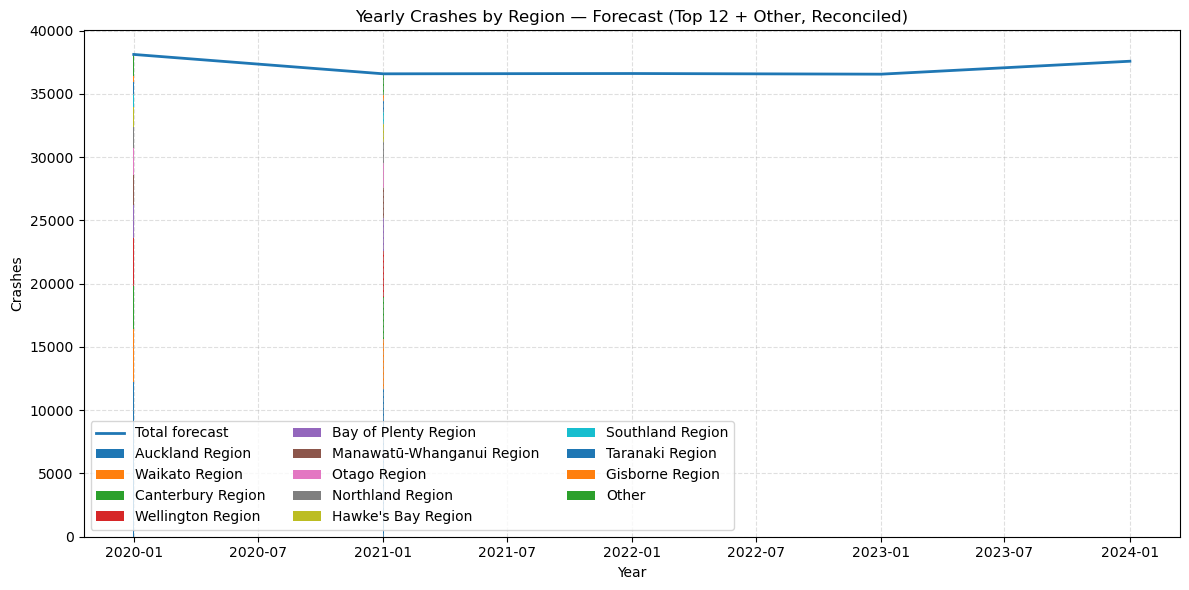

[Region-Yearly] Future reconciled forecast (Top 12+Other) — head:
            Auckland Region  Waikato Region  Canterbury Region  \
2020-01-01              NaN             NaN                NaN   
2021-01-01              NaN             NaN                NaN   
2022-01-01              NaN             NaN                NaN   
2023-01-01              NaN             NaN                NaN   
2024-01-01              NaN             NaN                NaN   

            Wellington Region  Bay of Plenty Region  \
2020-01-01                NaN                   NaN   
2021-01-01                NaN                   NaN   
2022-01-01                NaN                   NaN   
2023-01-01                NaN                   NaN   
2024-01-01                NaN                   NaN   

            Manawatū-Whanganui Region  Otago Region  Northland Region  \
2020-01-01                        NaN           NaN               NaN   
2021-01-01                        NaN           NaN         

In [170]:
# ============================
# STEP 3 — REGION-LEVEL YEARLY FORECAST (RECONCILED)
# ============================
if REGION_COL is None:
    raise ValueError("No region-like column found. Set REGION_COL to your region column name.")

# 1) Yearly counts by region
y_reg = yearly_group_counts(df, REGION_COL).reindex(y_tot.index, fill_value=0)

# 2) Focus on top-K regions by total volume; group rest as 'Other'
volumes = y_reg.sum(axis=0).sort_values(ascending=False)
top_cols = volumes.index[:TOP_K_REGIONS].tolist()
other_cols = [c for c in y_reg.columns if c not in top_cols]

y_reg_top = y_reg[top_cols].copy()
y_reg_top["Other"] = y_reg[other_cols].sum(axis=1) if other_cols else 0

# 3) Split same as Step 1
train_reg, test_reg = train_test_split_yearly(y_reg_top, horizon=len(test) if len(test) else HORIZON_H, test_start=TEST_START)

# 4) Fit ARIMA per region and forecast to test horizon
reg_fc_test = []
for c in y_reg_top.columns:
    ytr = train_reg[c].astype(float)
    try:
        res, cfg, _ = grid_search_arima(ytr, exog=None)
    except Exception:
        res = SARIMAX(ytr, order=(0,1,0), seasonal_order=(0,0,0,0), trend="t").fit(disp=False)
    yhat, _ = forecast_with_ci(res, steps=len(test_reg), exog_future=None)
    yhat.name = c
    reg_fc_test.append(yhat)

reg_fc_test = pd.concat(reg_fc_test, axis=1)

# 5) Reconcile region test forecasts to total test forecast
if len(test):
    reg_fc_test_rec = proportional_reconcile(reg_fc_test, fc_te_mean)
else:
    reg_fc_test_rec = reg_fc_test.copy()

# 6) Plot stacked region forecast vs total
plt.figure(figsize=(12,6))
bottom = np.zeros(len(reg_fc_test_rec))
for c in reg_fc_test_rec.columns:
    plt.bar(reg_fc_test_rec.index, reg_fc_test_rec[c].values, bottom=bottom, label=c)
    bottom += reg_fc_test_rec[c].values
plt.plot(fc_te_mean.index, fc_te_mean.values, linewidth=2, label="Total forecast")
plt.title(f"Yearly Crashes by Region — Forecast (Top {TOP_K_REGIONS} + Other, Reconciled)")
plt.xlabel("Year"); plt.ylabel("Crashes")
plt.legend(ncol=3); plt.grid(True, linestyle="--", alpha=0.4); plt.tight_layout()
plt.show()

# 7) FUTURE (next H years) region forecast & reconciliation
reg_fc_future = []
for c in y_reg_top.columns:
    y_series = y_reg_top[c].astype(float)
    try:
        res, cfg, _ = grid_search_arima(y_series, exog=None)
    except Exception:
        res = SARIMAX(y_series, order=(0,1,0), seasonal_order=(0,0,0,0), trend="t").fit(disp=False)
    fut_mean, _ = forecast_with_ci(res, steps=HORIZON_H, exog_future=None)
    fut_mean.name = c
    reg_fc_future.append(fut_mean)

reg_fc_future = pd.concat(reg_fc_future, axis=1)
reg_fc_future_rec = proportional_reconcile(reg_fc_future, fc_future_mean)
print(f"[Region-Yearly] Future reconciled forecast (Top {TOP_K_REGIONS}+Other) — head:")
print(reg_fc_future_rec.head())


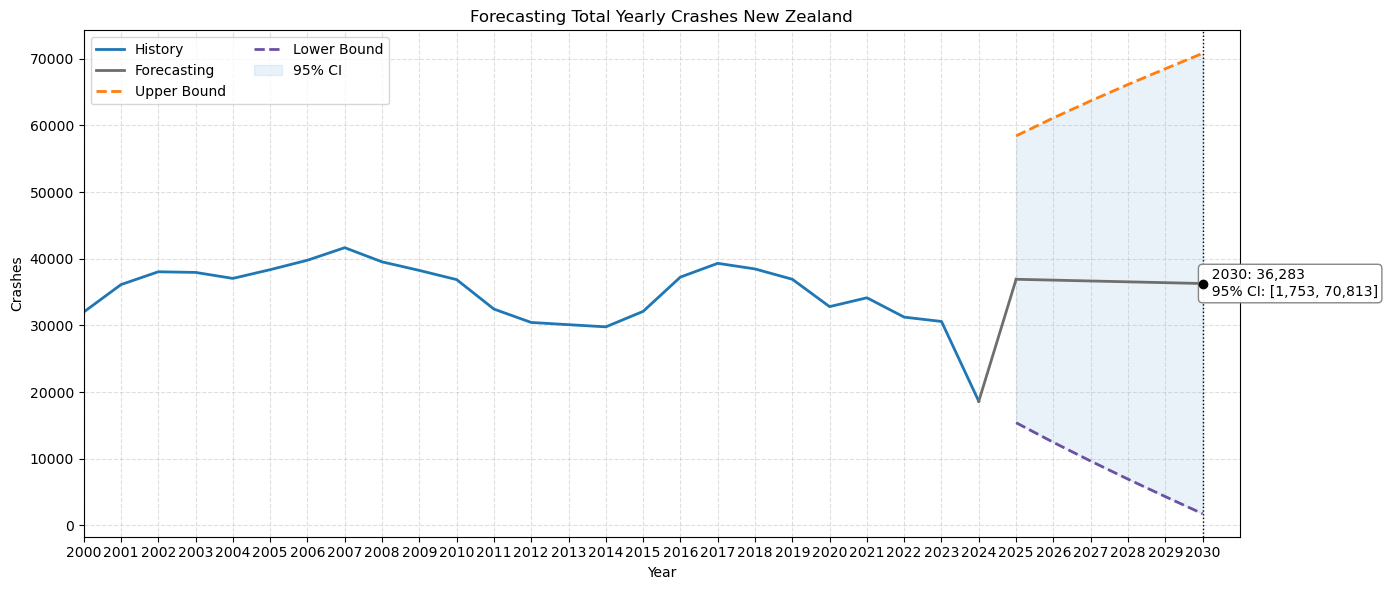

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter

TARGET_YEAR = 2030
START_YEAR  = 2024   # force forecasts to begin at 2024 (or later if data ends after 2023)

def _get_forecast_to_2030(res_total, train_end_ts, yX=None):
    """Forecast from year AFTER train_end_ts through TARGET_YEAR inclusive."""
    future_idx_all = pd.date_range(train_end_ts + pd.offsets.YearBegin(1),
                                   pd.Timestamp(f"{TARGET_YEAR}-01-01"),
                                   freq="YS")
    steps_all = len(future_idx_all)
    if steps_all <= 0:
        return pd.Series(dtype=float), pd.DataFrame(columns=["lo","hi"], dtype=float)

    X_future = None
    if yX is not None and "holiday_intensity" in yX.columns:
        mu = yX["holiday_intensity"].tail(5).mean()
        X_future = pd.DataFrame({"holiday_intensity": mu}, index=future_idx_all)

    pred = res_total.get_forecast(steps=steps_all, exog=X_future)
    mean = pred.predicted_mean
    ci   = pred.conf_int(); ci.columns = ["lo","hi"]
    return mean, ci

def plot_forecast_starting_2024_no_gap(y_tot, y_tr, res_total, yX=None,
                                       start_year=START_YEAR,
                                       title="Forecasting Total Yearly Crashes New Zealand"):
    # Actuals (Series)
    hist = y_tot["y"] if isinstance(y_tot, pd.DataFrame) and "y" in y_tot.columns else y_tot.squeeze()
    hist = hist.sort_index()
    last_actual_year = hist.index.max().year

    # We will *display* forecast from max(start_year, last_actual_year+1)
    disp_start_year = max(start_year, last_actual_year + 1)
    disp_start_ts   = pd.Timestamp(f"{disp_start_year}-01-01")

    # Compute forecasts from (train_end+1) to 2030, then slice to display from disp_start_ts
    train_end_ts = y_tr.index.max()
    fc_mean_all, fc_ci_all = _get_forecast_to_2030(res_total, train_end_ts, yX)

    # Slice display range (ensures NO forecast before 2024 on the plot)
    fc_mean = fc_mean_all.loc[disp_start_ts:]
    fc_ci   = fc_ci_all.loc[disp_start_ts:]

    # Plot
    fig, ax = plt.subplots(figsize=(14,6))

    # 1) History line ends at last actual year (no overlap)
    hist_cut = hist.loc[:pd.Timestamp(f"{disp_start_year-1}-12-31")]
    ax.plot(hist_cut.index, hist_cut.values, color="#1f77b4", linewidth=2, label="History")

    # 2) Forecast mean, bounds, CI — all begin exactly at disp_start_year
    if len(fc_mean):
        ax.plot(fc_mean.index, fc_mean.values, color="#6e6e6e", linewidth=2, label="Forecasting")
        ax.plot(fc_ci.index,   fc_ci["hi"].values, color="#ff7f0e", linestyle="--", linewidth=2, label="Upper Bound")
        ax.plot(fc_ci.index,   fc_ci["lo"].values, color="#6a51a3", linestyle="--", linewidth=2, label="Lower Bound")
        ax.fill_between(fc_ci.index, fc_ci["lo"].values, fc_ci["hi"].values, alpha=0.15, color="#6baed6", label="95% CI")

        # 2a) Smooth bridge: connect last actual point -> first forecast point (single segment)
        last_ts  = hist_cut.index.max()
        last_val = hist_cut.iloc[-1]
        first_fc_ts  = fc_mean.index[0]
        first_fc_val = fc_mean.iloc[0]
        ax.plot([last_ts, first_fc_ts], [last_val, first_fc_val],
                color="#6e6e6e", linewidth=2)

    # 3) 2030 marker & callout
    y2030 = pd.Timestamp("2030-01-01")
    ax.axvline(y2030, color="black", linestyle=":", linewidth=1)
    if len(fc_mean) and y2030 in fc_mean.index:
        m2030  = fc_mean.loc[y2030]
        lo2030 = fc_ci.loc[y2030, "lo"]; hi2030 = fc_ci.loc[y2030, "hi"]
        ax.plot([y2030], [m2030], marker="o", color="black", zorder=5)
        ax.text(y2030, m2030,
                f"  2030: {m2030:,.0f}\n  95% CI: [{lo2030:,.0f}, {hi2030:,.0f}]",
                va="center", ha="left", fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.95))

    # Axes / legend
    ax.set_title(title)
    ax.set_xlabel("Year"); ax.set_ylabel("Crashes")
    ax.xaxis.set_major_locator(YearLocator(base=1))
    ax.xaxis.set_major_formatter(DateFormatter("%Y"))
    ax.set_xlim([hist.index.min(), pd.Timestamp("2030-12-31")])
    ax.grid(True, linestyle="--", alpha=0.4)
    ax.legend(loc="upper left", ncol=2)
    plt.tight_layout()
    plt.show()

# —— call it ——
plot_forecast_starting_2024_no_gap(y_tot, y_tr, res_total, yX, start_year=2024)


In [172]:
# ============================
# EVALUATION PACK (YEARLY)
# ============================
import numpy as np
import pandas as pd

# ---------- helpers ----------
def mae(y, yhat):  return np.mean(np.abs(y - yhat))
def rmse(y, yhat): return np.sqrt(np.mean((y - yhat)**2))
def mape(y, yhat):
    y = np.asarray(y, float); yhat = np.asarray(yhat, float)
    mask = y != 0
    return np.mean(np.abs((yhat[mask]-y[mask]) / y[mask]))*100 if mask.any() else np.nan
def smape(y, yhat):
    y = np.asarray(y, float); yhat = np.asarray(yhat, float)
    denom = (np.abs(y)+np.abs(yhat))/2
    mask = denom != 0
    return np.mean(np.abs(yhat[mask]-y[mask]) / denom[mask]) * 100 if mask.any() else np.nan
def mase(y_train, y_test, yhat_test, m=1):
    # denominator: insample MAE of Naïve_m (yearly => m=1)
    insample_err = np.abs(np.diff(np.asarray(y_train, float), n=m)).mean()
    return np.mean(np.abs(np.asarray(y_test, float) - np.asarray(yhat_test, float))) / insample_err if insample_err>0 else np.nan
def coverage(y, lo, hi):
    y = np.asarray(y, float); lo = np.asarray(lo, float); hi = np.asarray(hi, float)
    return np.mean((y >= lo) & (y <= hi))
def mean_pi_width(lo, hi):
    return np.mean(np.asarray(hi, float) - np.asarray(lo, float))

def eval_series(y_train, y_true, y_pred, lo=None, hi=None, label="series"):
    out = {
        "Series": label,
        "n": int(len(y_true)),
        "MAE": mae(y_true, y_pred),
        "RMSE": rmse(y_true, y_pred),
        "MAPE%": mape(y_true, y_pred),
        "sMAPE%": smape(y_true, y_pred),
        "MASE": mase(y_train, y_true, y_pred, m=1),
    }
    if lo is not None and hi is not None:
        out["PI95_coverage"] = coverage(y_true, lo, hi)
        out["PI95_mean_width"] = mean_pi_width(lo, hi)
    return out

# ---------- STEP 1: TOTAL (test window) ----------
# If you followed the Step-1 code, you should have: y_tr, y_te, res_total, X_te (optional)
# Recreate test forecast if not in memory
try:
    fc_te_mean
    fc_te_ci
except NameError:
    steps_eval = len(y_te)
    X_input = X_te if "X_te" in locals() else None
    _pred = res_total.get_prediction(start=y_te.index[0], end=y_te.index[-1], exog=X_input)
    fc_te_mean = _pred.predicted_mean
    fc_te_ci = _pred.conf_int(); fc_te_ci.columns = ["lo","hi"]

# Compute metrics
total_eval = eval_series(
    y_train=y_tr.values,
    y_true=y_te.values,
    y_pred=fc_te_mean.values,
    lo=fc_te_ci["lo"].values,
    hi=fc_te_ci["hi"].values,
    label="Total (Yearly)"
)
total_eval_df = pd.DataFrame([total_eval]).set_index("Series")
print("=== STEP 1 — TOTAL (Yearly) — Test Metrics ===")
display(total_eval_df.style.format({"MAE": "{:,.2f}", "RMSE": "{:,.2f}", "MAPE%": "{:.2f}", "sMAPE%": "{:.2f}", "MASE": "{:.3f}", "PI95_coverage": "{:.3f}", "PI95_mean_width": "{:,.2f}"}))

# Model info & residual diagnostics
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import jarque_bera

print("\n=== Model Info (Total) ===")
print(f"AIC: {res_total.aic:.2f}   BIC: {res_total.bic:.2f}")

resid = res_total.resid.dropna()
lb = acorr_ljungbox(resid, lags=[10], return_df=True)  # Q(10)
jb_stat, jb_pv = jarque_bera(resid)
diag_df = pd.DataFrame({
    "Ljung-Box Q(10)": [lb["lb_stat"].iloc[0]],
    "LB p-value":      [lb["lb_pvalue"].iloc[0]],
    "Jarque–Bera":     [jb_stat],
    "JB p-value":      [jb_pv]
}, index=["Residuals"])
display(diag_df.style.format("{:.4f}"))

# ---------- STEP 2: SEVERITY (test window, reconciled) ----------
try:
    sev_fc_test_rec
    test_sev
except NameError:
    # rebuild if needed using helpers from your Step-2 cell
    y_sev = yearly_group_counts(df, SEVERITY_COL).reindex(y_tot.index, fill_value=0)
    train_sev, test_sev = train_test_split_yearly(y_sev, horizon=len(y_te), test_start=None)
    def _fit_forecast_each_column_yearly(mdf_train, mdf_test):
        out = []
        for c in mdf_train.columns:
            ytr = mdf_train[c].astype(float)
            try:
                r, cfg, _ = grid_search_arima(ytr, exog=None)
            except Exception:
                r = SARIMAX(ytr, order=(0,1,0), seasonal_order=(0,0,0,0), trend="t").fit(disp=False)
            yhat, _ = forecast_with_ci(r, steps=len(mdf_test))
            yhat.name = c; out.append(yhat)
        return pd.concat(out, axis=1)
    sev_fc_test = _fit_forecast_each_column_yearly(train_sev, test_sev)
    sev_fc_test_rec = proportional_reconcile(sev_fc_test, fc_te_mean)

# per-severity metrics
rows = []
for c in test_sev.columns:
    rows.append(eval_series(y_train=train_sev[c].values, y_true=test_sev[c].values, y_pred=sev_fc_test_rec[c].values, label=c))
sev_eval_df = pd.DataFrame(rows).set_index("Series")

# macro averages + reconciliation check
sev_eval_macro = sev_eval_df.mean(numeric_only=True).to_frame("Macro avg").T
recon_err = (sev_fc_test_rec.sum(axis=1) - fc_te_mean).abs().sum()
print("\n=== STEP 2 — Severity (Yearly) — Test Metrics ===")
display(sev_eval_df.style.format({"MAE": "{:,.2f}", "RMSE": "{:,.2f}", "MAPE%": "{:.2f}", "sMAPE%": "{:.2f}", "MASE": "{:.3f}"}))
print(f"Reconciliation L1 error (sum of severities vs total forecast): {recon_err:,.2f}")
print("\nMacro averages:")
display(sev_eval_macro.style.format({"MAE": "{:,.2f}", "RMSE": "{:,.2f}", "MAPE%": "{:.2f}", "sMAPE%": "{:.2f}", "MASE": "{:.3f}"}))

# ---------- STEP 3: REGION (test window, reconciled) ----------
try:
    reg_fc_test_rec
    test_reg
except NameError:
    if REGION_COL is None:
        print("\n[STEP 3] Skipped: REGION_COL not set.")
    else:
        y_reg = yearly_group_counts(df, REGION_COL).reindex(y_tot.index, fill_value=0)
        volumes = y_reg.sum(axis=0).sort_values(ascending=False)
        top_cols = volumes.index[:TOP_K_REGIONS].tolist()
        other_cols = [c for c in y_reg.columns if c not in top_cols]
        y_reg_top = y_reg[top_cols].copy()
        y_reg_top["Other"] = y_reg[other_cols].sum(axis=1) if other_cols else 0
        train_reg, test_reg = train_test_split_yearly(y_reg_top, horizon=len(y_te), test_start=None)

        reg_fc_test = []
        for c in y_reg_top.columns:
            ytr = train_reg[c].astype(float)
            try:
                r, cfg, _ = grid_search_arima(ytr, exog=None)
            except Exception:
                r = SARIMAX(ytr, order=(0,1,0), seasonal_order=(0,0,0,0), trend="t").fit(disp=False)
            yhat, _ = forecast_with_ci(r, steps=len(test_reg))
            yhat.name = c; reg_fc_test.append(yhat)
        reg_fc_test = pd.concat(reg_fc_test, axis=1)
        reg_fc_test_rec = proportional_reconcile(reg_fc_test, fc_te_mean)

if REGION_COL is not None:
    rows = []
    for c in test_reg.columns:
        rows.append(eval_series(y_train=train_reg[c].values, y_true=test_reg[c].values, y_pred=reg_fc_test_rec[c].values, label=c))
    reg_eval_df = pd.DataFrame(rows).set_index("Series")
    reg_eval_macro = reg_eval_df.mean(numeric_only=True).to_frame("Macro avg").T
    recon_err_r = (reg_fc_test_rec.sum(axis=1) - fc_te_mean).abs().sum()

    print("\n=== STEP 3 — Region (Yearly) — Test Metrics ===")
    display(reg_eval_df.style.format({"MAE": "{:,.2f}", "RMSE": "{:,.2f}", "MAPE%": "{:.2f}", "sMAPE%": "{:.2f}", "MASE": "{:.3f}"}))
    print(f"Reconciliation L1 error (sum of regions vs total forecast): {recon_err_r:,.2f}")
    print("\nMacro averages:")
    display(reg_eval_macro.style.format({"MAE": "{:,.2f}", "RMSE": "{:,.2f}", "MAPE%": "{:.2f}", "sMAPE%": "{:.2f}", "MASE": "{:.3f}"}))


=== STEP 1 — TOTAL (Yearly) — Test Metrics ===


,n,MAE,RMSE,MAPE%,sMAPE%,MASE,PI95_coverage,PI95_mean_width
Series,,,,,,,,
Total (Yearly),5,"7,602.69","9,566.52",32.34,24.57,4.075,0.600,"21,995.46"



=== Model Info (Total) ===
AIC: 253.28   BIC: 257.12


,Ljung-Box Q(10),LB p-value,Jarque–Bera,JB p-value
Residuals,8.6583,0.5648,40.1386,0.0000



=== STEP 2 — Severity (Yearly) — Test Metrics ===


,n,MAE,RMSE,MAPE%,sMAPE%,MASE
Series,,,,,,
Non-Injury Crash,5,"4,490.84","6,873.13",43.35,25.96,3.155
Minor Crash,5,"2,937.23","3,013.03",35.25,29.74,5.955
Serious Crash,5,172.68,218.29,8.86,8.26,1.566
Fatal Crash,5,33.85,37.99,11.47,11.35,1.286


Reconciliation L1 error (sum of severities vs total forecast): 0.00

Macro averages:


,n,MAE,RMSE,MAPE%,sMAPE%,MASE
Macro avg,5.000000,"1,908.65","2,535.61",24.73,18.83,2.991



=== STEP 3 — Region (Yearly) — Test Metrics ===


,n,MAE,RMSE,MAPE%,sMAPE%,MASE
Series,,,,,,
Auckland Region,5,"2,763.24","3,286.58",38.81,28.79,4.112
Waikato Region,5,491.37,792.36,18.17,14.27,1.852
Canterbury Region,5,419.11,636.01,18.02,14.50,1.828
Wellington Region,5,912.93,"1,141.13",45.16,31.25,2.831
Bay of Plenty Region,5,729.07,836.41,44.64,33.12,4.486
Manawatū-Whanganui Region,5,424.14,602.25,26.91,20.42,3.962
Otago Region,5,557.23,606.48,42.55,32.89,4.343
Northland Region,5,266.70,384.90,24.23,18.64,2.449
Hawke's Bay Region,5,229.78,331.89,25.50,19.35,1.956


Reconciliation L1 error (sum of regions vs total forecast): 0.00

Macro averages:


,n,MAE,RMSE,MAPE%,sMAPE%,MASE
Macro avg,5.000000,607.23,759.64,34.06,25.46,3.273


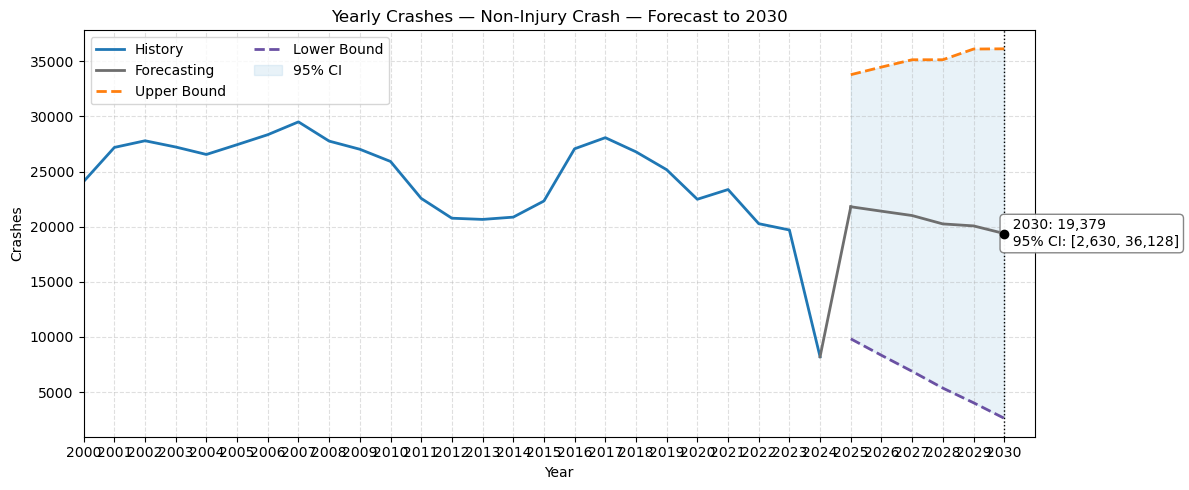

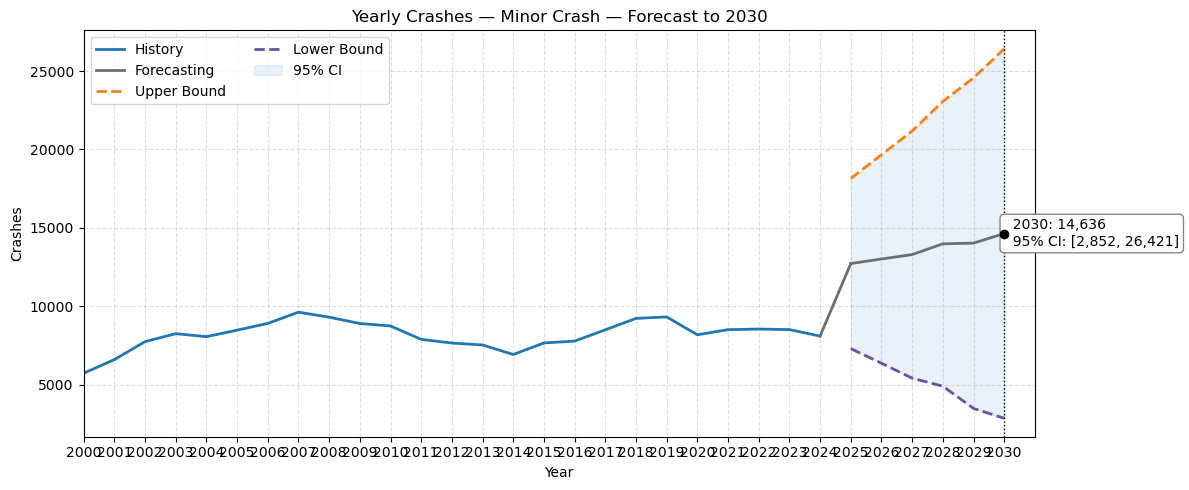

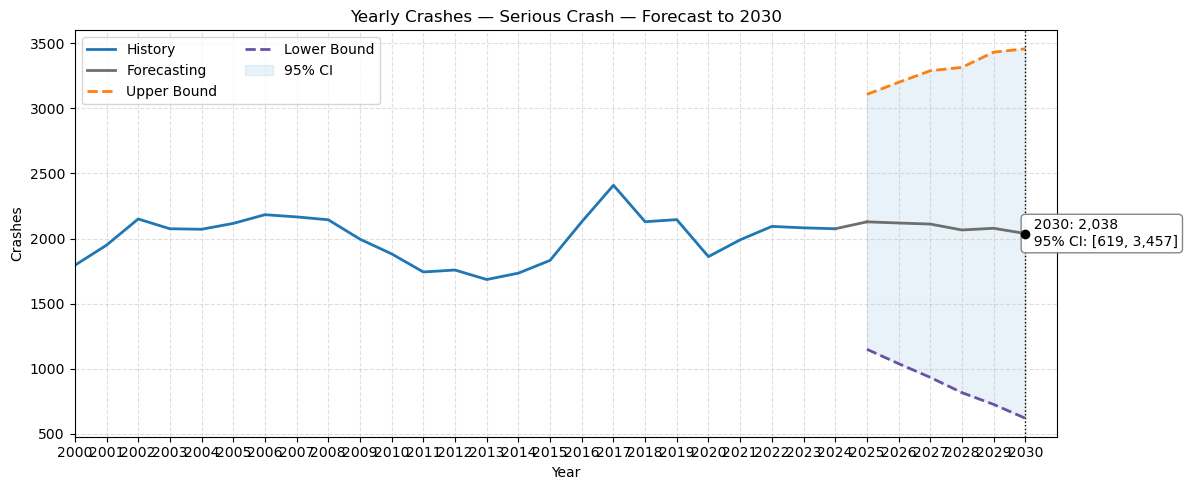

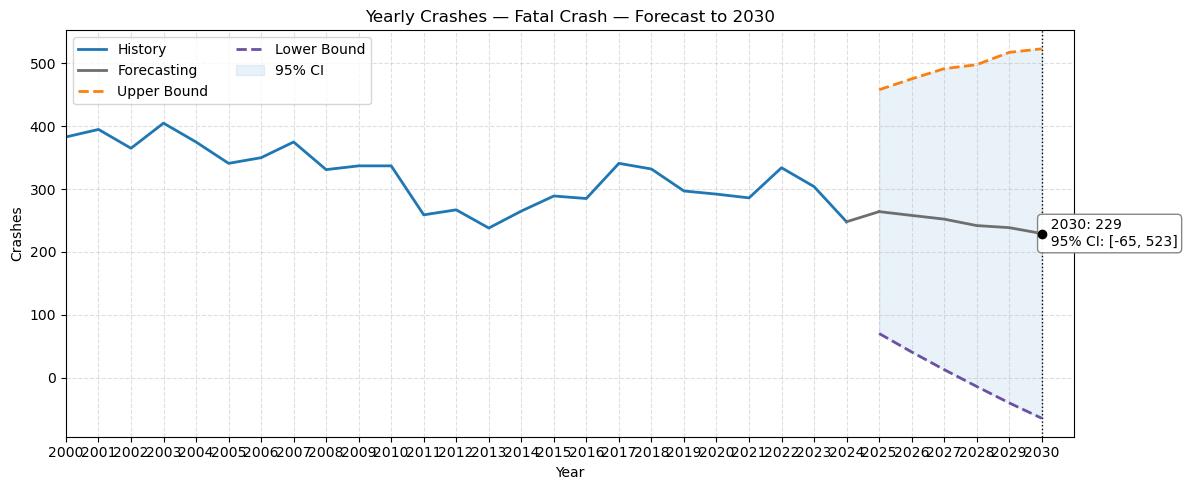

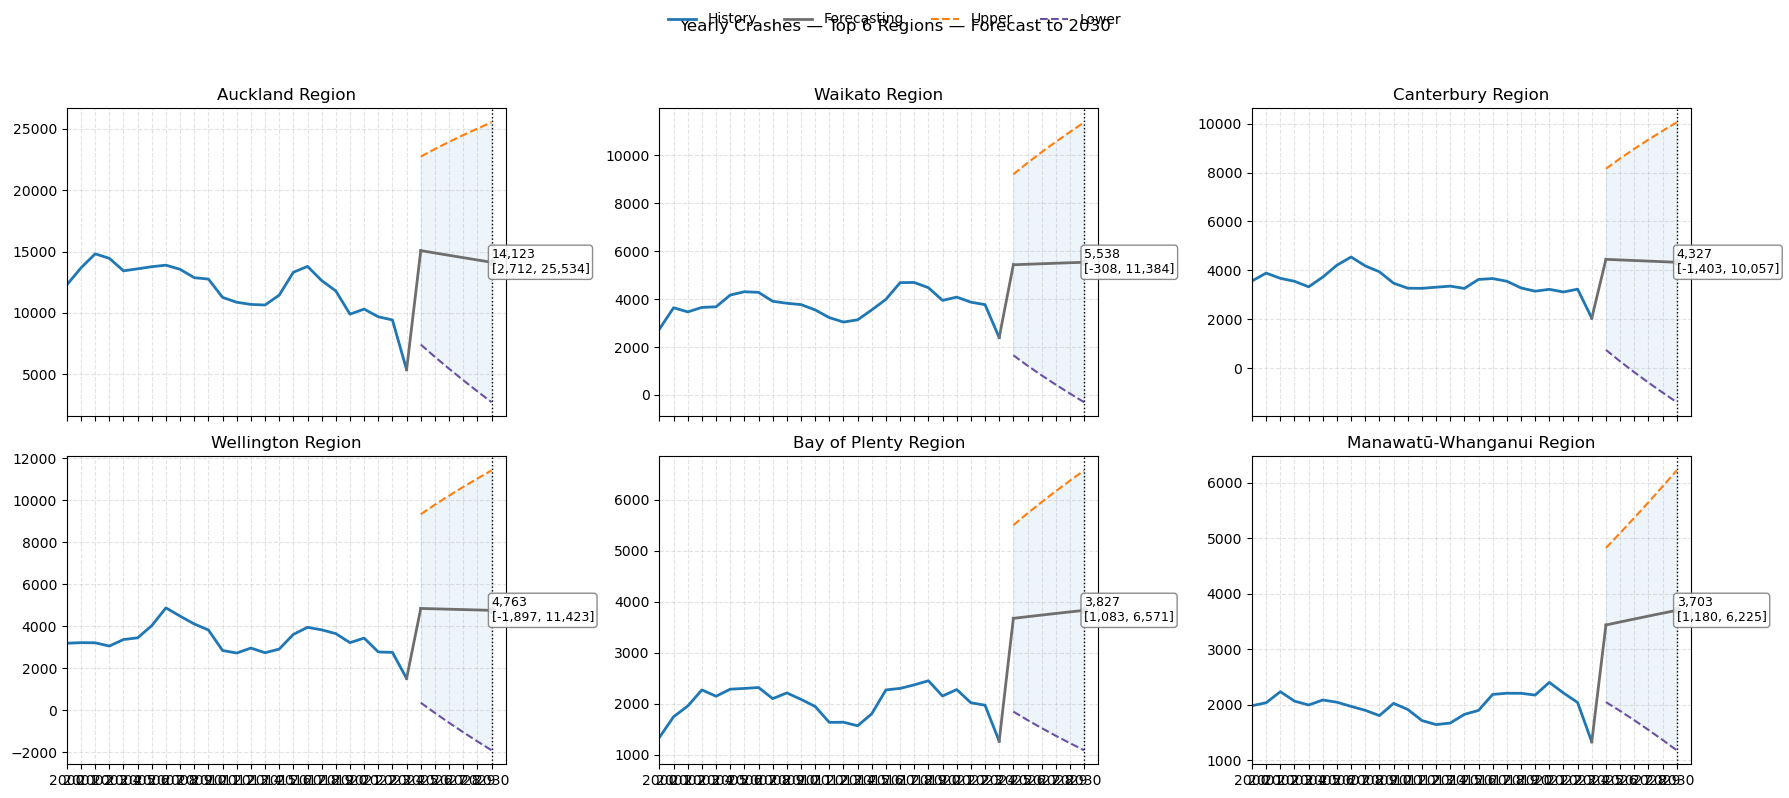

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter
from statsmodels.tsa.statespace.sarimax import SARIMAX

TARGET_YEAR = 2030
FORCE_START_YEAR = 2024
TOP_PLOT_REGIONS = 6  # change as you like

# ---------- small helpers ----------
def _fit_safe_arima(y_train):
    try:
        res, cfg, _ = grid_search_arima(y_train, exog=None)
    except Exception:
        # random walk with (optionally) drift as a stable fallback
        res = SARIMAX(y_train, order=(0,1,0), seasonal_order=(0,0,0,0), trend="t").fit(disp=False)
    return res

def _forecast_to_2030(res, train_end_ts, exog_future=None):
    fut_idx = pd.date_range(train_end_ts + pd.offsets.YearBegin(1),
                            pd.Timestamp(f"{TARGET_YEAR}-01-01"),
                            freq="YS")
    if len(fut_idx) == 0:
        return pd.Series(dtype=float), pd.DataFrame(columns=["lo","hi"], dtype=float)
    pred = res.get_forecast(steps=len(fut_idx), exog=exog_future)
    mean = pred.predicted_mean
    ci   = pred.conf_int(); ci.columns = ["lo","hi"]
    mean.index = fut_idx; ci.index = fut_idx
    return mean, ci

def _reconcile_to_total(children_mean_df, total_mean_series):
    sums = children_mean_df.sum(axis=1).replace(0, np.nan)
    scale = (total_mean_series / sums).fillna(0.0)
    return (children_mean_df.T * scale).T

def _plot_annotated(history_series, fc_mean, fc_ci, start_year, title):
    """History to start_year-1, forecast from start_year; smooth bridge; 2030 annotation."""
    hist = history_series.sort_index()
    disp_start_year = max(start_year, hist.index.max().year + 1)
    disp_start_ts = pd.Timestamp(f"{disp_start_year}-01-01")

    # slice forecast for display
    fc_mean = fc_mean.loc[disp_start_ts:]
    fc_ci   = fc_ci.loc[disp_start_ts:]

    fig, ax = plt.subplots(figsize=(12,5))
    # history up to start-1
    hist_cut = hist.loc[:pd.Timestamp(f"{disp_start_year-1}-12-31")]
    ax.plot(hist_cut.index, hist_cut.values, color="#1f77b4", linewidth=2, label="History")

    if len(fc_mean):
        # forecast lines
        ax.plot(fc_mean.index, fc_mean.values, color="#6e6e6e", linewidth=2, label="Forecasting")
        ax.plot(fc_ci.index, fc_ci["hi"].values, color="#ff7f0e", linestyle="--", linewidth=2, label="Upper Bound")
        ax.plot(fc_ci.index, fc_ci["lo"].values, color="#6a51a3", linestyle="--", linewidth=2, label="Lower Bound")
        # CI fill only on forecast span
        ax.fill_between(fc_ci.index, fc_ci["lo"].values, fc_ci["hi"].values, alpha=0.15, color="#6baed6", label="95% CI")
        # smooth bridge
        last_ts, last_val = hist_cut.index.max(), hist_cut.iloc[-1]
        first_ts, first_val = fc_mean.index[0], fc_mean.iloc[0]
        ax.plot([last_ts, first_ts], [last_val, first_val], color="#6e6e6e", linewidth=2)

    # 2030 marker + callout
    y2030 = pd.Timestamp("2030-01-01")
    ax.axvline(y2030, color="black", linestyle=":", linewidth=1)
    if len(fc_mean) and y2030 in fc_mean.index:
        m2030 = fc_mean.loc[y2030]; lo2030 = fc_ci.loc[y2030, "lo"]; hi2030 = fc_ci.loc[y2030, "hi"]
        ax.plot([y2030], [m2030], marker="o", color="black", zorder=5)
        ax.text(y2030, m2030, f"  2030: {m2030:,.0f}\n  95% CI: [{lo2030:,.0f}, {hi2030:,.0f}]",
                va="center", ha="left", fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.95))

    ax.set_title(title)
    ax.set_xlabel("Year"); ax.set_ylabel("Crashes")
    ax.xaxis.set_major_locator(YearLocator(base=1))
    ax.xaxis.set_major_formatter(DateFormatter("%Y"))
    ax.set_xlim([hist.index.min(), pd.Timestamp("2030-12-31")])
    ax.grid(True, linestyle="--", alpha=0.4)
    ax.legend(loc="upper left", ncol=2)
    plt.tight_layout()
    plt.show()

# ---------- TOTAL future (needed for reconciliation factors) ----------
# build future exog if total model used holiday_intensity
X_future_total = None
if 'yX' in globals() and isinstance(yX, pd.DataFrame) and "holiday_intensity" in yX.columns:
    mu = yX["holiday_intensity"].tail(5).mean()
    fut_total_idx = pd.date_range(y_tr.index.max() + pd.offsets.YearBegin(1),
                                  pd.Timestamp(f"{TARGET_YEAR}-01-01"), freq="YS")
    X_future_total = pd.DataFrame({"holiday_intensity": mu}, index=fut_total_idx)

total_mean_future, total_ci_future = _forecast_to_2030(res_total, y_tr.index.max(), exog_future=X_future_total)

# ============================================================
# A) SEVERITY — one chart per severity (reconciled to total)
# ============================================================
# Build yearly counts if not present
if 'y_sev' not in globals():
    y_sev = yearly_group_counts(df, SEVERITY_COL).reindex(y_tot.index, fill_value=0)
# nice order if available
sev_order = ["Non-Injury Crash","Minor Crash","Serious Crash","Fatal Crash"]
y_sev = y_sev[[c for c in sev_order if c in y_sev.columns] + [c for c in y_sev.columns if c not in sev_order]]

# Forecast each severity to 2030 from the shared train end (y_tr end)
sev_means = []; sev_los = []; sev_his = []
for c in y_sev.columns:
    y_series = y_sev[c].astype(float)
    y_train  = y_series.loc[:y_tr.index.max()]
    res = _fit_safe_arima(y_train)
    mean, ci = _forecast_to_2030(res, y_tr.index.max(), exog_future=None)
    mean.name = c
    sev_means.append(mean)
    sev_los.append(ci["lo"].rename(c))
    sev_his.append(ci["hi"].rename(c))

sev_mean_df = pd.concat(sev_means, axis=1)
sev_lo_df   = pd.concat(sev_los, axis=1)
sev_hi_df   = pd.concat(sev_his, axis=1)

# Reconcile to total (scale means AND bounds per year)
scale = (total_mean_future / sev_mean_df.sum(axis=1).replace(0, np.nan)).fillna(0.0)
sev_mean_rec = (sev_mean_df.T * scale).T
sev_lo_rec   = (sev_lo_df.T   * scale).T
sev_hi_rec   = (sev_hi_df.T   * scale).T

# Plot each severity
for c in y_sev.columns:
    _plot_annotated(
        history_series=y_sev[c],
        fc_mean=sev_mean_rec[c],
        fc_ci=pd.concat([sev_lo_rec[c], sev_hi_rec[c]], axis=1, keys=["lo","hi"]),
        start_year=FORCE_START_YEAR,
        title=f"Yearly Crashes — {c} — Forecast to 2030"
    )

# ============================================================
# B) REGION — top-N regions (reconciled to total)
# ============================================================
if 'REGION_COL' in globals() and REGION_COL is not None:
    y_reg = yearly_group_counts(df, REGION_COL).reindex(y_tot.index, fill_value=0)
    # top regions by volume
    top_cols = y_reg.sum(axis=0).sort_values(ascending=False).index[:TOP_PLOT_REGIONS].tolist()
    y_reg_topplot = y_reg[top_cols].copy()

    # Forecast each top region to 2030 from the shared train end
    reg_means = []; reg_los = []; reg_his = []
    for c in y_reg_topplot.columns:
        s = y_reg_topplot[c].astype(float)
        s_tr = s.loc[:y_tr.index.max()]
        res = _fit_safe_arima(s_tr)
        mean, ci = _forecast_to_2030(res, y_tr.index.max(), exog_future=None)
        mean.name = c
        reg_means.append(mean)
        reg_los.append(ci["lo"].rename(c))
        reg_his.append(ci["hi"].rename(c))
    reg_mean_df = pd.concat(reg_means, axis=1)
    reg_lo_df   = pd.concat(reg_los,   axis=1)
    reg_hi_df   = pd.concat(reg_his,   axis=1)

    # Reconcile to total (only across the plotted regions; note: “Other” not shown here)
    scale_r = (total_mean_future / reg_mean_df.sum(axis=1).replace(0, np.nan)).fillna(0.0)
    reg_mean_rec = (reg_mean_df.T * scale_r).T
    reg_lo_rec   = (reg_lo_df.T   * scale_r).T
    reg_hi_rec   = (reg_hi_df.T   * scale_r).T

    # Plot each region (grid)
    n = len(y_reg_topplot.columns)
    cols = 3
    rows = int(np.ceil(n/cols))
    fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 4*rows), sharex=True, sharey=False)
    axes = np.array(axes).reshape(rows, cols)

    for i, c in enumerate(y_reg_topplot.columns):
        ax = axes.flat[i]
        # reuse plotting logic inline for grid
        hist = y_reg_topplot[c].sort_index()
        disp_start_year = max(FORCE_START_YEAR, hist.index.max().year + 1)
        disp_start_ts = pd.Timestamp(f"{disp_start_year}-01-01")
        fc_m = reg_mean_rec[c].loc[disp_start_ts:]
        fc_ci = pd.concat([reg_lo_rec[c], reg_hi_rec[c]], axis=1, keys=["lo","hi"]).loc[disp_start_ts:]
        hist_cut = hist.loc[:pd.Timestamp(f"{disp_start_year-1}-12-31")]

        ax.plot(hist_cut.index, hist_cut.values, color="#1f77b4", linewidth=2, label="History")
        if len(fc_m):
            ax.plot(fc_m.index, fc_m.values, color="#6e6e6e", linewidth=2, label="Forecasting")
            ax.plot(fc_ci.index, fc_ci["hi"].values, color="#ff7f0e", linestyle="--", linewidth=1.5, label="Upper")
            ax.plot(fc_ci.index, fc_ci["lo"].values, color="#6a51a3", linestyle="--", linewidth=1.5, label="Lower")
            ax.fill_between(fc_ci.index, fc_ci["lo"].values, fc_ci["hi"].values, alpha=0.12, color="#6baed6")
            # bridge
            if len(hist_cut):
                ax.plot([hist_cut.index.max(), fc_m.index[0]], [hist_cut.iloc[-1], fc_m.iloc[0]],
                        color="#6e6e6e", linewidth=2)

        # 2030 marker + callout
        y2030 = pd.Timestamp("2030-01-01")
        ax.axvline(y2030, color="black", linestyle=":", linewidth=1)
        if len(fc_m) and y2030 in fc_m.index:
            m2030 = fc_m.loc[y2030]
            lo2030 = fc_ci.loc[y2030, "lo"]; hi2030 = fc_ci.loc[y2030, "hi"]
            ax.plot([y2030], [m2030], marker="o", color="black", markersize=4)
            ax.text(y2030, m2030, f"{int(m2030):,}\n[{int(lo2030):,}, {int(hi2030):,}]",
                    va="center", ha="left", fontsize=9,
                    bbox=dict(boxstyle="round,pad=0.25", fc="white", ec="gray", alpha=0.9))

        ax.set_title(c)
        ax.grid(True, linestyle="--", alpha=0.35)
        ax.xaxis.set_major_locator(YearLocator(base=1))
        ax.xaxis.set_major_formatter(DateFormatter("%Y"))
        ax.set_xlim([hist.index.min(), pd.Timestamp("2030-12-31")])

    # tidy legends & empty cells
    for j in range(i+1, rows*cols):
        fig.delaxes(axes.flat[j])
    handles, labels = axes.flat[0].get_legend_handles_labels()
    fig.legend(handles[:4], labels[:4], loc="upper center", ncol=4, frameon=False)
    fig.suptitle(f"Yearly Crashes — Top {n} Regions — Forecast to 2030", y=0.98)
    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()
else:
    print("[Skip] REGION_COL not available; set REGION_COL to your region column to plot region forecasts.")


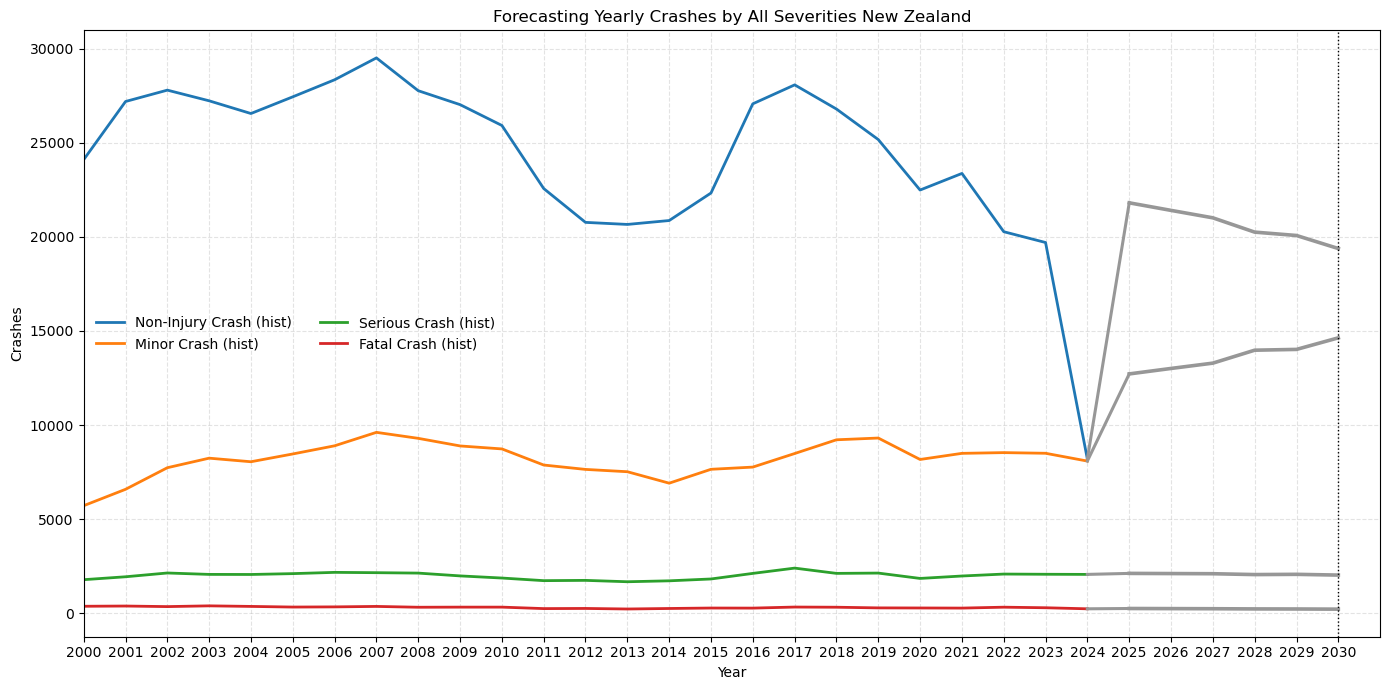

In [174]:
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter
from matplotlib.lines import Line2D
import pandas as pd

TARGET_YEAR = 2030
FORCE_START_YEAR = 2024
FORECAST_COLOR = "#979797"   # single color for all forecast lines

# ---------- All Severities (single forecast color) ----------
def plot_all_severities_single_fc(y_sev, sev_mean_rec,
                                  start_year=FORCE_START_YEAR,
                                  fc_color=FORECAST_COLOR,
                                  title="Forecasting Yearly Crashes by All Severities New Zealand"):
    cols = list(y_sev.columns)
    n = len(cols)
    # palette for history lines
    cmap = plt.cm.get_cmap("tab10", max(n, 10))
    hist_colors = [cmap(i % 10) for i in range(n)]

    disp_start_year = max(start_year, y_sev.index.max().year + 1)
    disp_start_ts = pd.Timestamp(f"{disp_start_year}-01-01")

    fig, ax = plt.subplots(figsize=(14,7))

    for i, c in enumerate(cols):
        h = y_sev[c].sort_index()
        h_cut = h.loc[:pd.Timestamp(f"{disp_start_year-1}-12-31")]
        if len(h_cut):
            ax.plot(h_cut.index, h_cut.values, color=hist_colors[i], linewidth=2, label=f"{c} (hist)")

        fc = sev_mean_rec[c].sort_index().loc[disp_start_ts:]
        if len(fc):
            ax.plot(fc.index, fc.values, color=fc_color, linewidth=2.6)  # one color for all forecasts
            # smooth bridge (same forecast color)
            if len(h_cut):
                ax.plot([h_cut.index.max(), fc.index[0]], [h_cut.iloc[-1], fc.iloc[0]],
                        color=fc_color, linewidth=2.2)

    # 2030 marker
    ax.axvline(pd.Timestamp("2030-01-01"), color="black", linestyle=":", linewidth=1)

    # Legend: series (hist) + one generic forecast handle
    handles, labels = ax.get_legend_handles_labels()
    fc_handle = Line2D([0],[0], color=fc_color, lw=2.6, label="Forecast (all series)")
    handles.append(fc_handle); labels.append("Forecast (all series)")

    ax.set_title(title)
    ax.set_xlabel("Year"); ax.set_ylabel("Crashes")
    ax.xaxis.set_major_locator(YearLocator(base=1))
    ax.xaxis.set_major_formatter(DateFormatter("%Y"))
    ax.set_xlim([y_sev.index.min(), pd.Timestamp(f"{TARGET_YEAR}-12-31")])
    ax.grid(True, linestyle="--", alpha=0.35)
    ax.legend(ncol=2, frameon=False)
    plt.tight_layout()
    plt.show()


# --- Call them ---
plot_all_severities_single_fc(y_sev, sev_mean_rec)



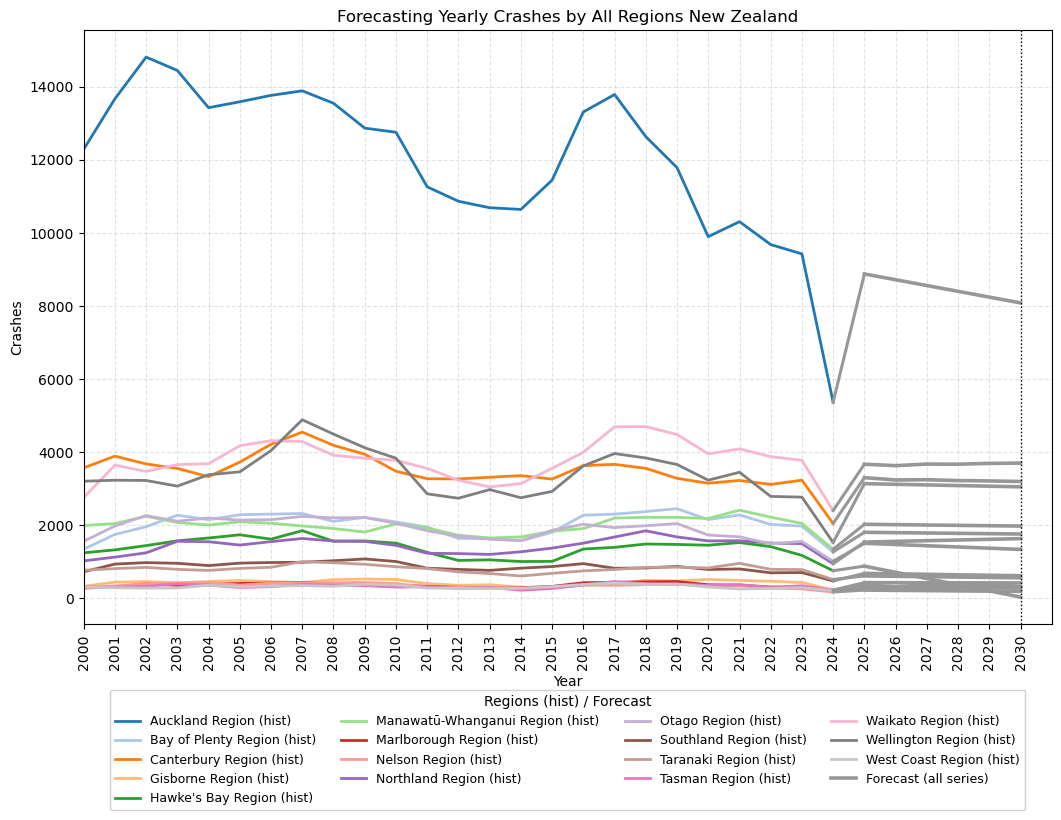

In [178]:
# ---- REPAIR: make sure we have forecasts for ALL regions in y_reg ----
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# OPTIONAL: if your forecasts were built for TAs/Districts, map them to Regions here:
RENAME_MAP = {
    # "Gisborne District": "Gisborne Region",
    # "Auckland": "Auckland Region",
    # add more if needed...
}

TARGET_YEAR = 2030
FORCE_START_YEAR = 2024

# 0) Ensure y_reg exists (yearly counts by Region)
if 'y_reg' not in globals():
    y_reg = yearly_group_counts(df, REGION_COL).reindex(y_tot.index, fill_value=0)

# 1) Build a full future index starting at the displayed forecast start
train_end_year = min(FORCE_START_YEAR - 1, y_reg.index.max().year)
train_end_ts   = pd.Timestamp(f"{train_end_year}-01-01")
fut_idx = pd.date_range(pd.Timestamp(f"{train_end_year+1}-01-01"),
                        pd.Timestamp(f"{TARGET_YEAR}-01-01"), freq="YS")

# 2) Tiny ARIMA helper
def _fit_best_arima(y):
    try:
        res, cfg, _ = grid_search_arima(y)
    except Exception:
        # fallback to RW with drift
        res = SARIMAX(y, order=(0,1,0), seasonal_order=(0,0,0,0), trend="t").fit(disp=False)
    return res

# 3) Forecast every region in y_reg
fc_cols = {}
for col in y_reg.columns:
    ytr = y_reg[col].loc[:train_end_ts].astype(float)
    if ytr.dropna().sum() == 0 or len(ytr.dropna()) < 3:
        # too short or empty -> naïve hold
        last_val = float(ytr.dropna().iloc[-1]) if len(ytr.dropna()) else 0.0
        fc_cols[col] = pd.Series(last_val, index=fut_idx)
        continue
    res = _fit_best_arima(ytr)
    pred = res.get_forecast(steps=len(fut_idx))
    m    = pred.predicted_mean
    m.index = fut_idx
    fc_cols[col] = m

reg_mean_rec_full = pd.DataFrame(fc_cols).sort_index()

# 4) Apply optional rename map so forecast columns match history names
if RENAME_MAP:
    reg_mean_rec_full = reg_mean_rec_full.rename(columns=RENAME_MAP)

# 5) If any region is still missing, fill with a flat hold of last observed value
missing = [c for c in y_reg.columns if c not in reg_mean_rec_full.columns]
if missing:
    for c in missing:
        last_val = float(y_reg[c].loc[:train_end_ts].dropna().iloc[-1]) if len(y_reg[c].dropna()) else 0.0
        reg_mean_rec_full[c] = pd.Series(last_val, index=fut_idx)

# 6) Keep only columns present in history (to avoid stray forecast-only names)
reg_mean_rec_full = reg_mean_rec_full[y_reg.columns]

# 7) Re-run your plot with the complete forecast matrix
plot_all_regions_single_fc_legend_OUTSIDE(y_reg, reg_mean_rec_full)


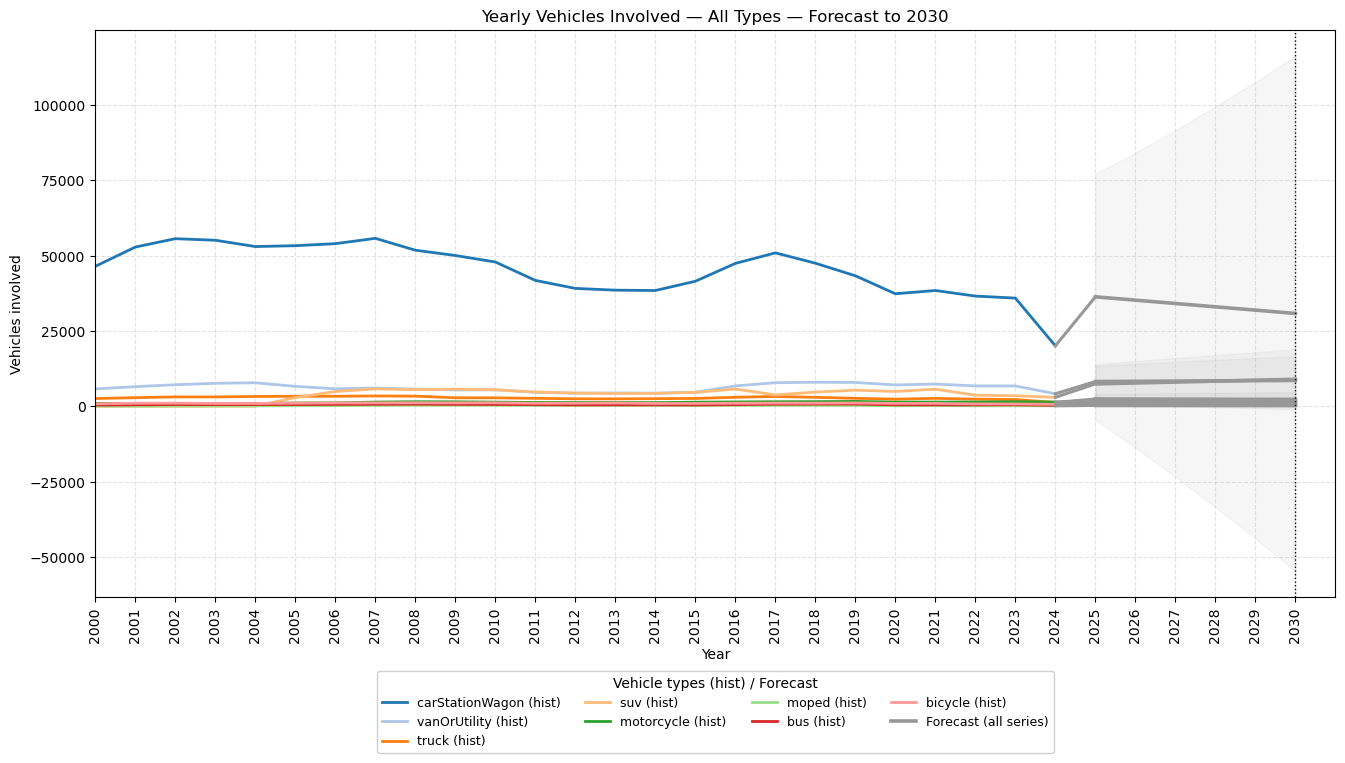

In [179]:
# ================================
# VEHICLE-TYPE FORECASTS (YEARLY)
# ================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter
from matplotlib.lines import Line2D
from statsmodels.tsa.statespace.sarimax import SARIMAX

TARGET_YEAR = 2030
FORCE_START_YEAR = 2024
FORECAST_COLOR = "#979797"   # single color for all forecast lines

# 1) Choose the vehicle columns you want to model (we pick what's available)
CANDIDATE_VEH_COLS = [
    "carStationWagon", "vanOrUtility", "truck", "suv",
    "motorcycle", "moped", "bus", "bicycle"
]
VEHICLE_COLS = [c for c in CANDIDATE_VEH_COLS if c in df.columns]
assert len(VEHICLE_COLS) > 0, "No vehicle columns from CANDIDATE_VEH_COLS found in df."

# 2) Build yearly counts per vehicle type (aligned to your total timeline)
def _yearly_vehicle_counts(df, date_index, veh_cols):
    # Try to infer the date column from your earlier pipeline
    # If you already know it (e.g., DATE_COL), you can replace this with df.groupby(pd.Grouper(key=DATE_COL, freq="YS")).sum()
    if isinstance(date_index, pd.DatetimeIndex):
        # build a copy with the index as a datetime column to group by year
        if df.index.equals(date_index):
            g = df.copy()
        else:
            # best effort: if you already have a datetime column used for y_tot, reindex with it
            g = df.copy()
            # If your df doesn't have a datetime index, you must set DATE_COL before calling this.
        # group by year start using y_tot index to align afterwards
        # Fallback: if df isn't indexed by datetime, this will error. Then set DATE_COL explicitly above.
    # Safer: require a DATE_COL if not already set by your earlier code
    # If you had DATE_COL earlier, uncomment and replace:
    # g = df.set_index(DATE_COL)

    # If your df already has a datetime index, this just works:
    if not isinstance(df.index, pd.DatetimeIndex):
        # If no datetime index, try to reuse y_tot's index mapping (coarse approach):
        # Create an interim DATE_COL by merging on crashYear if present
        if "crashYear" in df.columns:
            tmp = df.copy()
            # build a YearStart timestamp from crashYear
            tmp["_year_ts"] = pd.to_datetime(tmp["crashYear"].astype(int), format="%Y").values.astype("datetime64[Y]")
            tmp["_year_ts"] = pd.to_datetime(tmp["_year_ts"])  # ensure Timestamp
            grp = tmp.groupby(pd.Grouper(key="_year_ts", freq="YS"))[veh_cols].sum()
        else:
            raise ValueError("DataFrame must have a datetime index or a 'crashYear' column to aggregate yearly vehicle counts.")
    else:
        grp = df.groupby(pd.Grouper(freq="YS"))[veh_cols].sum()

    # align to the total timeline (y_tot.index) to keep gaps filled
    grp = grp.reindex(date_index, fill_value=0).astype(float)
    return grp

y_veh = _yearly_vehicle_counts(df, y_tot.index, VEHICLE_COLS)

# 3) Fit & forecast helpers
def _fit_safe_arima(y_train):
    try:
        res, cfg, _ = grid_search_arima(y_train, exog=None)
    except Exception:
        res = SARIMAX(y_train, order=(0,1,0), seasonal_order=(0,0,0,0), trend="t").fit(disp=False)
    return res

def _forecast_to_2030(res, train_end_ts):
    fut_idx = pd.date_range(train_end_ts + pd.offsets.YearBegin(1),
                            pd.Timestamp(f"{TARGET_YEAR}-01-01"), freq="YS")
    if len(fut_idx) == 0:
        return pd.Series(dtype=float), pd.DataFrame(columns=["lo","hi"], dtype=float)
    pred = res.get_forecast(steps=len(fut_idx))
    mean = pred.predicted_mean
    ci   = pred.conf_int(); ci.columns = ["lo","hi"]
    mean.index = fut_idx; ci.index = fut_idx
    return mean, ci

# 4) Fit each vehicle series on the train range and forecast to 2030
veh_mean_all, veh_lo_all, veh_hi_all = [], [], []
for col in y_veh.columns:
    s = y_veh[col].astype(float)
    s_tr = s.loc[:y_tr.index.max()]
    res = _fit_safe_arima(s_tr)
    m, ci = _forecast_to_2030(res, y_tr.index.max())
    veh_mean_all.append(m.rename(col))
    veh_lo_all.append(ci["lo"].rename(col))
    veh_hi_all.append(ci["hi"].rename(col))

veh_mean_df = pd.concat(veh_mean_all, axis=1)
veh_lo_df   = pd.concat(veh_lo_all,   axis=1)
veh_hi_df   = pd.concat(veh_hi_all,   axis=1)

# 5) Plot ALL vehicle types in one chart (single forecast color, bridge, legend outside, vertical years)
def plot_all_vehicles_single_fc(y_veh, mean_df, lo_df=None, hi_df=None,
                                start_year=FORCE_START_YEAR,
                                fc_color=FORECAST_COLOR,
                                title="Yearly Vehicles Involved — All Types — Forecast to 2030"):
    cols = list(y_veh.columns)
    n    = len(cols)
    cmap = plt.cm.get_cmap("tab20", max(n, 20))
    hist_colors = [cmap(i % 20) for i in range(n)]

    disp_start_year = max(start_year, y_veh.index.max().year + 1)
    disp_start_ts   = pd.Timestamp(f"{disp_start_year}-01-01")

    fig, ax = plt.subplots(figsize=(16,9))

    for i, c in enumerate(cols):
        h = y_veh[c].sort_index()
        h_cut = h.loc[:pd.Timestamp(f"{disp_start_year-1}-12-31")]
        if len(h_cut):
            ax.plot(h_cut.index, h_cut.values, color=hist_colors[i], linewidth=2, label=f"{c} (hist)")

        fc = mean_df[c].sort_index().loc[disp_start_ts:]
        if len(fc):
            ax.plot(fc.index, fc.values, color=fc_color, linewidth=2.6)  # one color for all forecasts
            if len(h_cut):
                ax.plot([h_cut.index.max(), fc.index[0]], [h_cut.iloc[-1], fc.iloc[0]],
                        color=fc_color, linewidth=2.2)
            if (lo_df is not None) and (hi_df is not None):
                ax.fill_between(fc.index, lo_df[c].loc[disp_start_ts:].values, hi_df[c].loc[disp_start_ts:].values,
                                alpha=0.08, color=fc_color)

    # 2030 marker
    ax.axvline(pd.Timestamp("2030-01-01"), color="black", linestyle=":", linewidth=1)

    # axes/legend cosmetics
    ax.set_title(title)
    ax.set_xlabel("Year"); ax.set_ylabel("Vehicles involved")
    ax.xaxis.set_major_locator(YearLocator(base=1))
    ax.xaxis.set_major_formatter(DateFormatter("%Y"))
    ax.set_xlim([y_veh.index.min(), pd.Timestamp("2030-12-31")])
    ax.grid(True, linestyle="--", alpha=0.35)

    # Legend below (outside)
    handles, labels = ax.get_legend_handles_labels()
    fc_handle = Line2D([0],[0], color=FORECAST_COLOR, lw=2.6, label="Forecast (all series)")
    leg = ax.legend(handles + [fc_handle],
                    labels + ["Forecast (all series)"],
                    loc="upper center",
                    bbox_to_anchor=(0.5, -0.12), bbox_transform=ax.transAxes,
                    ncol=4, frameon=True, framealpha=0.92,
                    title="Vehicle types (hist) / Forecast", fontsize=9)

    # Rotate year labels vertically & add bottom room for legend
    for lbl in ax.get_xticklabels():
        lbl.set_rotation(90); lbl.set_ha("center"); lbl.set_va("top")
    plt.subplots_adjust(bottom=0.25)

    plt.show()

# === plot ===
plot_all_vehicles_single_fc(y_veh, veh_mean_df, veh_lo_df, veh_hi_df)


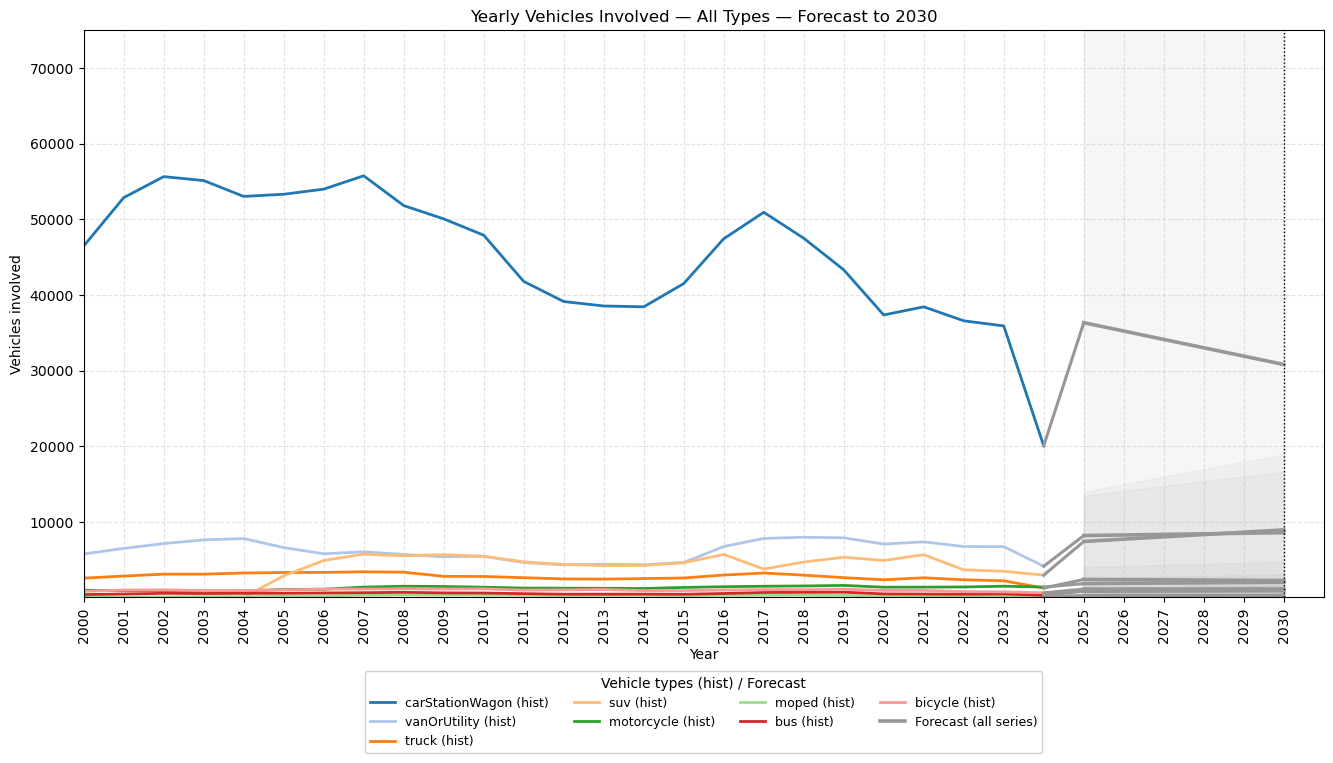

In [180]:
# ================================
# VEHICLE-TYPE FORECASTS (YEARLY)
# ================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter
from matplotlib.lines import Line2D
from statsmodels.tsa.statespace.sarimax import SARIMAX

TARGET_YEAR = 2030
FORCE_START_YEAR = 2024
FORECAST_COLOR = "#979797"   # single color for all forecast lines

# >>> y-axis bounds (requested)
Y_MIN = 100        # cannot be zero
Y_MAX = 75000      # “max 75000 is enough”

# 1) Choose the vehicle columns you want to model (we pick what's available)
CANDIDATE_VEH_COLS = [
    "carStationWagon", "vanOrUtility", "truck", "suv",
    "motorcycle", "moped", "bus", "bicycle"
]
VEHICLE_COLS = [c for c in CANDIDATE_VEH_COLS if c in df.columns]
assert len(VEHICLE_COLS) > 0, "No vehicle columns from CANDIDATE_VEH_COLS found in df."

# 2) Build yearly counts per vehicle type (aligned to your total timeline)
def _yearly_vehicle_counts(df, date_index, veh_cols):
    if not isinstance(df.index, pd.DatetimeIndex):
        if "crashYear" in df.columns:
            tmp = df.copy()
            tmp["_year_ts"] = pd.to_datetime(tmp["crashYear"].astype(int), format="%Y").values.astype("datetime64[Y]")
            tmp["_year_ts"] = pd.to_datetime(tmp["_year_ts"])
            grp = tmp.groupby(pd.Grouper(key="_year_ts", freq="YS"))[veh_cols].sum()
        else:
            raise ValueError("DataFrame must have a datetime index or a 'crashYear' column to aggregate yearly vehicle counts.")
    else:
        grp = df.groupby(pd.Grouper(freq="YS"))[veh_cols].sum()

    grp = grp.reindex(date_index, fill_value=0).astype(float)
    return grp

y_veh = _yearly_vehicle_counts(df, y_tot.index, VEHICLE_COLS)

# 3) Fit & forecast helpers
def _fit_safe_arima(y_train):
    try:
        res, cfg, _ = grid_search_arima(y_train, exog=None)
    except Exception:
        res = SARIMAX(y_train, order=(0,1,0), seasonal_order=(0,0,0,0), trend="t").fit(disp=False)
    return res

def _forecast_to_2030(res, train_end_ts):
    fut_idx = pd.date_range(train_end_ts + pd.offsets.YearBegin(1),
                            pd.Timestamp(f"{TARGET_YEAR}-01-01"), freq="YS")
    if len(fut_idx) == 0:
        return pd.Series(dtype=float), pd.DataFrame(columns=["lo","hi"], dtype=float)
    pred = res.get_forecast(steps=len(fut_idx))
    mean = pred.predicted_mean
    ci   = pred.conf_int(); ci.columns = ["lo","hi"]
    mean.index = fut_idx; ci.index = fut_idx
    return mean, ci

# 4) Fit each vehicle series on the train range and forecast to 2030
veh_mean_all, veh_lo_all, veh_hi_all = [], [], []
for col in y_veh.columns:
    s = y_veh[col].astype(float)
    s_tr = s.loc[:y_tr.index.max()]
    res = _fit_safe_arima(s_tr)
    m, ci = _forecast_to_2030(res, y_tr.index.max())
    veh_mean_all.append(m.rename(col))
    veh_lo_all.append(ci["lo"].rename(col))
    veh_hi_all.append(ci["hi"].rename(col))

veh_mean_df = pd.concat(veh_mean_all, axis=1)
veh_lo_df   = pd.concat(veh_lo_all,   axis=1)
veh_hi_df   = pd.concat(veh_hi_all,   axis=1)

# 5) Plot ALL vehicle types in one chart (single forecast color, bridge, legend outside, vertical years)
def plot_all_vehicles_single_fc(y_veh, mean_df, lo_df=None, hi_df=None,
                                start_year=FORCE_START_YEAR,
                                fc_color=FORECAST_COLOR,
                                title="Yearly Vehicles Involved — All Types — Forecast to 2030"):
    cols = list(y_veh.columns)
    n    = len(cols)
    cmap = plt.cm.get_cmap("tab20", max(n, 20))
    hist_colors = [cmap(i % 20) for i in range(n)]

    disp_start_year = max(start_year, y_veh.index.max().year + 1)
    disp_start_ts   = pd.Timestamp(f"{disp_start_year}-01-01")

    fig, ax = plt.subplots(figsize=(16,9))

    for i, c in enumerate(cols):
        h = y_veh[c].sort_index()
        h_cut = h.loc[:pd.Timestamp(f"{disp_start_year-1}-12-31")]
        if len(h_cut):
            ax.plot(h_cut.index, h_cut.values, color=hist_colors[i], linewidth=2, label=f"{c} (hist)")

        fc = mean_df[c].sort_index().loc[disp_start_ts:]
        if len(fc):
            ax.plot(fc.index, fc.values, color=fc_color, linewidth=2.6)  # one color for all forecasts
            if len(h_cut):
                ax.plot([h_cut.index.max(), fc.index[0]], [h_cut.iloc[-1], fc.iloc[0]],
                        color=fc_color, linewidth=2.2)
            if (lo_df is not None) and (hi_df is not None):
                # Clip CI to the requested y-range so it doesn't warp the axis
                lo = lo_df[c].loc[disp_start_ts:].clip(lower=Y_MIN, upper=Y_MAX)
                hi = hi_df[c].loc[disp_start_ts:].clip(lower=Y_MIN, upper=Y_MAX)
                ax.fill_between(fc.index, lo.values, hi.values, alpha=0.08, color=fc_color)

    # 2030 marker
    ax.axvline(pd.Timestamp("2030-01-01"), color="black", linestyle=":", linewidth=1)

    # axes/legend cosmetics
    ax.set_title(title)
    ax.set_xlabel("Year"); ax.set_ylabel("Vehicles involved")
    ax.xaxis.set_major_locator(YearLocator(base=1))
    ax.xaxis.set_major_formatter(DateFormatter("%Y"))
    ax.set_xlim([y_veh.index.min(), pd.Timestamp("2030-12-31")])
    ax.grid(True, linestyle="--", alpha=0.35)

    # Legend below (outside)
    handles, labels = ax.get_legend_handles_labels()
    fc_handle = Line2D([0],[0], color=FORECAST_COLOR, lw=2.6, label="Forecast (all series)")
    ax.legend(handles + [fc_handle],
              labels + ["Forecast (all series)"],
              loc="upper center",
              bbox_to_anchor=(0.5, -0.12), bbox_transform=ax.transAxes,
              ncol=4, frameon=True, framealpha=0.92,
              title="Vehicle types (hist) / Forecast", fontsize=9)

    # Rotate year labels vertically & add bottom room for legend
    for lbl in ax.get_xticklabels():
        lbl.set_rotation(90); lbl.set_ha("center"); lbl.set_va("top")
    plt.subplots_adjust(bottom=0.25)

    # >>> enforce requested y-range
    ax.set_ylim(Y_MIN, Y_MAX)

    plt.show()

# === plot ===
plot_all_vehicles_single_fc(y_veh, veh_mean_df, veh_lo_df, veh_hi_df)


[info] Using DataFrame `df`
[fit] Poisson GLM with offset(log days))
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   50
Model:                            GLM   Df Residuals:                       47
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -337.84
Date:                Mon, 03 Nov 2025   Deviance:                       435.99
Time:                        19:31:13   Pearson chi2:                     430.
No. Iterations:                    30   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------

,date,is_holiday,mu_hat,p_ge_N
0,2025-11-04,False,6.495481,0.644717
1,2025-11-05,False,6.495481,0.644717
2,2025-11-06,False,6.495481,0.644717
3,2025-11-07,False,6.495481,0.644717
4,2025-11-08,False,6.495481,0.644717
5,2025-11-09,False,6.495481,0.644717
6,2025-11-10,False,6.495481,0.644717
7,2025-11-11,False,6.495481,0.644717
8,2025-11-12,False,6.495481,0.644717
9,2025-11-13,False,6.495481,0.644717


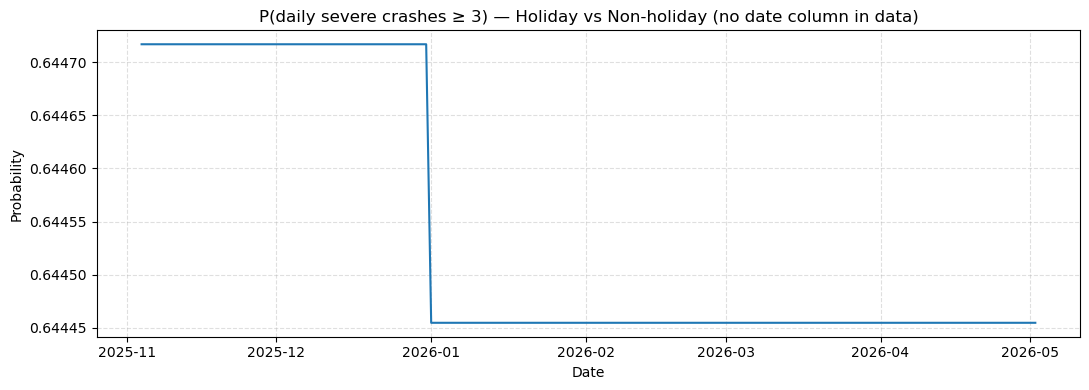

In [183]:
# =================== HOLIDAY RISK FORECAST WITHOUT A DATE COLUMN ===================
# Learns daily severe-crash rates for holiday vs non-holiday using per-year exposures,
# then forecasts P(Y >= N) for each day in the next horizon using NZ public-holiday calendar.
# -----------------------------------------------------------------------------------

import sys, importlib, subprocess, warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure libs
def _ensure(pkg: str):
    if importlib.util.find_spec(pkg) is None:
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", pkg])
        except Exception as e:
            warnings.warn(f"Could not install {pkg}: {e}")

for _pkg in ("statsmodels", "scipy", "holidays", "matplotlib"):
    _ensure(_pkg)

import statsmodels.api as sm
from scipy.stats import poisson, nbinom
import holidays as _holidays

# ------------------------------- CONFIG --------------------------------
# If your DF isn't auto-detected, set this to the variable name as a string:
df_name = None  # e.g., "df" or "crashes"

threshold_N   = 3        # compute P(Y >= N) per day
horizon_days  = 180      # forecast horizon (days)
use_trend     = True     # include linear trend by year
alpha_mom_tol = 1e-8     # MoM threshold for switching to Negative Binomial tails
# -----------------------------------------------------------------------

# --------- Pick the crash DataFrame from globals (or df_name) ----------
_candidate_dfs = ["crashes", "df", "data", "crash_df", "crashes_df", "nz_crashes", "NZ_crashes"]
if df_name and df_name in globals() and isinstance(globals()[df_name], pd.DataFrame):
    crash_df = globals()[df_name]
else:
    crash_df = None
    for _n in _candidate_dfs:
        if _n in globals() and isinstance(globals()[_n], pd.DataFrame):
            crash_df = globals()[_n]
            print(f"[info] Using DataFrame `{_n}`")
            break
if crash_df is None:
    raise RuntimeError("Could not find a crash DataFrame. Set df_name to your variable, "
                       "or name it one of: " + ", ".join(_candidate_dfs))

# ------------------ Helpers: severity & holiday parsing -----------------
def _is_severe_row(df: pd.DataFrame) -> pd.Series:
    """Severe if fatalCount>0 or seriousInjuryCount>0 or crashSeverity contains 'serious'/'fatal'."""
    sev = pd.Series(False, index=df.index)
    for col in ["fatalCount", "seriousInjuryCount"]:
        if col in df.columns:
            sev = sev | (pd.to_numeric(df[col], errors="coerce").fillna(0) > 0)
    if "crashSeverity" in df.columns:
        sev = sev | df["crashSeverity"].astype(str).str.lower().str.contains("serious|fatal", regex=True, na=False)
    return sev

def _parse_holiday_flag(df: pd.DataFrame) -> pd.Series:
    """Use provided 'holiday' column if present; otherwise all zeros."""
    if "holiday" not in df.columns:
        return pd.Series(False, index=df.index)
    h = df["holiday"]
    # Normalize a bunch of common encodings: On/Off, Yes/No, 1/0, True/False, Null
    s = h.astype(str).str.strip().str.lower()
    is_one = s.isin(["on", "yes", "true", "y", "t", "1"])
    as_num = pd.to_numeric(h, errors="coerce")
    is_num_one = as_num.fillna(0).astype(float) == 1.0
    return (is_one | is_num_one).fillna(False)

def _get_year_series(df: pd.DataFrame) -> pd.Series:
    """Pick a usable crash year column (e.g., 'crashYear')."""
    for c in ["crashYear", "Crash_Year", "CRASH_YEAR", "Year", "year"]:
        if c in df.columns:
            y = pd.to_numeric(df[c], errors="coerce")
            if y.notna().any():
                return y.astype("Int64")
    raise ValueError("No usable year column found. Add/rename to one of: crashYear, Crash_Year, CRASH_YEAR, Year, year.")

def _is_leap(y: int) -> bool:
    return (y % 4 == 0 and y % 100 != 0) or (y % 400 == 0)

def _nz_holiday_count(y: int) -> int:
    """Count unique NZ public-holiday dates for year y (includes observed dates)."""
    try:
        cal = _holidays.country_holidays("NZ", years=[y])
    except Exception:
        cal = _holidays.NZ(years=[y])
    # Use *unique* dates (observed days included)
    return len(set(d for d, _ in cal.items()))

def _estimate_alpha_nb2(y_obs: np.ndarray, mu_hat: np.ndarray) -> float:
    """Method-of-moments alpha for NB2 across aggregated cells: Var ≈ mu + alpha*mu^2."""
    if len(y_obs) < 5:
        return 0.0
    m = float(np.mean(y_obs))
    v = float(np.var(y_obs, ddof=1))
    if m <= 0:
        return 0.0
    return max((v - m) / (m * m), 0.0)

def _p_ge_n(mu: np.ndarray, N: int, alpha: float) -> np.ndarray:
    """Tail probability for count on a single day: Poisson (alpha≈0) else NB2."""
    if alpha <= alpha_mom_tol:
        return 1.0 - poisson.cdf(N - 1, mu)
    r = 1.0 / alpha
    p = r / (r + mu)
    return 1.0 - nbinom.cdf(N - 1, r, p)

# -------------------- Build aggregated training table -------------------
df = crash_df.copy()

# Severe flag
df["__severe"] = _is_severe_row(df)

# Holiday flag from data
df["__holiday_flag"] = _parse_holiday_flag(df)

# Year
df["__year"] = _get_year_series(df)
df = df.dropna(subset=["__year"])
df["__year"] = df["__year"].astype(int)

# Aggregate: per year x day_type (holiday vs non-holiday)
agg = (
    df.groupby(["__year", "__holiday_flag"])["__severe"]
      .sum()
      .rename("severe_count")
      .reset_index()
)

# Add exposures (number of holiday vs non-holiday days in each year)
exp_rows = []
for y in sorted(agg["__year"].unique()):
    hol_days = _nz_holiday_count(y)
    total_days = 366 if _is_leap(y) else 365
    nonhol_days = max(total_days - hol_days, 1)
    exp_rows.append({"__year": y, "__holiday_flag": True,  "days": hol_days})
    exp_rows.append({"__year": y, "__holiday_flag": False, "days": nonhol_days})
exp_df = pd.DataFrame(exp_rows)

train = agg.merge(exp_df, on=["__year", "__holiday_flag"], how="right").fillna({"severe_count": 0})
# Guard against any weird zero-day exposure (shouldn't happen)
train.loc[train["days"] <= 0, "days"] = 1

# --------------------- Fit Poisson with offset(log days) ----------------
X = pd.DataFrame({
    "const": 1.0,
    "is_holiday": train["__holiday_flag"].astype(int).values,
})
if use_trend:
    # Center trend to improve numerics
    y0 = train["__year"].min()
    X["trend_c"] = (train["__year"] - y0).astype(float).values

y_vec = train["severe_count"].astype(int).values
offset = np.log(train["days"].astype(float).values)

fam = sm.families.Poisson()
model = sm.GLM(y_vec, X, family=fam, offset=offset)
res = model.fit()

# Daily mean rate for each cell = exp(eta) * (days / days) => exp(eta) where offset is removed
# In-sample fitted counts per cell: mu_cell = exp(eta + log(days)) = exp(eta)*days
mu_cell = res.predict(X, offset=offset)
# Convert to *daily* mean for that cell:
mu_daily = mu_cell / train["days"].values

alpha = _estimate_alpha_nb2(y_vec, mu_cell)
tail_model = "Negative Binomial" if alpha > alpha_mom_tol else "Poisson"

print("[fit] Poisson GLM with offset(log days))")
print(res.summary())
print(f"\n[dispersion] alpha≈{alpha:.4f} → tail model: {tail_model}")

# ------------------------ Forecast next horizon_days --------------------
# Build daily calendar from tomorrow for 'horizon_days'
start_date = pd.Timestamp.today().normalize() + pd.Timedelta(days=1)
future_idx = pd.date_range(start_date, periods=horizon_days, freq="D")

# Mark NZ public holiday per date
hol_flags = []
years_needed = sorted(set(future_idx.year))
try:
    cal = _holidays.country_holidays("NZ", years=years_needed)
except Exception:
    cal = _holidays.NZ(years=years_needed)
hol_set = set(d for d, _ in cal.items())
for d in future_idx:
    hol_flags.append(d.normalize() in hol_set)

future = pd.DataFrame({
    "date": future_idx,
    "__year": future_idx.year,
    "is_holiday": np.array(hol_flags, dtype=bool)
})

# Design matrix for *one day* exposure (offset=0)
Xf = pd.DataFrame({
    "const": 1.0,
    "is_holiday": future["is_holiday"].astype(int).values
})
if use_trend:
    y0 = train["__year"].min()
    Xf["trend_c"] = (future["__year"] - y0).astype(float).values

# Predicted *daily* mean: set offset to 0 (exposure = 1 day)
mu_day_fore = res.predict(Xf, offset=0)
p_ge_N_fore = 1.0 - poisson.cdf(threshold_N - 1, mu_day_fore) if tail_model == "Poisson" \
              else _p_ge_n(mu_day_fore, threshold_N, alpha)

forecast_df = pd.DataFrame({
    "date": future["date"],
    "is_holiday": future["is_holiday"],
    "mu_hat": mu_day_fore,
    "p_ge_N": p_ge_N_fore
})

# -------------------------- Display key outputs ------------------------
print(f"\n[info] Forecast horizon: {horizon_days} days starting {start_date.date()} | Threshold N={threshold_N}")
print("[note] Weekend effects are not modeled because the dataset has no daily date column.\n"
      "       If you add a true date field, we can upgrade to weekend+holiday modeling.")

# Top upcoming holiday risk days
top_hol = forecast_df.query("is_holiday").sort_values("p_ge_N", ascending=False).head(12)
if len(top_hol) == 0:
    print("[warn] No public holidays in the forecast window.")
else:
    print("\n[top] Highest-risk PUBLIC HOLIDAYS in horizon (by P(Y ≥ N)):")
    display(top_hol)

# Quick glance at first 20 days
display(forecast_df.head(20))

# Plot probability over horizon
plt.figure(figsize=(11,4))
plt.plot(forecast_df["date"], forecast_df["p_ge_N"])
plt.title(f"P(daily severe crashes ≥ {threshold_N}) — Holiday vs Non-holiday (no date column in data)")
plt.xlabel("Date"); plt.ylabel("Probability"); plt.grid(True, ls="--", alpha=0.4)
plt.tight_layout(); plt.show()
# ================================================================================


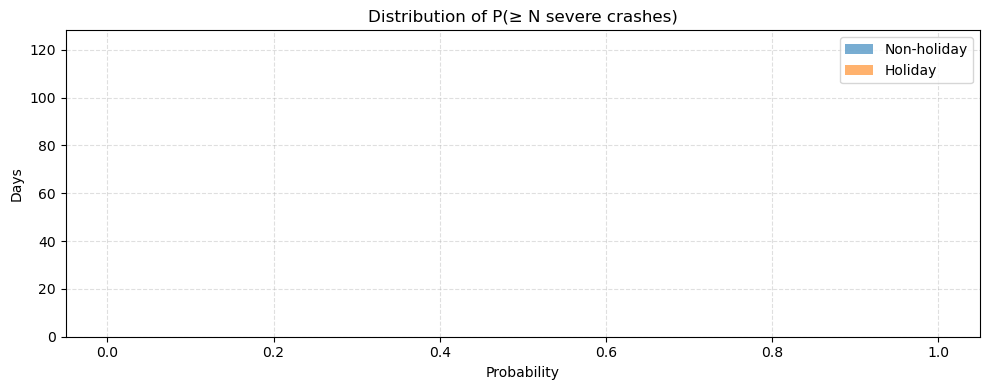

In [184]:
hol = forecast_df.query("is_holiday")
non = forecast_df.query("~is_holiday")

plt.figure(figsize=(10,4))
plt.hist(non["p_ge_N"].values, bins=20, alpha=0.6, label="Non-holiday")
plt.hist(hol["p_ge_N"].values,  bins=20, alpha=0.6, label="Holiday")
plt.title("Distribution of P(≥ N severe crashes)")
plt.xlabel("Probability"); plt.ylabel("Days"); plt.legend()
plt.grid(True, ls="--", alpha=0.4); plt.tight_layout(); plt.show()


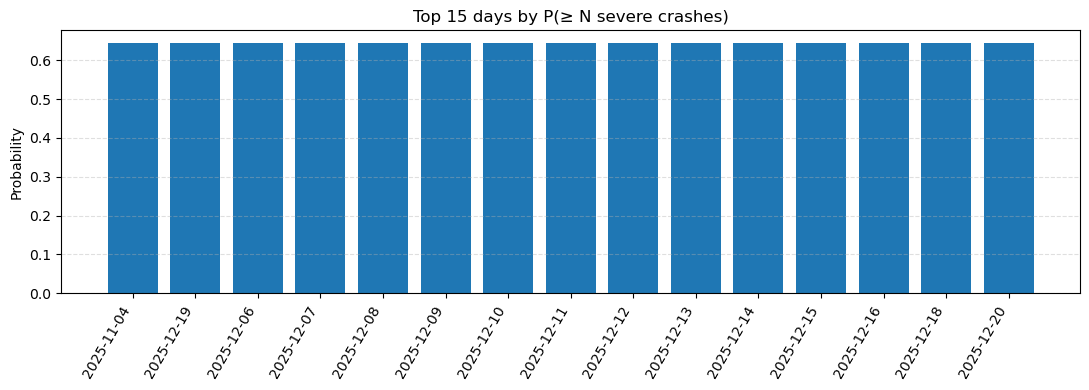

In [185]:
topk = forecast_df.sort_values("p_ge_N", ascending=False).head(15)
plt.figure(figsize=(11,4))
plt.bar(topk["date"].astype(str), topk["p_ge_N"])
plt.title("Top 15 days by P(≥ N severe crashes)")
plt.ylabel("Probability"); plt.xticks(rotation=60, ha="right")
plt.grid(True, axis="y", ls="--", alpha=0.4); plt.tight_layout(); plt.show()


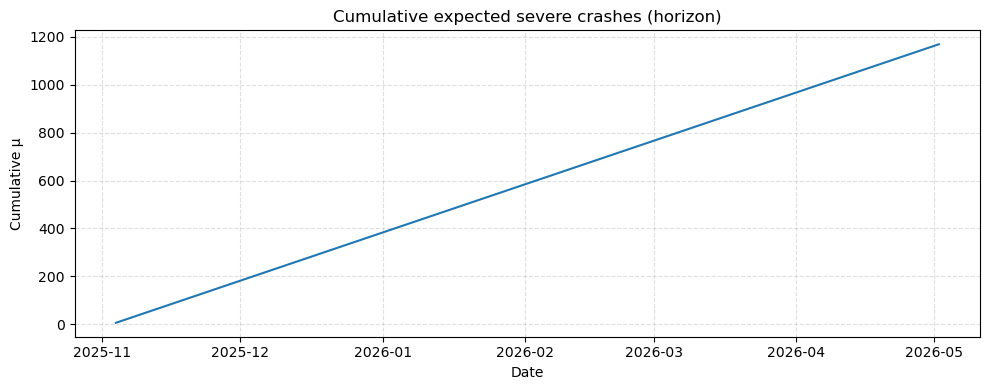

Total expected severe crashes in horizon: 1168.38
…on public holidays only: 0.0


In [186]:
cum = forecast_df.assign(cum_mu=forecast_df["mu_hat"].cumsum())
plt.figure(figsize=(10,4))
plt.plot(cum["date"], cum["cum_mu"])
plt.title("Cumulative expected severe crashes (horizon)")
plt.xlabel("Date"); plt.ylabel("Cumulative μ")
plt.grid(True, ls="--", alpha=0.4); plt.tight_layout(); plt.show()

print("Total expected severe crashes in horizon:", round(cum["mu_hat"].sum(), 2))
print("…on public holidays only:", round(forecast_df.loc[forecast_df["is_holiday"], "mu_hat"].sum(), 2))


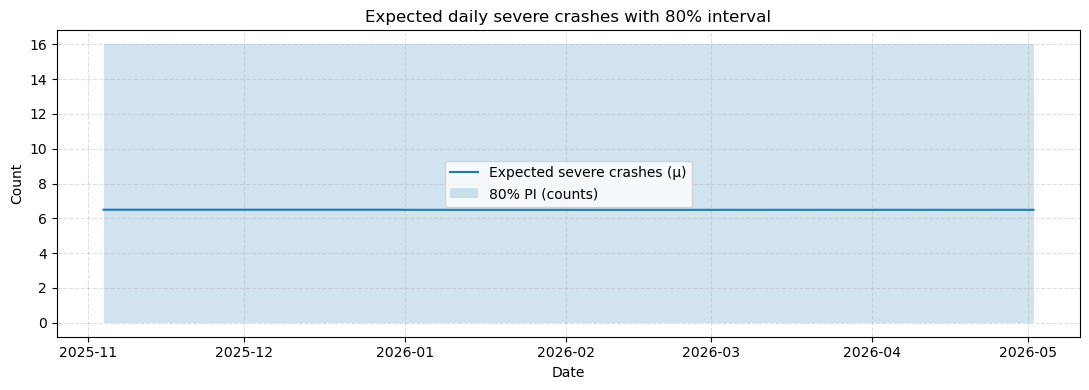

In [187]:
from scipy.stats import poisson, nbinom
import numpy as np
import matplotlib.pyplot as plt

# Uses variables from your previous cell: forecast_df, tail_model, alpha
mu = forecast_df["mu_hat"].values

if tail_model == "Poisson":
    q_lo = poisson.ppf(0.10, mu)
    q_hi = poisson.ppf(0.90, mu)
else:
    r = 1.0 / max(alpha, 1e-12)
    p = r / (r + mu)
    q_lo = nbinom.ppf(0.10, r, p)
    q_hi = nbinom.ppf(0.90, r, p)

plt.figure(figsize=(11,4))
plt.plot(forecast_df["date"], mu, label="Expected severe crashes (μ)")
plt.fill_between(forecast_df["date"], q_lo, q_hi, alpha=0.2, label="80% PI (counts)")
# Shade holidays
hol = forecast_df["is_holiday"].values
for i in np.where(hol)[0]:
    plt.axvspan(forecast_df["date"].iloc[i], forecast_df["date"].iloc[i], ymin=0, ymax=1, alpha=0.15)
plt.title("Expected daily severe crashes with 80% interval")
plt.xlabel("Date"); plt.ylabel("Count")
plt.grid(True, ls="--", alpha=0.4); plt.legend(); plt.tight_layout(); plt.show()


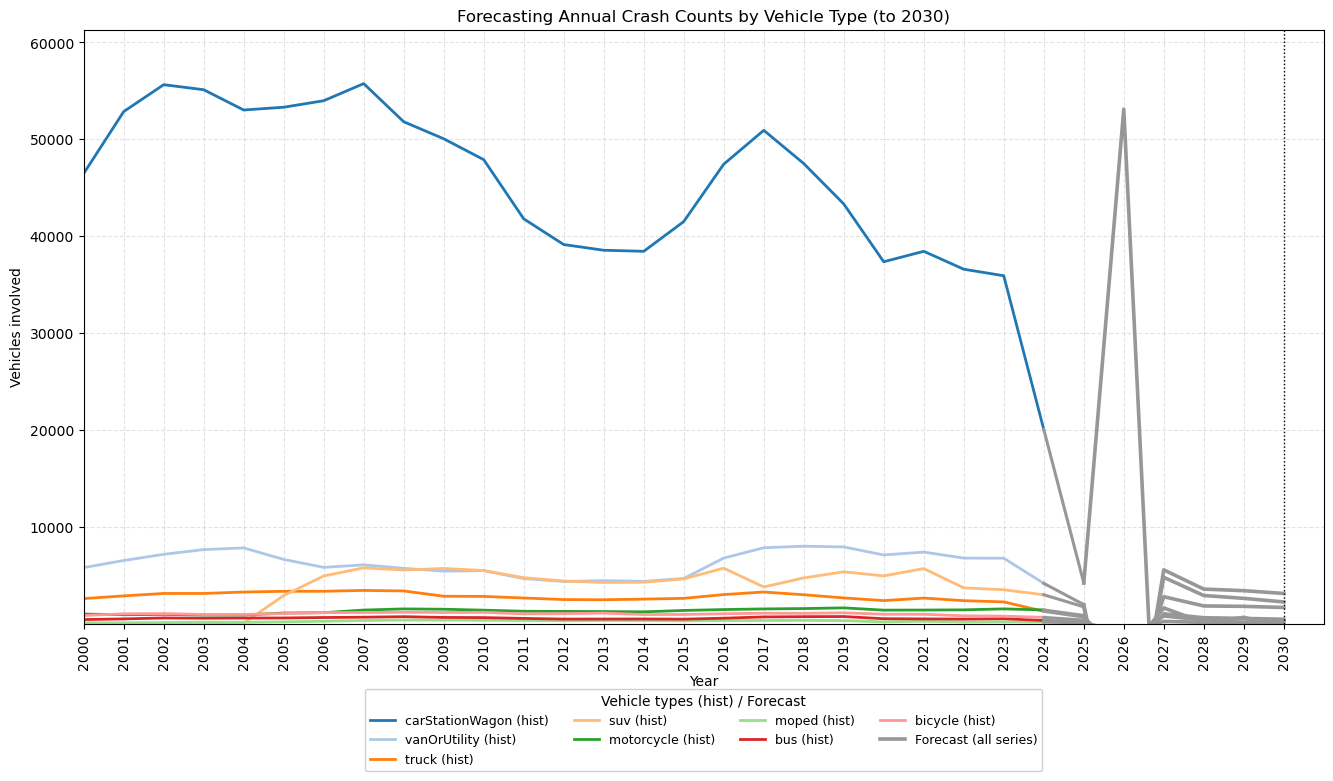

,carStationWagon,vanOrUtility,truck,suv,motorcycle,moped,bus,bicycle
2025-01-01,4193,1963,676,1732,844,84,241,363
2026-01-01,53096,-17684,-3505,-19509,-9540,-867,-1996,-3794
2027-01-01,-31352,4777,1617,5548,2776,227,793,1013
2028-01-01,-34905,2902,117,3563,1824,132,358,607
2029-01-01,-45784,2607,648,3398,1780,114,497,537
2030-01-01,-54474,2235,-393,3111,1668,92,305,452


In [188]:
# ================================
# 7.3 — Forecasting Annual Crash Counts by Vehicle Type
# ================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter
from matplotlib.lines import Line2D
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools

# ---------- CONFIG ----------
TARGET_YEAR          = 2030
FORCE_START_YEAR     = 2024          # start drawing forecasts from max(last_year+1, this)
FORECAST_COLOR       = "#979797"     # one color for all forecast lines
RECONCILE_TO_TOTAL   = True          # make per-vehicle forecasts sum to total forecast
YMIN_FLOOR, YMAX_CAP = 1, 75_000     # nice axis bounds for readability

# Vehicle columns present in your df (0/1 flags or counts per crash)
CANDIDATE_VEH_COLS = [
    "carStationWagon", "vanOrUtility", "truck", "suv",
    "motorcycle", "moped", "bus", "bicycle"
]
VEHICLE_COLS = [c for c in CANDIDATE_VEH_COLS if c in df.columns]
assert VEHICLE_COLS, "No vehicle columns from CANDIDATE_VEH_COLS found in df."

# If your dataset has 'crashYear' (as in CAS), we’ll use it. Otherwise, try to infer.
def _ensure_year_index(_df: pd.DataFrame) -> pd.Series:
    if "crashYear" in _df.columns:
        yrs = pd.to_numeric(_df["crashYear"], errors="coerce")
        return pd.to_datetime({"year": yrs, "month": 1, "day": 1}, errors="coerce")
    if "crashFinancialYear" in _df.columns:
        x = _df["crashFinancialYear"].astype(str).str.extract(r"(\d{4})\s*/\s*(\d{4})")
        yrs = pd.to_numeric(x[0], errors="coerce")  # start year
        return pd.to_datetime({"year": yrs, "month": 1, "day": 1}, errors="coerce")
    # last fallback: any datetime-like column -> take its year
    for c in _df.columns:
        if np.issubdtype(_df[c].dtype, np.datetime64):
            dt = pd.to_datetime(_df[c], errors="coerce")
            return pd.to_datetime({"year": dt.dt.year, "month": 1, "day": 1}, errors="coerce")
    raise KeyError("Could not infer year. Provide 'crashYear' or 'crashFinancialYear'.")

def yearly_total_counts(_df: pd.DataFrame) -> pd.Series:
    y = _ensure_year_index(_df)
    s = (_df.assign(__y=y).dropna(subset=["__y"])
         .groupby("__y").size().rename("total").sort_index())
    full_idx = pd.date_range(s.index.min(), s.index.max(), freq="YS")
    s = s.reindex(full_idx, fill_value=0)
    s.index.name = "date"
    return s

def yearly_vehicle_counts(_df: pd.DataFrame, veh_cols: list[str]) -> pd.DataFrame:
    y = _ensure_year_index(_df)
    g = (_df.assign(__y=y)[["__y"] + veh_cols]
           .dropna(subset=["__y"])
           .groupby("__y")[veh_cols].sum().sort_index())
    full_idx = pd.date_range(g.index.min(), g.index.max(), freq="YS")
    g = g.reindex(full_idx, fill_value=0.0)
    g.index.name = "date"
    return g.astype(float)

# Small ARIMA grid (no seasonality for yearly cadence)
def grid_search_arima(y, p=(0,1,2,3), d=(0,1,2), q=(0,1,2,3)):
    best_res, best_cfg, best_aic = None, None, np.inf
    for (pi, di, qi) in itertools.product(p, d, q):
        try:
            res = SARIMAX(y, order=(pi, di, qi), seasonal_order=(0,0,0,0),
                          enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)
            if np.isfinite(res.aic) and res.aic < best_aic:
                best_res, best_cfg, best_aic = res, (pi, di, qi), res.aic
        except Exception:
            pass
    if best_res is None:
        best_res = SARIMAX(y, order=(0,1,0), seasonal_order=(0,0,0,0), trend="t").fit(disp=False)
        best_cfg = (0,1,0)
    return best_res, best_cfg, best_aic

def proportional_reconcile(child_fc_df: pd.DataFrame, total_fc: pd.Series) -> pd.DataFrame:
    sums = child_fc_df.sum(axis=1).replace(0, np.nan)
    scale = (total_fc / sums).fillna(0.0)
    return (child_fc_df.T * scale).T

# 1) Build yearly series
y_tot = yearly_total_counts(df)                    # Series (total crashes per year)
y_veh = yearly_vehicle_counts(df, VEHICLE_COLS)   # DataFrame (vehicle counts per year)
y_veh = y_veh.reindex(y_tot.index, fill_value=0.0)

# 2) Determine forecast display start & future index to TARGET_YEAR
disp_start_year = max(FORCE_START_YEAR, y_tot.index.max().year + 1)
train_end_year  = disp_start_year - 1
train_end_ts    = pd.Timestamp(f"{train_end_year}-01-01")
future_idx = pd.date_range(pd.Timestamp(f"{train_end_year+1}-01-01"),
                           pd.Timestamp(f"{TARGET_YEAR}-01-01"), freq="YS")

# 3) Forecast TOTAL (for optional reconciliation)
res_tot, _, _ = grid_search_arima(y_tot.loc[:train_end_ts])
tot_fc = res_tot.get_forecast(steps=len(future_idx)).predicted_mean
tot_fc.index = future_idx

# 4) Forecast each vehicle series
veh_fc = {}
for c in y_veh.columns:
    ytr = y_veh[c].loc[:train_end_ts].astype(float)
    # robust fallback for tiny/flat series
    if len(ytr.dropna()) < 3 or ytr.sum() == 0:
        last = float(ytr.dropna().iloc[-1]) if len(ytr.dropna()) else 0.0
        veh_fc[c] = pd.Series(last, index=future_idx)
        continue
    res, _, _ = grid_search_arima(ytr)
    m = res.get_forecast(steps=len(future_idx)).predicted_mean
    m.index = future_idx
    veh_fc[c] = m

veh_fc_df = pd.DataFrame(veh_fc).sort_index()

# 5) Optional: reconcile per-vehicle forecasts to the total forecast
if RECONCILE_TO_TOTAL and len(future_idx):
    veh_fc_df = proportional_reconcile(veh_fc_df, tot_fc)

# 6) Plot – all vehicle types in one chart
def plot_all_vehicles_single_fc(y_hist: pd.DataFrame,
                                y_fc: pd.DataFrame,
                                title="Forecasting Annual Crash Counts by Vehicle Type (to 2030)",
                                fc_color=FORECAST_COLOR):
    cols = list(y_hist.columns)
    n = len(cols)
    cmap = plt.cm.get_cmap("tab20", max(n, 20))
    hist_colors = {c: cmap(i % 20) for i, c in enumerate(cols)}

    fig, ax = plt.subplots(figsize=(16,9))

    # Historical up to train_end_year
    for c in cols:
        h = y_hist[c].loc[:train_end_ts]
        if len(h):
            ax.plot(h.index, h.values, color=hist_colors[c], linewidth=2, label=f"{c} (hist)")

    # Forecast + bridge
    for c in cols:
        fc = y_fc[c] if c in y_fc.columns else pd.Series(dtype=float)
        if len(fc):
            ax.plot(fc.index, fc.values, color=fc_color, linewidth=2.6)
            # bridge last hist point -> first forecast point
            h = y_hist[c].loc[:train_end_ts]
            if len(h):
                ax.plot([h.index.max(), fc.index[0]], [h.iloc[-1], fc.iloc[0]],
                        color=fc_color, linewidth=2.2)

    # 2030 marker
    ax.axvline(pd.Timestamp(f"{TARGET_YEAR}-01-01"), color="black", linestyle=":", linewidth=1)

    # Axis cosmetics
    ax.set_title(title)
    ax.set_xlabel("Year"); ax.set_ylabel("Vehicles involved")
    ax.xaxis.set_major_locator(YearLocator(base=1))
    ax.xaxis.set_major_formatter(DateFormatter("%Y"))
    ax.grid(True, linestyle="--", alpha=0.35)
    ax.set_xlim([y_hist.index.min(), pd.Timestamp(f"{TARGET_YEAR}-12-31")])

    # Y range: non-zero bottom, capped top
    ymax = max(y_hist.to_numpy().max(initial=0), y_fc.to_numpy().max(initial=0))
    ax.set_ylim([YMIN_FLOOR, min(max(YMIN_FLOOR*5, ymax*1.1), YMAX_CAP)])

    # Legend outside below + rotate years
    handles, labels = ax.get_legend_handles_labels()
    fc_handle = Line2D([0],[0], color=fc_color, lw=2.6, label="Forecast (all series)")
    leg = ax.legend(handles + [fc_handle],
                    labels + ["Forecast (all series)"],
                    loc="upper center",
                    bbox_to_anchor=(0.5, -0.10), bbox_transform=ax.transAxes,
                    ncol=4, frameon=True, framealpha=0.92,
                    title="Vehicle types (hist) / Forecast", fontsize=9)
    for tick in ax.get_xticklabels():
        tick.set_rotation(90); tick.set_ha("center"); tick.set_va("top")
    plt.subplots_adjust(bottom=0.22)
    plt.show()

plot_all_vehicles_single_fc(y_veh, veh_fc_df)

# Optional: peek at 2025–2030 table
display(veh_fc_df.loc[veh_fc_df.index.year >= 2025].round(0).astype(int))


Vehicle-type forecast evaluation (hold-out):


,MAE,RMSE,MAPE%,sMAPE%,R2
Series,,,,,
bicycle,171.531,214.171,19.699,23.047,-2.573
bus,241.567,249.980,53.405,73.646,-11.749
carStationWagon,17757.636,18505.008,53.177,72.946,-5.289
moped,169.616,170.720,93.696,165.890,-23.896
motorcycle,563.949,567.013,39.145,48.753,-139.047
suv,964.354,1375.988,20.796,24.227,-0.795
truck,806.004,911.878,34.207,42.950,-2.144
vanOrUtility,2146.831,2433.782,31.291,38.766,-2.841
All vehicles (sum),22375.973,23724.203,44.767,58.592,-4.586


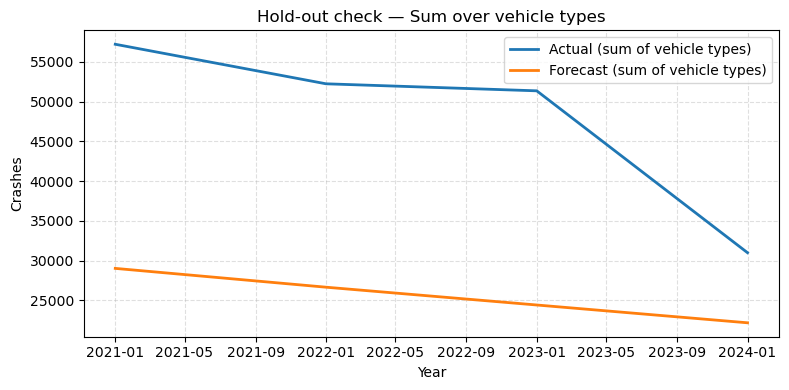

In [189]:
# ================================
# 7.3 — Evaluation metrics (hold-out test) for vehicle-type forecasts
# ================================
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ---- choose a test window (years at the end of the series) ----
EVAL_H = min(HORIZON_H, 4)                  # evaluate on last ≤4 years (tweak as you like)
if len(y_veh.index) - EVAL_H < 3:           # safety for short series
    EVAL_H = max(1, len(y_veh.index) - 3)

veh_train = y_veh.iloc[:-EVAL_H].astype(float)
veh_test  = y_veh.iloc[-EVAL_H:].astype(float)
tot_train = y_tot.iloc[:-EVAL_H].astype(float)
tot_test  = y_tot.iloc[-EVAL_H:].astype(float)

# ---- fit/forecast total over the test window (for reconciliation) ----
res_tot_eval, _, _ = grid_search_arima(tot_train)
tot_fc_eval = res_tot_eval.get_forecast(steps=len(veh_test)).predicted_mean
tot_fc_eval.index = veh_test.index

# ---- fit/forecast each vehicle over the test window ----
veh_fc_eval = {}
for c in veh_train.columns:
    ytr = veh_train[c]
    try:
        res, _, _ = grid_search_arima(ytr)
        m = res.get_forecast(steps=len(veh_test)).predicted_mean
        m.index = veh_test.index
    except Exception:
        # robust fallback: random-walk with drift OR flat hold
        if len(ytr.dropna()) >= 2:
            res = SARIMAX(ytr, order=(0,1,0), seasonal_order=(0,0,0,0), trend="t").fit(disp=False)
            m = res.get_forecast(steps=len(veh_test)).predicted_mean
            m.index = veh_test.index
        else:
            last = float(ytr.dropna().iloc[-1]) if len(ytr.dropna()) else 0.0
            m = pd.Series(last, index=veh_test.index)
    veh_fc_eval[c] = m

veh_fc_eval = pd.DataFrame(veh_fc_eval).reindex(veh_test.index)

# ---- (optional) reconcile per-vehicle forecasts to total forecast ----
if RECONCILE_TO_TOTAL:
    veh_fc_eval = proportional_reconcile(veh_fc_eval, tot_fc_eval)

# ---- metrics helpers ----
def _metrics(y_true: pd.Series, y_pred: pd.Series) -> dict:
    y_true = y_true.astype(float)
    y_pred = y_pred.astype(float)
    err = y_pred - y_true
    mae = np.mean(np.abs(err))
    rmse = float(np.sqrt(np.mean(np.square(err))))
    # safe MAPE/sMAPE (ignore zero-actual rows for MAPE; add tiny epsilon in sMAPE)
    with np.errstate(divide="ignore", invalid="ignore"):
        mape = np.mean(np.abs(err) / np.where(y_true == 0, np.nan, np.abs(y_true))) * 100.0
    smape = np.mean(2.0 * np.abs(err) / (np.abs(y_true) + np.abs(y_pred) + 1e-12)) * 100.0
    ss_res = float(np.sum(np.square(err)))
    ss_tot = float(np.sum(np.square(y_true - y_true.mean()))) + 1e-12
    r2 = 1.0 - ss_res / ss_tot
    return {"MAE": mae, "RMSE": rmse, "MAPE%": mape, "sMAPE%": smape, "R2": r2}

# ---- per-vehicle metrics table ----
rows = []
for c in veh_test.columns:
    m = _metrics(veh_test[c], veh_fc_eval[c])
    m["Series"] = c
    rows.append(m)

# ---- micro-averaged metrics across vehicles (sum actuals & preds) ----
sum_true = veh_test.sum(axis=1)
sum_pred = veh_fc_eval.sum(axis=1)
micro = _metrics(sum_true, sum_pred)
micro["Series"] = "All vehicles (sum)"

# ---- compare against the *modeled* total series as well ----
tot_series_metrics = _metrics(tot_test, tot_fc_eval)
tot_series_metrics["Series"] = "Total crashes (modeled)"

# ---- final table ----
eval_df = (pd.DataFrame(rows + [micro, tot_series_metrics])
             .set_index("Series")
             .loc[sorted(veh_test.columns) + ["All vehicles (sum)", "Total crashes (modeled)"]])

# nice rounding
eval_df = eval_df[["MAE","RMSE","MAPE%","sMAPE%","R2"]].applymap(lambda x: np.round(x, 3))

print("Vehicle-type forecast evaluation (hold-out):")
display(eval_df)

# (optional) quick visual: actual vs forecast (sum over vehicle types) on test window
plt.figure(figsize=(8,4))
plt.plot(sum_true.index, sum_true.values, label="Actual (sum of vehicle types)", linewidth=2)
plt.plot(sum_pred.index, sum_pred.values, label="Forecast (sum of vehicle types)", linewidth=2)
plt.title("Hold-out check — Sum over vehicle types")
plt.xlabel("Year"); plt.ylabel("Crashes")
plt.legend(); plt.grid(True, linestyle="--", alpha=0.4); plt.tight_layout()
plt.show()
